# **PORTFOLIO OPTIMISATION**

In [1]:
import numpy as np
import pandas as pd
import math
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import investpy as ipy
%matplotlib inline
import datetime as dt
import statsmodels.api as sm
from scipy import stats
from statsmodels import regression
from sklearn.linear_model import LinearRegression
#from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
today = dt.datetime.today().strftime("%d/%m/%Y")
import mlportfolio

In [2]:
#pd.set_option('display.max_rows', 100)
#plt.rcParams['axes.xmargin'] = 0
scaler = MinMaxScaler() 

In [3]:
def log_rate(df):
    return np.log(df / df.shift(1)).dropna(how='all')

In [4]:
plt.style.use(['seaborn'])

In [5]:
pd.set_option("display.max_rows", 20)
#pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Lists of Stocks 

Here, the most up-to-date list of Kompas 100 stocks is collected from Kontan. Kompas 100 was chosen as the stocks universe as it provides a larger dataset than LQ45 or IDX30 yet manageable enough for the computational  resource available for the research in comparison to the 600+ of stocks listed on IDX.

In [6]:
lis = mlportfolio.index_list_kontan('KOMPAS100')
df = lis.download()
df

No.  Kode                    Nama Saham Keterangan
0     1  AALI       Astra Agro Lestari Tbk.      Tetap
1     2  ACES   Ace Hardware Indonesia Tbk.      Tetap
2     3  ADHI     Adhi Karya (Persero) Tbk.       Baru
3     4  ADRO             Adaro Energy Tbk.      Tetap
4     5  AGII       Aneka Gas Industri Tbk.       Baru
..  ...   ...                           ...        ...
95   96  WIIM     Wismilak Inti Makmur Tbk.      Tetap
96   97  WIKA   Wijaya Karya (Persero) Tbk.      Tetap
97   98  WOOD      Integra Indocabinet Tbk.      Tetap
98   99  WSKT  Waskita Karya (Persero) Tbk.      Tetap
99  100  WTON       Wijaya Karya Beton Tbk.      Tetap

[100 rows x 4 columns]

In [7]:
code = df['Kode']
code_arr =[]
sym = []
for i in range(len(code)):
  sym.append(code[i])
  code_arr.append(code[i]+'.JK')

## **Data Reader**

After the list of stocks has been collected, using `yfinance` module to download the historical time series data from Yahoo Finance. The data collected for these stocks span from 1 Jan 2010 to today.

### **KOMPAS100 Stocks Prices: 2010-2021**

In [8]:
training_year ='2019'

In [9]:
# df1 = yf.download(code_arr, start='2010-01-01')
# df1.info()

In [10]:
# df1.to_pickle('stocks-data.pkl')

In [11]:
df = pd.read_pickle('stocks-data.pkl')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2932 entries, 2010-01-04 to 2021-11-19
Columns: 600 entries, ('Adj Close', 'AALI.JK') to ('Volume', 'WTON.JK')
dtypes: float64(600)
memory usage: 13.4 MB


In [13]:
data_count = df['Adj Close'].describe().loc['count']

In [14]:
thresh=data_count.median()

<AxesSubplot:>

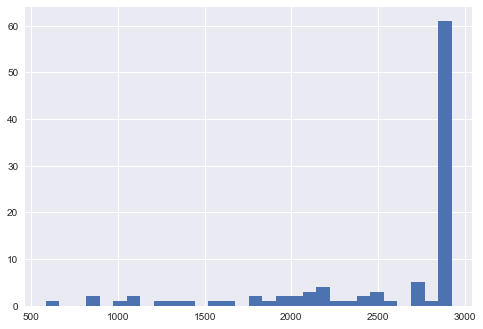

In [15]:
data_count.hist(bins=30)

In [16]:
df1 = df.dropna(axis=1, thresh=thresh)

<AxesSubplot:xlabel='Date', ylabel='Adj Close Price'>

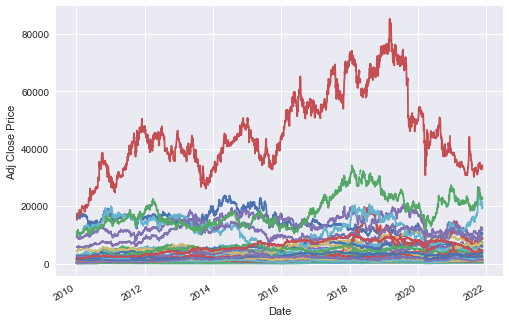

In [17]:
df1['Adj Close'].plot(legend=False, xlabel='Date', ylabel='Adj Close Price' )

In [18]:
adj_close = df1['Adj Close']

In [19]:
columns=df1.columns.get_level_values(0).unique()

In [20]:
df1.groupby(level=0, axis=1).mean().describe().round(2)

Adj Close    Close     High      Low     Open        Volume
count    2929.00  2929.00  2929.00  2929.00  2929.00  2.929000e+03
mean     4060.19  4932.68  5004.33  4862.67  4936.06  3.065587e+07
std       761.14   686.10   688.02   683.38   686.28  1.567265e+07
min      1312.52  1335.00  1335.00  1335.00  1335.00  0.000000e+00
25%      3552.70  4512.68  4594.72  4442.67  4511.40  2.192930e+07
50%      4013.60  4980.50  5057.06  4916.69  4986.38  2.729380e+07
75%      4517.61  5360.98  5423.01  5291.40  5360.41  3.491052e+07
max      6124.31  6838.59  6838.59  6838.59  6838.59  1.878984e+08

In [21]:
df1.groupby(level=0, axis=1).mean().round(2)

Adj Close    Close     High      Low     Open       Volume
Date                                                                  
2010-01-04    2228.07  3394.89  3427.35  3313.44  3359.85  17055766.65
2010-01-05    2257.59  3448.27  3473.45  3385.44  3446.54  29412161.88
2010-01-06    2254.17  3441.43  3507.69  3405.32  3438.84  31741730.48
2010-01-07    2257.51  3441.88  3499.48  3386.57  3439.67  33546109.37
2010-01-08    2293.67  3492.09  3518.48  3427.29  3492.33  23862044.17
...               ...      ...      ...      ...      ...          ...
2021-11-15    4388.19  4388.67  4494.88  4363.65  4469.29  30464171.15
2021-11-16    4419.17  4419.65  4462.42  4359.29  4395.37  27995071.15
2021-11-17    4425.79  4425.79  4478.25  4375.37  4435.79  26719040.38
2021-11-18    4394.15  4394.15  4456.31  4356.25  4422.60  27248226.92
2021-11-19    4429.71  4429.71  4469.50  4366.35  4402.40  35468665.38

[2932 rows x 6 columns]

In [22]:
adj_close

AALI.JK      ADHI.JK      ADRO.JK      AKRA.JK      ANTM.JK  \
Date                                                                           
2010-01-04  16410.128906   270.381287  1063.347290   754.388062  1601.085571   
2010-01-05  16650.947266   263.786621  1087.652222   742.021057  1601.085571   
2010-01-06  16582.142578   267.083954  1093.728516   735.837524  1601.085571   
2010-01-07  17235.794922   270.381287  1118.033447   723.470642  1635.891724   
2010-01-08  17373.406250   273.678619  1190.948608   717.286926  1635.891724   
...                  ...          ...          ...          ...          ...   
2021-11-15  10450.000000  1090.000000  1610.000000  4330.000000  2390.000000   
2021-11-16  10525.000000  1095.000000  1615.000000  4400.000000  2380.000000   
2021-11-17  10325.000000  1110.000000  1640.000000  4300.000000  2350.000000   
2021-11-18  10450.000000  1115.000000  1625.000000  4210.000000  2330.000000   
2021-11-19  10425.000000  1115.000000  1645.000000  4180.000000  2390.000000   

                ASII.JK     ASRI.JK      BBCA.JK      BBRI.JK      BBTN.JK  \
Date                                                                         
2010-01-04  2518.653076   96.725517   855.341370   588.306946   655.905151   
2010-01-05  2532.923096   98.567924   863.810181   592.078186   655.905151   
2010-01-06  2518.653076   98.567924   838.403748   584.535706   726.180786   
2010-01-07  2440.167969   99.489105   842.638245   576.993347   726.180786   
2010-01-08  2454.438232  102.252686   821.466370   580.764587   749.605957   
...                 ...         ...          ...          ...          ...   
2021-11-15  6125.000000  183.000000  7474.916504  4160.000000  1750.000000   
2021-11-16  6175.000000  184.000000  7450.000000  4130.000000  1750.000000   
2021-11-17  6250.000000  184.000000  7575.000000  4200.000000  1765.000000   
2021-11-18  6200.000000  184.000000  7400.000000  4180.000000  1775.000000   
2021-11-19  6225.000000  184.000000  7425.000000  4280.000000  1795.000000   

            ...      PTBA.JK     PWON.JK     RALS.JK      SMGR.JK     SMRA.JK  \
Date        ...                                                                 
2010-01-04  ...  1855.615723  116.141273  448.737244  5704.010742  259.101532   
2010-01-05  ...  1855.615723  118.374756  482.732483  5779.062988  263.647247   
2010-01-06  ...  1897.315308  111.674294  469.134430  5854.115234  268.192810   
2010-01-07  ...  1902.527466  110.557549  455.536255  5779.062988  268.192810   
2010-01-08  ...  1907.739868  111.674294  448.737244  5741.536621  268.192810   
...         ...          ...         ...         ...          ...         ...   
2021-11-15  ...  2510.000000  545.000000  770.000000  9200.000000  950.000000   
2021-11-16  ...  2510.000000  540.000000  780.000000  9175.000000  970.000000   
2021-11-17  ...  2550.000000  560.000000  780.000000  9050.000000  960.000000   
2021-11-18  ...  2540.000000  550.000000  775.000000  8975.000000  955.000000   
2021-11-19  ...  2620.000000  555.000000  780.000000  8950.000000  975.000000   

                TINS.JK      TLKM.JK       UNTR.JK      UNVR.JK      WIKA.JK  
Date                                                                          
2010-01-04  1120.500122  1403.605957   9867.139648  1673.236694   247.194763  
2010-01-05  1146.864624  1410.954468  10118.533203  1726.235229   247.194763  
2010-01-06  1160.047119  1396.257080  10087.110352  1711.092285   247.194763  
2010-01-07  1146.864624  1359.513428   9961.414062  1680.807983   247.194763  
2010-01-08  1146.864624  1374.210938  10307.078125  1688.378906   243.449371  
...                 ...          ...           ...          ...          ...  
2021-11-15  1595.000000  3600.000000  22275.000000  4510.000000  1275.000000  
2021-11-16  1585.000000  3670.000000  22425.000000  4570.000000  1275.000000  
2021-11-17  1585.000000  3630.000000  22975.000000  4500.000000  1290.000000  
2021-11-18  1595.000000  3630.000000  

In [23]:
pd.DataFrame(adj_close.columns)

0
0   AALI.JK
1   ADHI.JK
2   ADRO.JK
3   AKRA.JK
4   ANTM.JK
..      ...
47  TINS.JK
48  TLKM.JK
49  UNTR.JK
50  UNVR.JK
51  WIKA.JK

[52 rows x 1 columns]

### **KOMPAS 100 Index Prices: 2010-2021**

In [24]:
# df2 = ipy.indices.get_index_historical_data(index='idx kompas 100', country='Indonesia', from_date='01/01/2010', to_date= today)
# df2.info()

In [25]:
# df2.to_pickle('market-data.pkl')

In [26]:
df2 = pd.read_pickle('market-data.pkl')
df2.describe().round(2)

Open     High      Low    Close        Volume
count  2910.00  2910.00  2910.00  2910.00  2.910000e+03
mean   1051.53  1058.09  1043.89  1051.18  3.865800e+09
std     173.08   172.62   172.94   172.45  3.322107e+10
min     591.86   595.92   580.38   592.09  0.000000e+00
25%     921.90   928.20   913.87   920.94  2.256659e+09
50%    1067.84  1074.37  1060.72  1067.14  2.902886e+09
75%    1193.46  1200.44  1187.73  1193.44  3.790015e+09
max    1420.94  1421.95  1406.81  1421.50  1.793415e+12

In [27]:
df2.head(10)

Open    High     Low   Close      Volume Currency
Date                                                           
2010-01-04  612.33  623.58  612.04  623.31  1528898048      IDR
2010-01-05  623.36  631.41  623.36  631.08  5152591360      IDR
2010-01-06  631.14  635.74  626.50  630.07  4109481984      IDR
2010-01-07  630.13  632.35  621.29  625.70  3900115968      IDR
2010-01-08  625.67  632.41  624.81  632.34  6547479040      IDR
2010-01-11  632.68  641.39  632.68  636.44  4524621824      IDR
2010-01-12  636.47  644.06  634.09  643.83  4894687744      IDR
2010-01-13  643.37  643.37  634.10  636.56  3641117440      IDR
2010-01-14  636.76  644.18  636.76  639.53  4644381184      IDR
2010-01-15  639.96  642.74  637.89  639.89  4276787968      IDR

<AxesSubplot:xlabel='Date'>

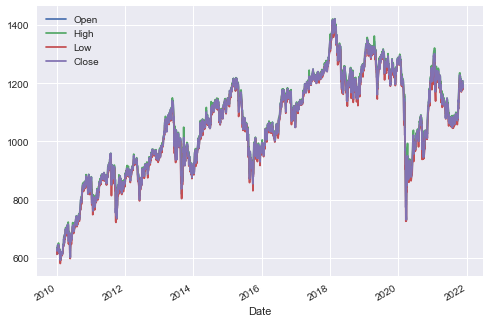

In [28]:
df2.iloc[:, :4].plot()

### **Indonesia Gov't Bond Yield 1 Year: 2010-2021**

Here, the bond yields of Indonesia's 1 Year Bond from 1 Jan 2010 to today are collected from Investing.com. 

In [29]:
# df5 = ipy.bonds.get_bond_historical_data(bond = 'INDONESIA 1Y', from_date='01/01/2010', to_date= today)
# bond_yield = df5[df5.index.isin(df2.index)].divide(100)

In [30]:
# bond_yield.to_pickle('bond-data.pkl')

<AxesSubplot:xlabel='Date', ylabel='Rate'>

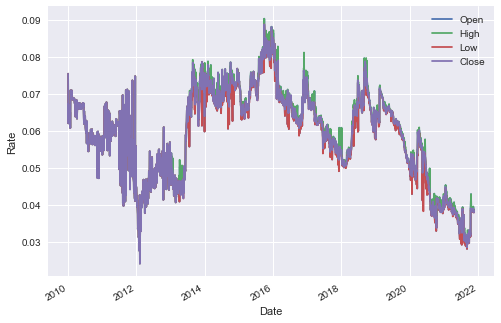

In [31]:
bond_yield = pd.read_pickle('bond-data.pkl').replace(0, method='ffill')
bond_yield.plot(ylabel='Rate')

In [32]:
bond_yield.describe().round(3)

Open      High       Low     Close
count  2893.000  2893.000  2893.000  2893.000
mean      0.059     0.060     0.059     0.059
std       0.013     0.013     0.012     0.012
min       0.024     0.024     0.024     0.024
25%       0.050     0.051     0.050     0.050
50%       0.062     0.062     0.062     0.062
75%       0.068     0.069     0.068     0.068
max       0.090     0.090     0.089     0.089

### **Financial Summaries of KOMPAS100 Companies**

In [33]:
# info_summ = pd.DataFrame()
# fin_dict = {}

# for x in sym: 
#     info = ipy.stocks.get_stock_information(stock= x, country= 'Indonesia')
#     info_summ = info_summ.append(info)
    
#     try:
#         inc_sta = ipy.stocks.get_stock_financial_summary(stock= x, country= 'Indonesia', summary_type='income_statement')
#         fin_dict[x +'.JK']= inc_sta.sort_values(by='Date')
#     except:
#         pass

In [34]:
# fin_summ = pd.concat(fin_dict, axis=1)*1000000 #Values should be in millions IDR

# info_summ.reset_index(drop=True)
# info_summ.index = code_arr

In [35]:
# fin_summ.to_pickle('fin-summ.pkl')
# info_summ.to_pickle('info-summ.pkl')

In [36]:
info_summ = pd.read_pickle('info-summ.pkl')
info_summ.sample(n=5)

Stock Symbol  Prev. Close Todays Range       Revenue    Open  \
PSAB.JK         PSAB        150.0      150-158  3.960000e+12   150.0   
ICBP.JK         ICBP       8525.0  8,450-8,525  5.179000e+13  8525.0   
BNGA.JK         BNGA        995.0    995-1,010  1.210000e+13  1000.0   
KLBF.JK         KLBF       1490.0  1,460-1,495  2.388000e+13  1490.0   
GJTL.JK         GJTL        750.0      745-755  1.477000e+13   755.0   

          52 wk Range     EPS      Volume    Market Cap Dividend (Yield)  \
PSAB.JK       149-308   -4.84   9250800.0  4.100000e+12         N/A(N/A)   
ICBP.JK  7,625-10,625  551.38   1793900.0  9.913000e+13    215.00(2.52%)   
BNGA.JK     700-1,245   96.27   1839800.0  2.493000e+13     44.06(4.41%)   
KLBF.JK   1,240-1,960   60.65  21709100.0  6.890000e+13     34.00(2.28%)   
GJTL.JK     402-1,020  160.57   4292400.0  2.600000e+12     10.00(1.33%)   

         Average Vol. (3m) P/E Ratio  Beta 1-Year Change  Shares Outstanding  \
PSAB.JK          9776751.0         -  1.45       -25.48%        2.646000e+10   
ICBP.JK          5294649.0     15.42  0.21       -14.79%        1.166191e+10   
BNGA.JK          7728146.0     10.39  1.71        36.05%        2.493006e+10   
KLBF.JK         34752475.0     24.24  0.63        -0.68%        4.687295e+10   
GJTL.JK          6075506.0      4.64  1.92        56.51%        3.484409e+09   

        Next Earnings Date  
PSAB.JK         03/11/2021  
ICBP.JK         03/11/2021  
BNGA.JK         04/11/2021  
KLBF.JK         02/11/2021  
GJTL.JK         03/11/2021

In [37]:
fin_summ = pd.read_pickle('fin-summ.pkl')
fin_test=fin_summ[:training_year]

In [38]:
fin_test

AALI.JK                                               \
           Total Revenue  Gross Profit Operating Income    Net Income   
Date                                                                    
2017-12-31  1.730569e+13  4.145250e+12     2.992440e+12  1.968027e+12   
2018-12-31  1.908439e+13  3.539506e+12     2.180324e+12  1.438511e+12   
2019-12-31  1.745274e+13  2.144506e+12     1.028365e+12  2.111170e+11   

                 ACES.JK                                               \
           Total Revenue  Gross Profit Operating Income    Net Income   
Date                                                                    
2017-12-31  5.938576e+12  2.799301e+12     9.706619e+11  7.777271e+11   
2018-12-31  7.239754e+12  3.402864e+12     1.229001e+12  9.645540e+11   
2019-12-31  8.142717e+12  3.842647e+12     1.363919e+12  1.017395e+12   

                 ADHI.JK                ...          WOOD.JK                \
           Total Revenue  Gross Profit  ... Operating Income    Net Income   
Date                                    ...                                  
2017-12-31  1.515618e+13  2.057806e+12  ...     3.459184e+11  1.735267e+11   
2018-12-31  1.565550e+13  2.506603e+12  ...     4.701462e+11  2.392664e+11   
2019-12-31  1.530786e+13  2.336054e+12  ...     4.902693e+11  2.178162e+11   

                 WSKT.JK                                               \
           Total Revenue  Gross Profit Operating Income    Net Income   
Date                                                                    
2017-12-31  4.521290e+13  9.463532e+12     6.526601e+12  3.881712e+12   
2018-12-31  4.878895e+13  8.862619e+12     7.966902e+12  3.962838e+12   
2019-12-31  3.138739e+13  5.604643e+12     5.239472e+12  9.381424e+11   

                 WTON.JK                                               
           Total Revenue  Gross Profit Operating Income    Net Income  
Date                                                                   
2017-12-31  5.362263e+12  6.666394e+11     5.303587e+11  3.371242e+11  
2018-12-31  6.930628e+12  8.824219e+11     7.325459e+11  4.863531e+11  
2019-12-31  7.083384e+12  9.507170e+11     7.856503e+11  5.123467e+11  

[3 rows x 369 columns]

In [39]:
avg_growth = fin_test.pct_change().dropna().mean().rename(index={'Total Revenue': 'Mean Revenue Growth', 'Gross Profit':'Mean Gross Profit Growth',
                                                                'Net Income': 'Mean Net Income Growth', 'Operating Income': 'Mean Operating Income Growth'})

growth_dict={'Mean Rev. Growth': avg_growth[:,'Mean Revenue Growth'], 'Mean Gross Profit Growth': avg_growth[:,'Mean Gross Profit Growth'],
             'Mean Net Inc. Growth': avg_growth[:,'Mean Net Income Growth'], 'Mean Op. Inc. Growth': avg_growth[:,'Mean Operating Income Growth']}

In [40]:
growth_data = pd.concat(growth_dict, axis=1)
growth_data

Mean Rev. Growth  Mean Gross Profit Growth  Mean Net Inc. Growth  \
AALI.JK          0.008642                 -0.270126             -0.561149   
ACES.JK          0.171914                  0.172426              0.147502   
ADHI.JK          0.005370                  0.075027              0.140143   
ADRO.JK          0.033001                 -0.071382             -0.084041   
AGII.JK          0.095309                  0.089202              0.088969   
...                   ...                       ...                   ...   
WIIM.JK         -0.028261                 -0.001226             -0.102966   
WIKA.JK          0.031848                  0.109351              0.380012   
WOOD.JK          0.113999                  0.162222              0.144598   
WSKT.JK         -0.138788                 -0.215553             -0.371183   
WTON.JK          0.157261                  0.200541              0.248049   

         Mean Op. Inc. Growth  
AALI.JK             -0.399866  
ACES.JK              0.187963  
ADHI.JK             -0.072490  
ADRO.JK             -0.185287  
AGII.JK              0.058248  
...                       ...  
WIIM.JK             -0.167387  
WIKA.JK              0.309106  
WOOD.JK              0.200963  
WSKT.JK             -0.060832  
WTON.JK              0.226860  

[99 rows x 4 columns]

In [41]:
index_=adj_close.columns
eps = info_summ['EPS'][index_]
per = pd.to_numeric(info_summ['P/E Ratio'], errors='coerce').fillna(0)[index_]
mcap = pd.to_numeric(info_summ['Market Cap'], errors='coerce')[index_]
beta_real = pd.to_numeric(info_summ['Beta'], errors='coerce')[index_]

## **Daily Returns of Stocks**

In [42]:
close_price_all = adj_close.interpolate(method='time')
close_price_all

AALI.JK      ADHI.JK      ADRO.JK      AKRA.JK      ANTM.JK  \
Date                                                                           
2010-01-04  16410.128906   270.381287  1063.347290   754.388062  1601.085571   
2010-01-05  16650.947266   263.786621  1087.652222   742.021057  1601.085571   
2010-01-06  16582.142578   267.083954  1093.728516   735.837524  1601.085571   
2010-01-07  17235.794922   270.381287  1118.033447   723.470642  1635.891724   
2010-01-08  17373.406250   273.678619  1190.948608   717.286926  1635.891724   
...                  ...          ...          ...          ...          ...   
2021-11-15  10450.000000  1090.000000  1610.000000  4330.000000  2390.000000   
2021-11-16  10525.000000  1095.000000  1615.000000  4400.000000  2380.000000   
2021-11-17  10325.000000  1110.000000  1640.000000  4300.000000  2350.000000   
2021-11-18  10450.000000  1115.000000  1625.000000  4210.000000  2330.000000   
2021-11-19  10425.000000  1115.000000  1645.000000  4180.000000  2390.000000   

                ASII.JK     ASRI.JK      BBCA.JK      BBRI.JK      BBTN.JK  \
Date                                                                         
2010-01-04  2518.653076   96.725517   855.341370   588.306946   655.905151   
2010-01-05  2532.923096   98.567924   863.810181   592.078186   655.905151   
2010-01-06  2518.653076   98.567924   838.403748   584.535706   726.180786   
2010-01-07  2440.167969   99.489105   842.638245   576.993347   726.180786   
2010-01-08  2454.438232  102.252686   821.466370   580.764587   749.605957   
...                 ...         ...          ...          ...          ...   
2021-11-15  6125.000000  183.000000  7474.916504  4160.000000  1750.000000   
2021-11-16  6175.000000  184.000000  7450.000000  4130.000000  1750.000000   
2021-11-17  6250.000000  184.000000  7575.000000  4200.000000  1765.000000   
2021-11-18  6200.000000  184.000000  7400.000000  4180.000000  1775.000000   
2021-11-19  6225.000000  184.000000  7425.000000  4280.000000  1795.000000   

            ...      PTBA.JK     PWON.JK     RALS.JK      SMGR.JK     SMRA.JK  \
Date        ...                                                                 
2010-01-04  ...  1855.615723  116.141273  448.737244  5704.010742  259.101532   
2010-01-05  ...  1855.615723  118.374756  482.732483  5779.062988  263.647247   
2010-01-06  ...  1897.315308  111.674294  469.134430  5854.115234  268.192810   
2010-01-07  ...  1902.527466  110.557549  455.536255  5779.062988  268.192810   
2010-01-08  ...  1907.739868  111.674294  448.737244  5741.536621  268.192810   
...         ...          ...         ...         ...          ...         ...   
2021-11-15  ...  2510.000000  545.000000  770.000000  9200.000000  950.000000   
2021-11-16  ...  2510.000000  540.000000  780.000000  9175.000000  970.000000   
2021-11-17  ...  2550.000000  560.000000  780.000000  9050.000000  960.000000   
2021-11-18  ...  2540.000000  550.000000  775.000000  8975.000000  955.000000   
2021-11-19  ...  2620.000000  555.000000  780.000000  8950.000000  975.000000   

                TINS.JK      TLKM.JK       UNTR.JK      UNVR.JK      WIKA.JK  
Date                                                                          
2010-01-04  1120.500122  1403.605957   9867.139648  1673.236694   247.194763  
2010-01-05  1146.864624  1410.954468  10118.533203  1726.235229   247.194763  
2010-01-06  1160.047119  1396.257080  10087.110352  1711.092285   247.194763  
2010-01-07  1146.864624  1359.513428   9961.414062  1680.807983   247.194763  
2010-01-08  1146.864624  1374.210938  10307.078125  1688.378906   243.449371  
...                 ...          ...           ...          ...          ...  
2021-11-15  1595.000000  3600.000000  22275.000000  4510.000000  1275.000000  
2021-11-16  1585.000000  3670.000000  22425.000000  4570.000000  1275.000000  
2021-11-17  1585.000000  3630.000000  22975.000000  4500.000000  1290.000000  
2021-11-18  1595.000000  3630.000000  

In [43]:
close_price = close_price_all[:training_year]

In [44]:
ret_all = log_rate(close_price) #close_price.apply(lambda x: np.log(1+x)).pct_change().dropna(how='all')
ret_all.head()

AALI.JK   ADHI.JK   ADRO.JK   AKRA.JK   ANTM.JK   ASII.JK  \
Date                                                                     
2010-01-05  0.014568 -0.024693  0.022600 -0.016529  0.000000  0.005650   
2010-01-06 -0.004141  0.012423  0.005571 -0.008368  0.000000 -0.005650   
2010-01-07  0.038662  0.012270  0.021979 -0.016949  0.021506 -0.031657   
2010-01-08  0.007952  0.012121  0.063179 -0.008584  0.000000  0.005831   
2010-01-11 -0.011953 -0.012121  0.010153  0.017095 -0.010695  0.015862   

             ASRI.JK   BBCA.JK   BBRI.JK   BBTN.JK  ...   PTBA.JK   PWON.JK  \
Date                                                ...                       
2010-01-05  0.018869  0.009852  0.006390  0.000000  ...  0.000000  0.019048   
2010-01-06  0.000000 -0.029853 -0.012821  0.101783  ...  0.022223 -0.058269   
2010-01-07  0.009302  0.005038 -0.012987  0.000000  ...  0.002743 -0.010050   
2010-01-08  0.027399 -0.025447  0.006515  0.031749  ...  0.002736  0.010050   
2010-01-11  0.052644  0.010257  0.000000 -0.021054  ... -0.010989  0.000000   

             RALS.JK   SMGR.JK   SMRA.JK   TINS.JK   TLKM.JK   UNTR.JK  \
Date                                                                     
2010-01-05  0.073025  0.013072  0.017392  0.023257  0.005222  0.025159   
2010-01-06 -0.028573  0.012903  0.017094  0.011429 -0.010471 -0.003110   
2010-01-07 -0.029414 -0.012903  0.000000 -0.011429 -0.026668 -0.012539   
2010-01-08 -0.015038 -0.006515  0.000000  0.000000  0.010753  0.034112   
2010-01-11 -0.030772  0.012987  0.000000  0.011429  0.010639  0.050531   

             UNVR.JK   WIKA.JK  
Date                            
2010-01-05  0.031183  0.000000  
2010-01-06 -0.008811  0.000000  
2010-01-07 -0.017857  0.000000  
2010-01-08  0.004494 -0.015268  
2010-01-11  0.008929  0.000000  

[5 rows x 52 columns]

### **Daily Average Rate of Return**

<AxesSubplot:xlabel='Date', ylabel='Daily Returns'>

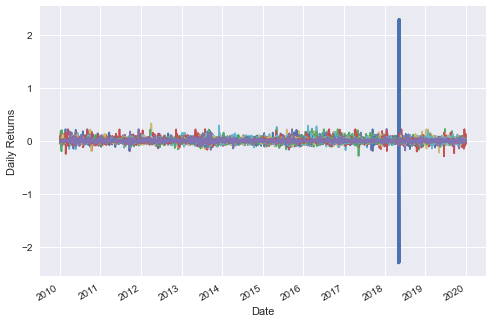

In [45]:
ret_all.plot(legend=False, ylabel='Daily Returns')

In [46]:
# ret_all.info()

### **Daily Price Variation**

In [47]:
high = df1['High'][:training_year][ret_all.columns]
low = df1['Low'][:training_year][ret_all.columns]

In [48]:
daily_var = high / low - 1
daily_var = daily_var[1:]

In [49]:
daily_var.mean()

AALI.JK    0.027229
ADHI.JK    0.035915
ADRO.JK    0.035473
AKRA.JK    0.030910
ANTM.JK    0.032587
             ...   
TINS.JK    0.035930
TLKM.JK    0.022448
UNTR.JK    0.028555
UNVR.JK    0.023183
WIKA.JK    0.035081
Length: 52, dtype: float64

## **Volume**

In [50]:
stocks_volume = df1['Volume'][:training_year].dropna(how='all', axis=1)
stocks_volume_d_avg=stocks_volume.mean()
stocks_volume_total = stocks_volume.sum()

<AxesSubplot:xlabel='Date'>

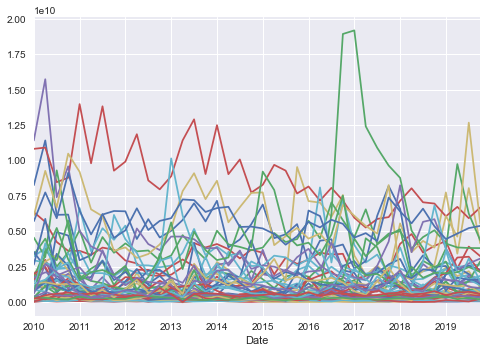

In [51]:
stocks_volume.resample('BQ').sum().plot(legend=False)

In [52]:
market_volume =  df2['Volume'][:training_year]
market_volume_d_avg=market_volume.mean()
market_volume_total = market_volume.sum()

In [53]:
avg_daily_volume_ratio = stocks_volume_d_avg / market_volume_d_avg
avg_daily_volume_ratio.sort_values()

GGRM.JK    0.000289
AALI.JK    0.000365
ITMG.JK    0.000412
ISAT.JK    0.000622
INTP.JK    0.000700
             ...   
BRPT.JK    0.017893
BBCA.JK    0.018370
TLKM.JK    0.024809
LPKR.JK    0.025263
BBRI.JK    0.037656
Length: 52, dtype: float64

In [54]:
total_volume_ratio = stocks_volume_total / market_volume_total
total_volume_ratio.sort_values()

GGRM.JK    0.000290
AALI.JK    0.000367
ITMG.JK    0.000414
ISAT.JK    0.000625
INTP.JK    0.000703
             ...   
BRPT.JK    0.017929
BBCA.JK    0.018452
TLKM.JK    0.024880
LPKR.JK    0.025335
BBRI.JK    0.037779
Length: 52, dtype: float64

In [55]:
volume_data = pd.DataFrame({'Total Vol. Ratio':total_volume_ratio, 
                            'Avg. Trading Vol. Ratio (Daily)':avg_daily_volume_ratio})
volume_data.sort_values(by='Total Vol. Ratio')

Total Vol. Ratio  Avg. Trading Vol. Ratio (Daily)
GGRM.JK          0.000290                         0.000289
AALI.JK          0.000367                         0.000365
ITMG.JK          0.000414                         0.000412
ISAT.JK          0.000625                         0.000622
INTP.JK          0.000703                         0.000700
...                   ...                              ...
BRPT.JK          0.017929                         0.017893
BBCA.JK          0.018452                         0.018370
TLKM.JK          0.024880                         0.024809
LPKR.JK          0.025335                         0.025263
BBRI.JK          0.037779                         0.037656

[52 rows x 2 columns]

In [56]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']), fontweight='semibold', alpha=0.7)

# data_plot=volume_data

# fig, ax = plt.subplots(figsize = [10,8])
# ax = sns.scatterplot(x='Total Vol. Ratio', y='Avg. Trading Vol. Ratio (Daily)', 
#                 data=data_plot, s=100)
# ax.set_title('Trade Volume of Stocks vs Market Volume', fontsize=20)
# label_point(data_plot['Total Vol. Ratio'], data_plot['Avg. Trading Vol. Ratio (Daily)'],
#             data_plot.index.to_series(), ax)

### **Data Clean Up**

Here we can see that there are definite outliers in the data. To clean up the data, we caculate the _Z-score_ of each stock (column) and remove any value that has a _Z-score_ of above $\pm 3\sigma$.

In [57]:
from scipy import stats

In [58]:
ret = ret_all.apply(lambda col: col[np.abs(stats.zscore(col, nan_policy='omit')) < 3])
ret[ret.columns.values] = ret[ret.columns.values].ffill()

In [59]:
ret_ann = ret.resample('Y').sum()
ret_ann.index = ret_ann.index.strftime('%Y')

In [60]:
ret_mon = ret.resample('BM').sum()

In [61]:
sample=ret.sample(n=5, axis=1).columns

<AxesSubplot:xlabel='Date', ylabel='Daily Return Rate'>

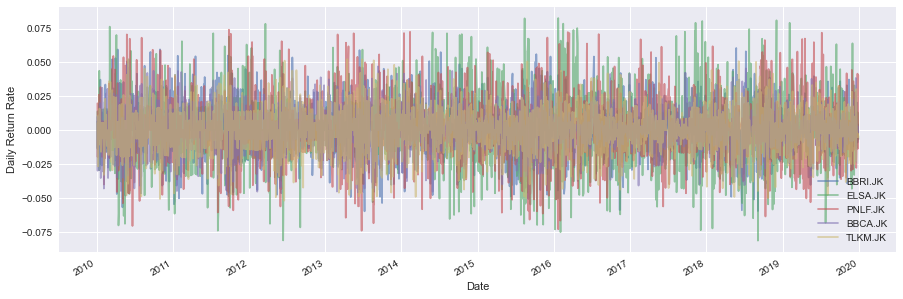

In [62]:
ret[sample].plot(ylabel='Daily Return Rate', alpha=0.6, figsize=(15,5))

<AxesSubplot:xlabel='Date', ylabel='Monthly Return Rate'>

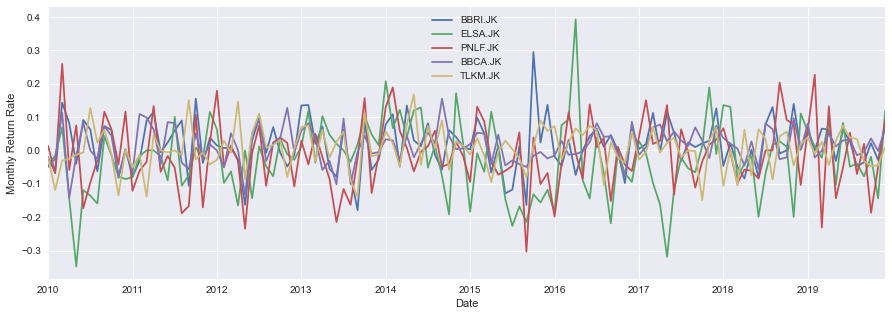

In [63]:
ret_mon[sample].plot(ylabel='Monthly Return Rate', figsize=(15,5))

<AxesSubplot:xlabel='Date', ylabel='Annual Return Rate'>

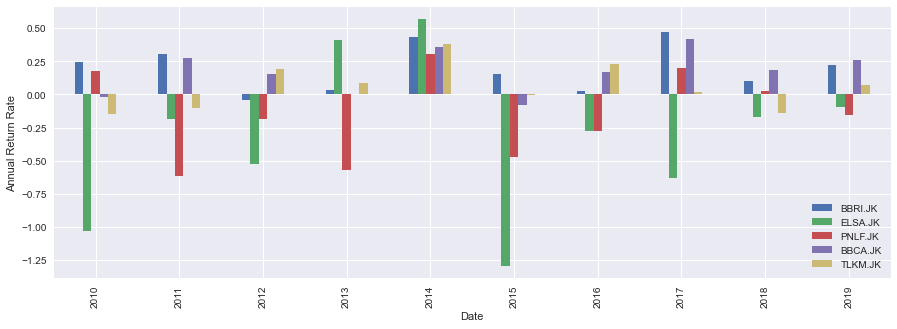

In [64]:
ret_ann[sample].plot(kind='bar', ylabel='Annual Return Rate',figsize=(15,5))

In [65]:
freq = ret.apply(lambda col: col.value_counts())

### **Distributions of Rate of Return**

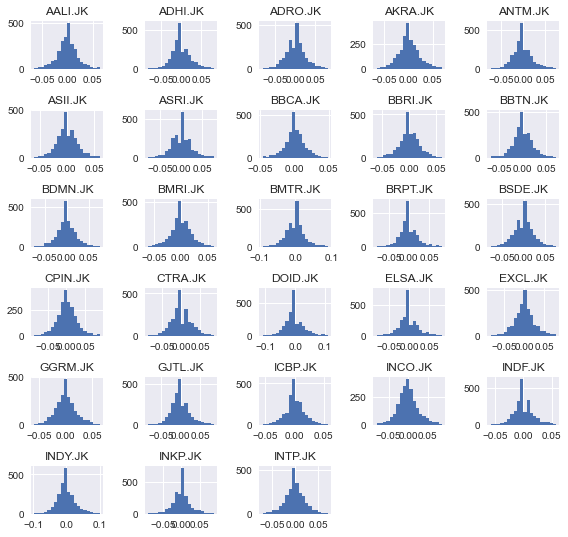

In [66]:
ret.iloc[:,:28].hist(bins=20,figsize=(8,16), layout=(13,5))
plt.tight_layout()

In [67]:
# ret.iloc[:,29:].hist(bins=20,figsize=(8,16), layout=(13,5))
# plt.tight_layout()

# **Correlation Matrix of Stocks**

In [68]:
corr_matrix = ret.corr()

In [69]:
# corr_matrix.info()

<AxesSubplot:>

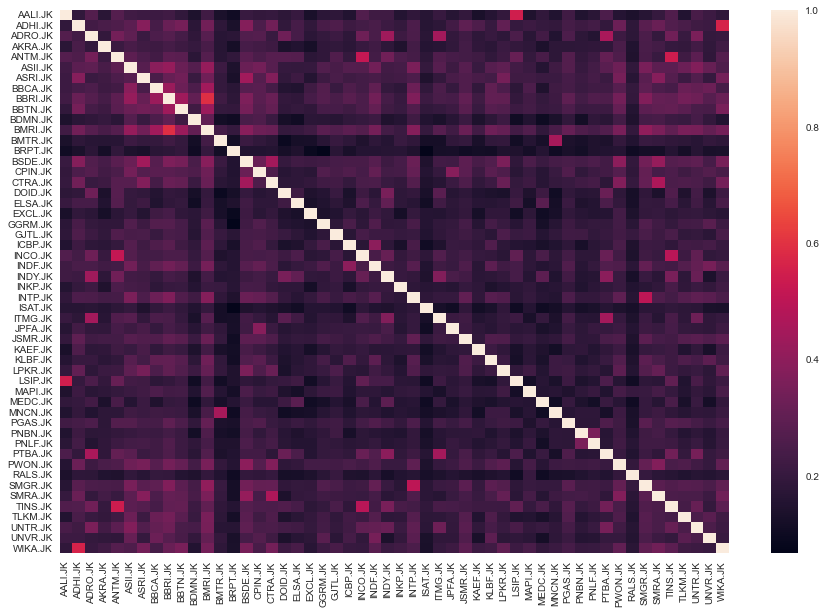

In [70]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix)

## **Correlation Score**

This is an _experimental_ variable where each stock is assigned a _score_ based on its average correlation value to other stocks in KOMPAS100. A low score may suggests that the stock is highly uncorrelated to other stocks and may help in building a highly diversified portfolio.

In [71]:
corr_score = corr_matrix.apply(lambda col: (col.sum() - 1 )/ (len(col)-1))
corr_score.sort_values().head(20)

BRPT.JK    0.136692
ISAT.JK    0.150928
RALS.JK    0.156819
EXCL.JK    0.169272
MEDC.JK    0.170836
BMTR.JK    0.172067
MNCN.JK    0.176957
KAEF.JK    0.178715
PNBN.JK    0.182055
DOID.JK    0.183853
BDMN.JK    0.184553
INKP.JK    0.186672
MAPI.JK    0.186772
ELSA.JK    0.187477
PNLF.JK    0.192819
LSIP.JK    0.193070
AKRA.JK    0.194465
AALI.JK    0.195296
ICBP.JK    0.197512
JPFA.JK    0.197966
dtype: float64

In [228]:
dist_matrix = np.sqrt((1-corr_matrix)*2)

<AxesSubplot:>

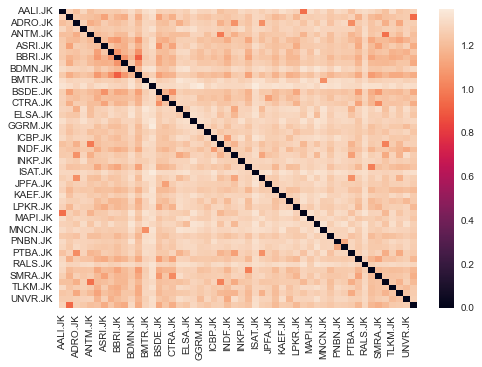

In [229]:
sns.heatmap(dist_matrix)

In [230]:
from scipy.spatial.distance import pdist
cond_dist_matrix = pdist(ret)

In [231]:
cond_dist_matrix

array([0.24067796, 0.22807431, 0.17914743, ..., 0.12981661, 0.16695917,
       0.17281176])

## **Market (KOMPAS100 Index) Rate of Return**

In [76]:
market_price = df2[:training_year]['Close']
rate_market = log_rate(market_price)
rate_market

Date
2010-01-05    0.012389
2010-01-06   -0.001602
2010-01-07   -0.006960
2010-01-08    0.010556
2010-01-11    0.006463
                ...   
2019-12-20    0.008202
2019-12-23    0.002771
2019-12-26    0.001667
2019-12-27    0.001338
2019-12-30   -0.007285
Name: Close, Length: 2450, dtype: float64

In [77]:
rate_market_ann=market_price.resample('Y').ffill().pct_change().dropna()

In [78]:
rate_market_annual = rate_market_ann.mean()

In [79]:
rate_market_annual

0.05188717732205609

<AxesSubplot:xlabel='Date', ylabel='Daily Return Rate'>

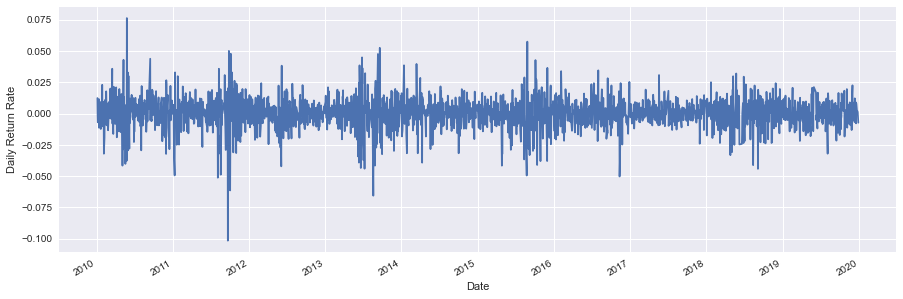

In [80]:
rate_market.plot(legend=False, ylabel='Daily Return Rate', figsize=(15,5))

## **Daily Bond Yield**

In [81]:
rate_bond = bond_yield['Close'][:training_year]
rate_bond.mean()

0.06260185291700894

In [82]:
daily_rf = (rate_bond)*(1/(365))
daily_rf

Date
2010-01-04    0.000207
2010-01-05    0.000174
2010-01-06    0.000185
2010-01-07    0.000170
2010-01-08    0.000181
                ...   
2019-12-20    0.000142
2019-12-23    0.000141
2019-12-26    0.000138
2019-12-27    0.000139
2019-12-30    0.000138
Name: Close, Length: 2434, dtype: float64

## **Excess Market Returns**

In [83]:
excess_ret_mar = ret.apply(lambda column: column-rate_market[rate_market.index.isin(column.index)])

<AxesSubplot:xlabel='Date'>

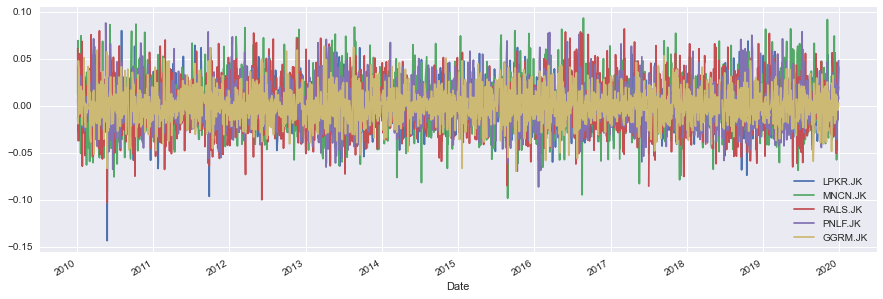

In [84]:
excess_ret_mar.sample(n=5, axis=1).plot(figsize=(15,5))

## **Market Premium**

In [85]:
market_premium = (rate_market[rate_market.index.isin(daily_rf.index)] - daily_rf).dropna()
market_premium.mean()

0.000111834645280038

<AxesSubplot:xlabel='Date'>

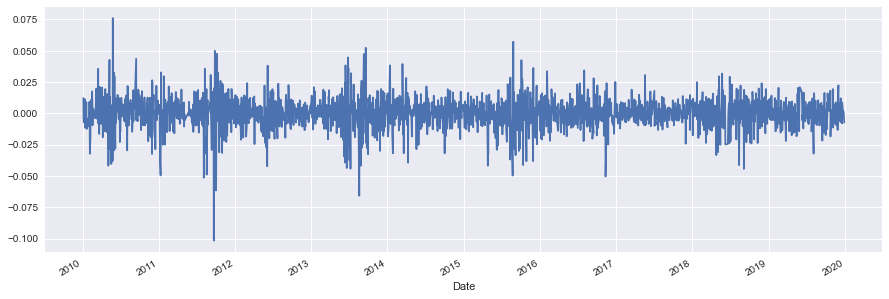

In [86]:
market_premium.plot(figsize=(15,5))

## **Risk Premium**

In [87]:
risk_premium = ret.apply(lambda column: column-daily_rf[daily_rf.index.isin(column.index)])

<AxesSubplot:xlabel='Date'>

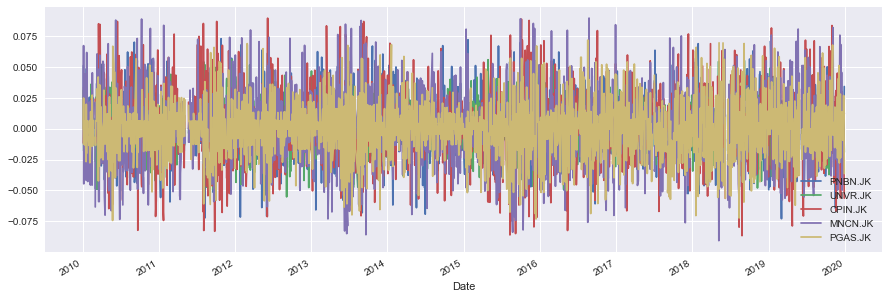

In [88]:
risk_premium.sample(n=5, axis=1).plot(figsize=(15,5))

In [89]:
risk_premium

AALI.JK   ADHI.JK   ADRO.JK   AKRA.JK   ANTM.JK   ASII.JK  \
Date                                                                     
2010-01-05  0.014395 -0.024866  0.022426 -0.016703 -0.000174  0.005476   
2010-01-06 -0.004325  0.012238  0.005386 -0.008553 -0.000185 -0.005834   
2010-01-07  0.038492  0.012100  0.021809 -0.017119  0.021336 -0.031827   
2010-01-08  0.007771  0.011940  0.062998 -0.008765 -0.000181  0.005650   
2010-01-11 -0.012133 -0.012301  0.009972  0.016914 -0.010875  0.015682   
...              ...       ...       ...       ...       ...       ...   
2019-12-20  0.016634 -0.008441 -0.035233  0.015048 -0.006148  0.010748   
2019-12-23  0.005389 -0.012720  0.025501 -0.005179 -0.006183 -0.003758   
2019-12-26  0.035967 -0.004366  0.003022  0.002384  0.017881 -0.003767   
2019-12-27  0.027835  0.012493 -0.003298 -0.025650 -0.006109  0.007108   
2019-12-30  0.005021 -0.017016 -0.016088  0.020323  0.005832 -0.000138   

             ASRI.JK   BBCA.JK   BBRI.JK   BBTN.JK  ...   PTBA.JK   PWON.JK  \
Date                                                ...                       
2010-01-05  0.018695  0.009679  0.006216 -0.000174  ... -0.000174  0.018874   
2010-01-06 -0.000185 -0.030038 -0.013005 -0.000185  ...  0.022039 -0.058454   
2010-01-07  0.009132  0.004868 -0.013157 -0.000170  ...  0.002573 -0.010220   
2010-01-08  0.027218 -0.025628  0.006334  0.031568  ...  0.002555  0.009869   
2010-01-11  0.052464  0.010076 -0.000180 -0.021234  ... -0.011169 -0.000180   
...              ...       ...       ...       ...  ...       ...       ...   
2019-12-20 -0.033203  0.008908  0.002154 -0.009487  ... -0.019190 -0.008875   
2019-12-23 -0.000141 -0.000141  0.020291 -0.004847  ...  0.003698 -0.008952   
2019-12-26  0.008231  0.002861 -0.009167  0.004568  ...  0.011291  0.017407   
2019-12-27 -0.000139  0.002104  0.004386  0.009207  ...  0.003642 -0.000139   
2019-12-30 -0.008507 -0.001633 -0.006933 -0.014190  ...  0.003628 -0.008872   

             RALS.JK   SMGR.JK   SMRA.JK   TINS.JK   TLKM.JK   UNTR.JK  \
Date                                                                     
2010-01-05  0.072851  0.012898  0.017218  0.023083  0.005048  0.024985   
2010-01-06 -0.028758  0.012719  0.016910  0.011244 -0.010656 -0.003295   
2010-01-07 -0.029584 -0.013073 -0.000170 -0.011599 -0.026838 -0.012709   
2010-01-08 -0.015219 -0.006696 -0.000181 -0.000181  0.010572  0.033931   
2010-01-11 -0.030952  0.012807 -0.000180  0.011249  0.010458  0.050351   
...              ...       ...       ...       ...       ...       ...   
2019-12-20 -0.039362 -0.016174 -0.015105 -0.012337  0.030164 -0.022248   
2019-12-23  0.048649 -0.010293 -0.000141 -0.000141 -0.000141 -0.002497   
2019-12-26 -0.000138  0.005966  0.004875  0.012058 -0.005125  0.019711   
2019-12-27  0.014046 -0.008285 -0.010189 -0.000139 -0.002642  0.002171   
2019-12-30 -0.000138 -0.018715  0.014900 -0.000138 -0.005164 -0.007083   

             UNVR.JK   WIKA.JK  
Date                            
2010-01-05  0.031009 -0.000174  
2010-01-06 -0.008996 -0.000185  
2010-01-07 -0.018027 -0.000170  
2010-01-08  0.004313 -0.015449  
2010-01-11  0.008749 -0.000180  
...              ...       ...  
2019-12-20  0.022331 -0.015180  
2019-12-23  0.000459 -0.007746  
2019-12-26  0.018888  0.012505  
2019-12-27  0.008073  0.009862  
2019-12-30 -0.019007 -0.010138  

[2470 rows x 52 columns]

In [90]:
def reg_plot(x,y):
    exog = x[x.index.isin(y.index)]
    endog = y[y.index.isin(x.index)]
    reg_analysis=pd.DataFrame({'Risk Premium': endog, 'Market Premium':exog})
    fig, ax = plt.subplots()
    sns.regplot(x='Market Premium', y= 'Risk Premium', data= reg_analysis, ci=None,\
            line_kws={'color':'r'},scatter_kws={"s": 20}, ax=ax)
    ax.axhline(y=0, color='k', linewidth=1)  
    ax.axvline(x=0, color='k', linewidth=1)

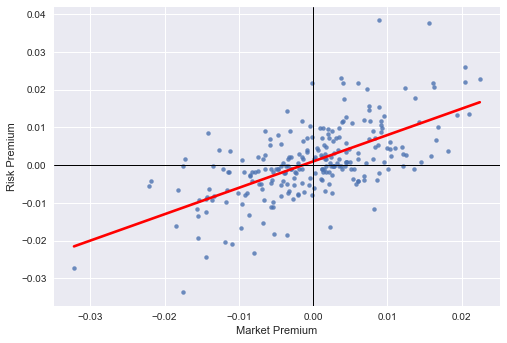

In [91]:
y = risk_premium['BBCA.JK'].loc['2019']
x = market_premium.loc['2019']
reg_plot(x,y)

## **Daily Sharpe**

In [92]:
daily_sr = risk_premium/daily_var

In [93]:
daily_sr.replace([np.inf, -np.inf], np.nan, inplace=True)

In [94]:
daily_sr

AALI.JK   ADHI.JK   ADRO.JK   AKRA.JK   ANTM.JK   ASII.JK  \
Date                                                                     
2010-01-05  0.683740 -0.397863  0.784906 -0.662556 -0.005330  0.224513   
2010-01-06 -0.297215  0.489515  0.241043 -0.196717 -0.004200 -0.315505   
2010-01-07  1.035004  0.326701  0.986845 -0.273911  0.654307 -0.749591   
2010-01-08  0.430875  0.483582  0.827971 -0.247613 -0.008418  0.272814   
2010-01-11 -0.430709 -0.498210  0.357192  0.648384 -0.337138  0.829916   
...              ...       ...       ...       ...       ...       ...   
2019-12-20  0.512723 -0.506431 -0.530256  0.533533 -0.202875  0.414552   
2019-12-23  0.728862 -0.428836  0.785444 -0.409115 -0.255057 -0.113144   
2019-12-26  0.781211 -0.257595  0.094891  0.103590  0.742054 -0.170790   
2019-12-27  0.923474  0.740226 -0.148418 -0.757664 -0.253512  0.649184   
2019-12-30  0.191462 -0.571266 -0.714750  0.652019  0.486957 -0.009477   

             ASRI.JK   BBCA.JK   BBRI.JK   BBTN.JK  ...   PTBA.JK   PWON.JK  \
Date                                                ...                       
2010-01-05  0.648088  0.319393  0.484853 -0.007213  ... -0.010255  0.490733   
2010-01-06 -0.006524 -0.991250 -0.400568 -0.001723  ...  0.871753 -0.826700   
2010-01-07  0.484006  0.156584 -0.496684 -0.003869  ...  0.092896 -1.011821   
2010-01-08  0.582463 -0.994358  0.318797  0.484037  ...  0.116250  0.977062   
2010-01-11  0.824428  0.658324 -0.013780 -0.390701  ... -0.308447 -0.004503   
...              ...       ...       ...       ...  ...       ...       ...   
2019-12-20 -0.987776  0.452944  0.186145 -0.673611  ... -0.831565 -0.331347   
2019-12-23 -0.008387 -0.011717  0.804266 -0.205510  ...  0.119258 -0.501289   
2019-12-26  0.323738  0.293131 -0.806697  0.322830  ...  0.591645  0.655652   
2019-12-27 -0.008244  0.467900  0.320203  0.985174  ...  0.191584 -0.007897   
2019-12-30 -0.501890 -0.217874 -0.335887 -0.752076  ...  0.159637 -0.501270   

             RALS.JK   SMGR.JK   SMRA.JK   TINS.JK   TLKM.JK   UNTR.JK  \
Date                                                                     
2010-01-05  0.686884  0.986711  0.327146  0.669404  0.482083  0.874471   
2010-01-06 -0.651846  0.391736  0.326917  0.322334 -0.402793 -0.116055   
2010-01-07 -0.991068 -0.283879 -0.004932 -0.246476 -0.993018 -0.399076   
2010-01-08 -0.329741 -0.339250 -0.005250 -0.005129  0.389042  1.078999   
2010-01-11 -0.495229  0.489870 -0.010448  0.489318  0.488930  1.038482   
...              ...       ...       ...       ...       ...       ...   
2019-12-20 -0.656040 -0.664486 -0.370062 -0.502732  0.980318 -0.649040   
2019-12-23  0.810821 -0.559269 -0.005497 -0.004567 -0.011220 -0.090857   
2019-12-26 -0.004725  0.288763  0.191097  0.491350 -0.509952  0.983241   
2019-12-27  0.259214 -0.448323 -0.247080 -0.007574 -0.350466  0.155569   
2019-12-30 -0.003182 -0.443541  0.415058 -0.011345 -0.341655 -0.273008   

             UNVR.JK   WIKA.JK  
Date                            
2010-01-05  0.983434 -0.005649  
2010-01-06 -0.403002 -0.006093  
2010-01-07 -0.796810 -0.003685  
2010-01-08  0.236147 -1.004157  
2010-01-11  0.323701 -0.011709  
...              ...       ...  
2019-12-20  0.706717 -0.601112  
2019-12-23  0.024247 -0.302077  
2019-12-26  0.925506  0.702054  
2019-12-27  0.857722  0.437196  
2019-12-30 -0.818754 -0.403511  

[2470 rows x 52 columns]

## **Instruments Analysis**

In [95]:
def lin_regression(asset_ret, market_ret):
    stock = asset_ret[asset_ret.index.isin(market_ret.index)] 
    market = market_ret[market_ret.index.isin(stock.index)] 
    reg = stock.apply(lambda col: stats.linregress(col.dropna(), market[market.index.isin(col.dropna().index)]))
    return reg

In [96]:
#Training Data
train_ret = ret[:'2018']
res= pd.DataFrame()
metrics =pd.DataFrame()
sharpe =pd.DataFrame()

for year in range(2010, 2019):
    
    yr = f'{year}'

    #Covariances
    tr_cov = train_ret[:yr].cov()
    tr_std = train_ret[:yr].std()
    tr_semicov = train_ret[:yr][train_ret[:yr] < 0].cov()
    tr_mar_cov = train_ret[:yr].apply(lambda col: col.cov(rate_market[:yr]))
    tr_mar_var = rate_market[:yr].var()

    #Regression
    tr_y = risk_premium.loc[:yr]
    tr_x = market_premium.loc[:yr]
    reg = lin_regression(tr_y,tr_x)
    tr_alpha = reg.iloc[1]
    tr_beta = reg.iloc[0]
    tr_rsq = reg.iloc[2]
    tr_sse = reg.iloc[4]


    #Expected Returns Market
    tr_market_er = rate_market[:yr].mean()*252
    tr_risk_free = daily_rf[:yr].mean()*365
    tr_er_marketprem = (tr_market_er - tr_risk_free)

    #CAPM Beta 
    tr_beta_stat = tr_mar_cov.divide(tr_mar_var)

    #LReg Expected Return
    tr_beta_prem = tr_beta.apply(lambda x: x*(market_premium.loc[yr])).T
    tr_lreg_ret = tr_alpha + tr_beta_prem.sum() + tr_risk_free
    tr_exp_ret = tr_lreg_ret

    #CAPM Expected Return
    tr_beta_prem_stat = tr_beta_stat*tr_er_marketprem
    tr_ols = (tr_beta_prem_stat + tr_risk_free)
    tr_exp_ret_stat = tr_ols

    #Annualised Return
    tr_mean_ret = train_ret[:yr].mean()
    tr_ind_er = tr_mean_ret*(252)
    
    #Exponentially Weighted Return
    tr_300ewm_ret = train_ret[:yr].ewm(span=300).mean().iloc[-1]
    tr_300ewm_er = tr_300ewm_ret*252
    tr_500ewm_ret = train_ret[:yr].ewm(span=500).mean().iloc[-1]
    tr_500ewm_er = tr_500ewm_ret*252
    
    #Ex-ante Sharpe
    tr_sharpe_ante = (tr_exp_ret - tr_risk_free)/(tr_std*np.sqrt(252))
    tr_sharpe_ante_capm = (tr_exp_ret_stat - tr_risk_free)/(tr_std*np.sqrt(252))
    tr_sharpe_ante_ann = (tr_ind_er - tr_risk_free)/(tr_std*np.sqrt(252))
    tr_sharpe_ante_300ewm = (tr_300ewm_er - tr_risk_free)/(tr_std*np.sqrt(252))
    tr_sharpe_ante_500ewm = (tr_500ewm_er - tr_risk_free)/(tr_std*np.sqrt(252))
    
    #Real Return 2019
    tr_ret = ret_ann.loc[f'{year+1}']
    tr_real_std = ret.loc[f'{year+1}'].std()
    
    #Ex-post Sharpe
    tr_sharpe_post = (tr_ret - tr_risk_free)/(tr_real_std*np.sqrt(252))    
    
    rets_data = pd.DataFrame({'Exp. Ret. (LinReg)': tr_exp_ret, 'Exp. Ret. (OLS)': tr_exp_ret_stat, 'Exp. Annualised Return': tr_ind_er, 'Exp. 300 EMA Return':tr_300ewm_er,'Exp. 500 EMA Return':tr_500ewm_er,
                              'Realised Return': tr_ret}).T.stack()
    metrics_data = pd.DataFrame({'Beta(CAPM)':tr_beta_stat, 'Beta (LinReg)': tr_beta, 'Alpha (LinReg)':tr_alpha}).T.stack()
    sharpe_data = pd.DataFrame({'Ex-Ante Sharpe LinReg':tr_sharpe_ante, 'Ex-Ante Sharpe CAPM':tr_sharpe_ante_capm, 'Ex-Ante Sharpe AnnRet':tr_sharpe_ante_ann, 
                                'Ex-Ante Sharpe 300 EMA':tr_sharpe_ante_300ewm, 'Ex-Ante Sharpe 500 EMA':tr_sharpe_ante_500ewm,'Ex-Post Sharpe':tr_sharpe_post}).T.stack()
    
    res[f'{year+1}'] = rets_data
    metrics[f'{year+1}'] = metrics_data
    sharpe[f'{year+1}'] = sharpe_data


In [97]:
res_mean_ann=res.groupby(axis=0, level=0).mean().T

<AxesSubplot:>

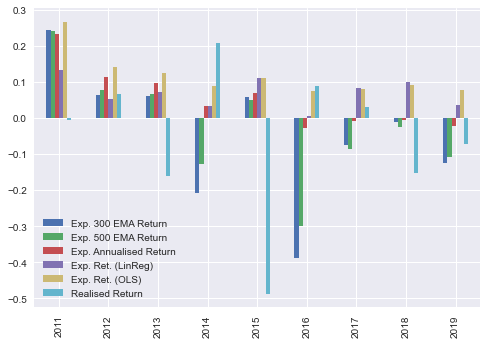

In [98]:
res_mean_ann.plot(kind='bar')

In [99]:
ttest_rets = res_mean_ann.apply(lambda col: stats.ttest_ind(col, res_mean_ann['Realised Return']))
ttest_rets.rename(index={0:'t-statistics', 1:'p-value'},inplace=True)

In [100]:
ttest_rets

Exp. 300 EMA Return  Exp. 500 EMA Return  \
t-statistics             0.127811             0.361978   
p-value                  0.899891             0.722105   

              Exp. Annualised Return  Exp. Ret. (LinReg)  Exp. Ret. (OLS)  \
t-statistics                1.478069            1.811692         2.447813   
p-value                     0.158804            0.088845         0.026288   

              Realised Return  
t-statistics              0.0  
p-value                   1.0

In [101]:
res_mean_ann.corr()

Exp. 300 EMA Return  Exp. 500 EMA Return  \
Exp. 300 EMA Return                1.000000             0.987582   
Exp. 500 EMA Return                0.987582             1.000000   
Exp. Annualised Return             0.811159             0.886238   
Exp. Ret. (LinReg)                 0.854489             0.808097   
Exp. Ret. (OLS)                    0.769472             0.833734   
Realised Return                   -0.423899            -0.348818   

                        Exp. Annualised Return  Exp. Ret. (LinReg)  \
Exp. 300 EMA Return                   0.811159            0.854489   
Exp. 500 EMA Return                   0.886238            0.808097   
Exp. Annualised Return                1.000000            0.592058   
Exp. Ret. (LinReg)                    0.592058            1.000000   
Exp. Ret. (OLS)                       0.955187            0.619332   
Realised Return                      -0.078337           -0.566635   

                        Exp. Ret. (OLS)  Realised Return  
Exp. 300 EMA Return            0.769472        -0.423899  
Exp. 500 EMA Return            0.833734        -0.348818  
Exp. Annualised Return         0.955187        -0.078337  
Exp. Ret. (LinReg)             0.619332        -0.566635  
Exp. Ret. (OLS)                1.000000        -0.009727  
Realised Return               -0.009727         1.000000

In [102]:
res_mean_ann.apply(lambda col: (np.square(res_mean_ann['Realised Return']-col)).mean())

Exp. 300 EMA Return       0.093648
Exp. 500 EMA Return       0.077257
Exp. Annualised Return    0.056072
Exp. Ret. (LinReg)        0.061119
Exp. Ret. (OLS)           0.068529
Realised Return           0.000000
dtype: float64

In [103]:
metrics

2011      2012      2013      2014      2015  \
Beta(CAPM)     AALI.JK  0.761424  0.669114  0.720140  0.636588  0.637109   
               ADHI.JK  0.824512  0.786972  0.832700  0.845370  0.919688   
               ADRO.JK  0.824060  0.887441  0.978165  0.914011  0.926586   
               AKRA.JK  0.854439  0.791477  0.854241  0.788142  0.779085   
               ANTM.JK  0.925785  0.840450  0.863843  0.805788  0.777048   
...                          ...       ...       ...       ...       ...   
Alpha (LinReg) TINS.JK  0.001117  0.000632  0.000479  0.000273  0.000360   
               TLKM.JK  0.001423  0.000745  0.000467  0.000256  0.000249   
               UNTR.JK  0.000720  0.000075  0.000372  0.000098  0.000267   
               UNVR.JK  0.000716  0.000086  0.000118  0.000032  0.000112   
               WIKA.JK  0.000418  0.000204 -0.000007 -0.000049 -0.000075   

                            2016      2017      2018      2019  
Beta(CAPM)     AALI.JK  0.672605  0.646833  0.639605  0.612330  
               ADHI.JK  0.917445  0.901432  0.894328  0.882809  
               ADRO.JK  0.908267  0.904116  0.915978  0.915783  
               AKRA.JK  0.701432  0.701401  0.707928  0.712021  
               ANTM.JK  0.770127  0.754829  0.745932  0.765695  
...                          ...       ...       ...       ...  
Alpha (LinReg) TINS.JK  0.000359  0.000271  0.000377  0.000300  
               TLKM.JK  0.000081  0.000062  0.000135  0.000104  
               UNTR.JK  0.000117  0.000138  0.000134  0.000098  
               UNVR.JK -0.000012 -0.000008  0.000004 -0.000019  
               WIKA.JK -0.000105 -0.000020  0.000123  0.000058  

[156 rows x 9 columns]

<AxesSubplot:>

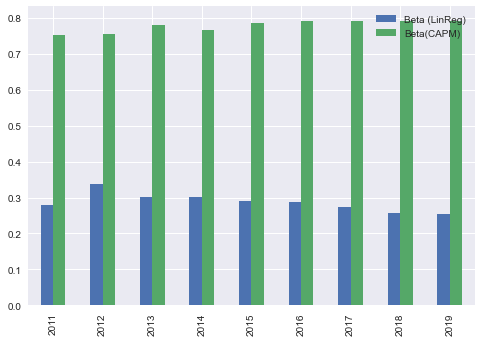

In [104]:
annual_betas = metrics.groupby(level=0).mean().drop('Alpha (LinReg)')
annual_betas.T.plot(kind='bar')

In [105]:
sharpe

2011      2012      2013      2014  \
Ex-Ante Sharpe LinReg AALI.JK  0.265481 -0.031973  0.063032 -0.075017   
                      ADHI.JK  0.141604 -0.018576  0.037078 -0.045256   
                      ADRO.JK  0.229998 -0.023047  0.054112 -0.063873   
                      AKRA.JK  0.193858 -0.026774  0.052747 -0.068322   
                      ANTM.JK  0.243613 -0.034244  0.078568 -0.084797   
...                                 ...       ...       ...       ...   
Ex-Post Sharpe        TINS.JK -0.617618 -0.054168 -0.048573  0.000029   
                      TLKM.JK -0.641867  0.512205  0.093426  1.390828   
                      UNTR.JK  0.417860 -1.083736  0.642775 -0.388564   
                      UNVR.JK  0.696600  0.303432 -0.424636  0.817672   
                      WIKA.JK -0.792721  1.859571 -0.303701  2.630470   

                                   2015      2016      2017      2018  \
Ex-Ante Sharpe LinReg AALI.JK  0.161497 -0.161629  0.058930  0.112589   
                      ADHI.JK  0.106604 -0.118370  0.047642  0.087627   
                      ADRO.JK  0.130961 -0.131601  0.045142  0.082505   
                      AKRA.JK  0.152164 -0.154132  0.055141  0.099413   
                      ANTM.JK  0.185762 -0.188023  0.068675  0.119335   
...                                 ...       ...       ...       ...   
Ex-Post Sharpe        TINS.JK -2.443041  0.757424 -1.838233 -0.403879   
                      TLKM.JK -0.271936  0.657690 -0.271165 -0.692148   
                      UNTR.JK -0.342750 -0.065724  1.112544 -0.642330   
                      UNVR.JK -0.401029  0.596460  1.873396 -0.763356   
                      WIKA.JK -1.737931 -0.603294 -1.725065  0.055296   

                                   2019  
Ex-Ante Sharpe LinReg AALI.JK -0.077715  
                      ADHI.JK -0.065185  
                      ADRO.JK -0.058719  
                      AKRA.JK -0.073653  
                      ANTM.JK -0.083036  
...                                 ...  
Ex-Post Sharpe        TINS.JK -1.438336  
                      TLKM.JK  0.035647  
                      UNTR.JK -1.185103  
                      UNVR.JK -0.500653  
                      WIKA.JK  0.598349  

[312 rows x 9 columns]

In [106]:
sharpe_mean_ann=sharpe.groupby(axis=0, level=0).mean().T

In [107]:
ttest_sharpe = sharpe_mean_ann.apply(lambda col: stats.ttest_ind(col, sharpe_mean_ann['Ex-Post Sharpe']))
ttest_sharpe.rename(index={0:'t-statistics', 1:'p-value'},inplace=True)

In [108]:
ttest_sharpe

Ex-Ante Sharpe 300 EMA  Ex-Ante Sharpe 500 EMA  \
t-statistics                0.065274                0.296915   
p-value                     0.948765                0.770351   

              Ex-Ante Sharpe AnnRet  Ex-Ante Sharpe CAPM  \
t-statistics               1.449748             2.405463   
p-value                    0.166447             0.028606   

              Ex-Ante Sharpe LinReg  Ex-Post Sharpe  
t-statistics               1.732171             0.0  
p-value                    0.102473             1.0

## **Instruments Calculations**

In [109]:
cov = ret.cov()

In [110]:
semicov = ret[ret < 0].cov()

In [111]:
mar_cov = ret.apply(lambda col: col.cov(rate_market[rate_market.index.isin(col.index)]))
mar_cov

AALI.JK    0.000089
ADHI.JK    0.000133
ADRO.JK    0.000136
AKRA.JK    0.000103
ANTM.JK    0.000117
             ...   
TINS.JK    0.000134
TLKM.JK    0.000106
UNTR.JK    0.000137
UNVR.JK    0.000106
WIKA.JK    0.000125
Length: 52, dtype: float64

In [112]:
mar_var = rate_market.var()
mar_var

0.00014734133787240835

In [113]:
y = risk_premium
x = market_premium
reg = lin_regression(y,x)

In [114]:
alpha = reg.iloc[1]
beta = reg.iloc[0]
rsq = reg.iloc[2]
sse = reg.iloc[4]

In [115]:
beta.sort_values()

DOID.JK    0.120179
BRPT.JK    0.135756
MEDC.JK    0.143173
RALS.JK    0.152101
BMTR.JK    0.155395
             ...   
TLKM.JK    0.396187
ASII.JK    0.401807
BBRI.JK    0.427430
BMRI.JK    0.434512
BBCA.JK    0.509523
Name: 0, Length: 52, dtype: float64

In [116]:
alpha.sort_values()

BBRI.JK   -0.000169
BBCA.JK   -0.000169
CPIN.JK   -0.000112
MAPI.JK   -0.000086
KLBF.JK   -0.000057
             ...   
MEDC.JK    0.000328
ELSA.JK    0.000348
INDY.JK    0.000384
ANTM.JK    0.000415
DOID.JK    0.000439
Name: 1, Length: 52, dtype: float64

In [117]:
rsq.sort_values()

BRPT.JK    0.255586
MEDC.JK    0.293078
ISAT.JK    0.303661
RALS.JK    0.311024
DOID.JK    0.317682
             ...   
TLKM.JK    0.532995
BBCA.JK    0.601954
ASII.JK    0.620156
BBRI.JK    0.648001
BMRI.JK    0.671539
Name: 2, Length: 52, dtype: float64

In [118]:
sse

AALI.JK    0.011522
ADHI.JK    0.009226
ADRO.JK    0.008766
AKRA.JK    0.010522
ANTM.JK    0.010236
             ...   
TINS.JK    0.009146
TLKM.JK    0.012790
UNTR.JK    0.009721
UNVR.JK    0.012569
WIKA.JK    0.009662
Name: 4, Length: 52, dtype: float64

In [119]:
market_er = rate_market.mean()*252
risk_free = daily_rf.mean()*252
er_marketprem = (market_er - risk_free)

In [120]:
er_marketprem

0.030578077448314867

In [121]:
beta_stat = mar_cov.divide(mar_var)
beta_stat

AALI.JK    0.606277
ADHI.JK    0.903837
ADRO.JK    0.926279
AKRA.JK    0.699939
ANTM.JK    0.794235
             ...   
TINS.JK    0.907095
TLKM.JK    0.718719
UNTR.JK    0.929116
UNVR.JK    0.717045
WIKA.JK    0.845480
Length: 52, dtype: float64

In [122]:
beta_prem = beta.apply(lambda row: row*market_premium['2019']).T

In [123]:
beta_prem

AALI.JK   ADHI.JK   ADRO.JK   AKRA.JK   ANTM.JK   ASII.JK  \
Date                                                                     
2019-01-02 -0.000043 -0.000045 -0.000041 -0.000042 -0.000048 -0.000077   
2019-01-03  0.001839  0.001924  0.001741  0.001808  0.002048  0.003292   
2019-01-04  0.002474  0.002588  0.002342  0.002432  0.002754  0.004427   
2019-01-07  0.000767  0.000803  0.000726  0.000755  0.000854  0.001373   
2019-01-08 -0.001073 -0.001122 -0.001015 -0.001055 -0.001194 -0.001920   
...              ...       ...       ...       ...       ...       ...   
2019-12-20  0.001810  0.001893  0.001713  0.001779  0.002015  0.003239   
2019-12-23  0.000591  0.000618  0.000559  0.000581  0.000657  0.001057   
2019-12-26  0.000343  0.000359  0.000325  0.000338  0.000382  0.000614   
2019-12-27  0.000269  0.000282  0.000255  0.000265  0.000300  0.000482   
2019-12-30 -0.001667 -0.001743 -0.001578 -0.001639 -0.001856 -0.002983   

             ASRI.JK   BBCA.JK   BBRI.JK   BBTN.JK  ...   PTBA.JK   PWON.JK  \
Date                                                ...                       
2019-01-02 -0.000045 -0.000098 -0.000082 -0.000056  ... -0.000043 -0.000048   
2019-01-03  0.001919  0.004174  0.003501  0.002400  ...  0.001814  0.002062   
2019-01-04  0.002581  0.005614  0.004710  0.003228  ...  0.002439  0.002774   
2019-01-07  0.000801  0.001742  0.001461  0.001002  ...  0.000757  0.000860   
2019-01-08 -0.001119 -0.002434 -0.002042 -0.001400  ... -0.001058 -0.001203   
...              ...       ...       ...       ...  ...       ...       ...   
2019-12-20  0.001888  0.004107  0.003445  0.002362  ...  0.001785  0.002029   
2019-12-23  0.000616  0.001340  0.001124  0.000771  ...  0.000582  0.000662   
2019-12-26  0.000358  0.000779  0.000654  0.000448  ...  0.000339  0.000385   
2019-12-27  0.000281  0.000611  0.000513  0.000351  ...  0.000265  0.000302   
2019-12-30 -0.001739 -0.003783 -0.003173 -0.002175  ... -0.001644 -0.001869   

             RALS.JK   SMGR.JK   SMRA.JK   TINS.JK   TLKM.JK   UNTR.JK  \
Date                                                                     
2019-01-02 -0.000029 -0.000061 -0.000041 -0.000044 -0.000076 -0.000055   
2019-01-03  0.001246  0.002607  0.001762  0.001886  0.003245  0.002361   
2019-01-04  0.001676  0.003507  0.002371  0.002536  0.004365  0.003175   
2019-01-07  0.000520  0.001088  0.000735  0.000787  0.001354  0.000985   
2019-01-08 -0.000727 -0.001520 -0.001028 -0.001100 -0.001893 -0.001377   
...              ...       ...       ...       ...       ...       ...   
2019-12-20  0.001226  0.002565  0.001734  0.001855  0.003193  0.002323   
2019-12-23  0.000400  0.000837  0.000566  0.000605  0.001042  0.000758   
2019-12-26  0.000233  0.000487  0.000329  0.000352  0.000606  0.000441   
2019-12-27  0.000182  0.000382  0.000258  0.000276  0.000475  0.000346   
2019-12-30 -0.001129 -0.002363 -0.001597 -0.001709 -0.002941 -0.002139   

             UNVR.JK   WIKA.JK  
Date                            
2019-01-02 -0.000072 -0.000046  
2019-01-03  0.003062  0.001955  
2019-01-04  0.004118  0.002630  
2019-01-07  0.001278  0.000816  
2019-01-08 -0.001786 -0.001140  
...              ...       ...  
2019-12-20  0.003013  0.001924  
2019-12-23  0.000983  0.000628  
2019-12-26  0.000572  0.000365  
2019-12-27  0.000448  0.000286  
2019-12-30 -0.002775 -0.001772  

[245 rows x 52 columns]

In [124]:
beta_prem_stat = (beta_stat*er_marketprem)

In [125]:
beta_prem_stat.sort_values()

BRPT.JK    0.014911
ISAT.JK    0.016432
AALI.JK    0.018539
MEDC.JK    0.018561
ELSA.JK    0.019217
             ...   
BBRI.JK    0.030286
SMRA.JK    0.030878
CTRA.JK    0.031086
BMRI.JK    0.031918
CPIN.JK    0.033841
Length: 52, dtype: float64

In [126]:
lreg_ret = alpha + beta_prem.apply(lambda col: col + daily_rf)

In [127]:
exp_ret = lreg_ret.sum()

In [128]:
exp_ret.sort_values()

BBCA.JK   -0.013251
BBRI.JK   -0.011086
CPIN.JK    0.008512
MAPI.JK    0.015989
KLBF.JK    0.019522
             ...   
MEDC.JK    0.118290
ELSA.JK    0.122699
INDY.JK    0.131149
ANTM.JK    0.136856
DOID.JK    0.146292
Length: 52, dtype: float64

In [129]:
ols = (beta_prem_stat + risk_free)

In [130]:
exp_ret_stat = ols
exp_ret_stat.sort_values()

BRPT.JK    0.058132
ISAT.JK    0.059653
AALI.JK    0.061760
MEDC.JK    0.061782
ELSA.JK    0.062438
             ...   
BBRI.JK    0.073507
SMRA.JK    0.074099
CTRA.JK    0.074307
BMRI.JK    0.075139
CPIN.JK    0.077062
Length: 52, dtype: float64

In [131]:
ret.resample('Y').sum().iloc[-1]

AALI.JK    0.283707
ADHI.JK   -0.273038
ADRO.JK    0.173382
AKRA.JK   -0.037920
ANTM.JK   -0.180657
             ...   
TINS.JK   -0.560720
TLKM.JK    0.070687
UNTR.JK   -0.311223
UNVR.JK   -0.049780
WIKA.JK    0.289454
Name: 2019-12-31 00:00:00, Length: 52, dtype: float64

In [132]:
real_ret = ret_ann.iloc[-1]
real_ret.sort_values()

KAEF.JK   -1.221348
INKP.JK   -1.025806
DOID.JK   -0.792231
INDY.JK   -0.666838
TINS.JK   -0.560720
             ...   
PGAS.JK    0.325219
BMTR.JK    0.343412
EXCL.JK    0.346737
BRPT.JK    0.814422
MNCN.JK    1.025269
Name: 2019, Length: 52, dtype: float64

In [133]:
ewm300_er = ret.ewm(span=300).mean().iloc[-1]*252

In [134]:
mean_ret = ret.mean()

In [135]:
ind_er = mean_ret*(252)
ind_er.sort_values()

DOID.JK   -0.650351
INDY.JK   -0.352529
MEDC.JK   -0.334294
ELSA.JK   -0.329204
ANTM.JK   -0.265073
             ...   
KLBF.JK    0.179433
AKRA.JK    0.189241
BBRI.JK    0.200512
CPIN.JK    0.285030
MAPI.JK    0.306658
Length: 52, dtype: float64

In [136]:
returns = pd.DataFrame({'Exp. Ret. (LinReg)': exp_ret, 'Exp. Ret. (OLS)': exp_ret_stat, 'Annualised Return': ind_er, 'EMA-300 Return': ewm300_er, 'Realised Return(2020)':real_ret})

In [137]:
returns.mean()#.plot(kind='bar')

Exp. Ret. (LinReg)       0.071068
Exp. Ret. (OLS)          0.067726
Annualised Return       -0.026817
EMA-300 Return          -0.119400
Realised Return(2020)   -0.071924
dtype: float64

In [138]:
returns.sample(n=10)

Exp. Ret. (LinReg)  Exp. Ret. (OLS)  Annualised Return  \
LSIP.JK            0.086956         0.062640          -0.094740   
PTBA.JK            0.073315         0.068408          -0.010950   
LPKR.JK            0.091618         0.065136          -0.087089   
TINS.JK            0.110747         0.070958          -0.167969   
GGRM.JK            0.048153         0.066387           0.096159   
INTP.JK            0.086789         0.070877          -0.043810   
PNBN.JK            0.090998         0.062720          -0.103981   
CPIN.JK            0.008512         0.077062           0.285030   
INKP.JK            0.079986         0.066917          -0.053267   
INDF.JK            0.021987         0.066373           0.141788   

         EMA-300 Return  Realised Return(2020)  
LSIP.JK        0.016866              -0.157993  
PTBA.JK       -0.059280              -0.386404  
LPKR.JK       -0.166689              -0.007464  
TINS.JK       -0.592683              -0.560720  
GGRM.JK       -0.247765              -0.344403  
INTP.JK       -0.162244              -0.115819  
PNBN.JK        0.064408               0.093549  
CPIN.JK        0.308706              -0.064079  
INKP.JK       -0.492416              -1.025806  
INDF.JK        0.162975               0.093224

In [139]:
returns.corr()

Exp. Ret. (LinReg)  Exp. Ret. (OLS)  Annualised Return  \
Exp. Ret. (LinReg)               1.000000        -0.228807          -0.931052   
Exp. Ret. (OLS)                 -0.228807         1.000000           0.254562   
Annualised Return               -0.931052         0.254562           1.000000   
EMA-300 Return                  -0.449861        -0.006364           0.478774   
Realised Return(2020)           -0.385196        -0.088351           0.422163   

                       EMA-300 Return  Realised Return(2020)  
Exp. Ret. (LinReg)          -0.449861              -0.385196  
Exp. Ret. (OLS)             -0.006364              -0.088351  
Annualised Return            0.478774               0.422163  
EMA-300 Return               1.000000               0.885667  
Realised Return(2020)        0.885667               1.000000

In [140]:
returns.cov()

Exp. Ret. (LinReg)  Exp. Ret. (OLS)  Annualised Return  \
Exp. Ret. (LinReg)               0.001292        -0.000035          -0.005758   
Exp. Ret. (OLS)                 -0.000035         0.000018           0.000185   
Annualised Return               -0.005758         0.000185           0.029616   
EMA-300 Return                  -0.006440        -0.000011           0.032817   
Realised Return(2020)           -0.005292        -0.000143           0.027771   

                       EMA-300 Return  Realised Return(2020)  
Exp. Ret. (LinReg)          -0.006440              -0.005292  
Exp. Ret. (OLS)             -0.000011              -0.000143  
Annualised Return            0.032817               0.027771  
EMA-300 Return               0.158641               0.134843  
Realised Return(2020)        0.134843               0.146118

In [141]:
ttest_rets = returns.apply(lambda col: stats.ttest_ind(col, real_ret))

In [142]:
ttest_rets.rename(index={0:'t-statistics', 1:'p-value'},inplace=True)

In [143]:
ttest_rets

Exp. Ret. (LinReg)  Exp. Ret. (OLS)  Annualised Return  \
t-statistics            2.685650         2.634289           0.775915   
p-value                 0.008451         0.009745           0.439595   

              EMA-300 Return  Realised Return(2020)  
t-statistics       -0.620149                    0.0  
p-value             0.536543                    1.0

In [144]:
returns.apply(lambda col: (np.square(returns['Realised Return(2020)']-col)).mean())

Exp. Ret. (LinReg)       0.175401
Exp. Ret. (OLS)          0.163108
Annualised Return        0.119915
EMA-300 Return           0.036651
Realised Return(2020)    0.000000
dtype: float64

In [145]:
ann_mon_er = ret_mon.apply(lambda col: col.mean()*12)
ann_mon_er.sort_values()

DOID.JK   -0.637448
INDY.JK   -0.345534
MEDC.JK   -0.327661
ELSA.JK   -0.322672
ANTM.JK   -0.259813
             ...   
KLBF.JK    0.175873
AKRA.JK    0.185486
BBRI.JK    0.196533
CPIN.JK    0.279375
MAPI.JK    0.300573
Length: 52, dtype: float64

In [146]:
ret_ann.tail(3).mean().sort_values()

KAEF.JK   -0.643800
ISAT.JK   -0.591906
LPKR.JK   -0.428221
MEDC.JK   -0.410686
TINS.JK   -0.393445
             ...   
BBRI.JK    0.266752
BBCA.JK    0.288117
CPIN.JK    0.298630
INKP.JK    0.444107
BRPT.JK    0.564217
Length: 52, dtype: float64

### **Ex-Ante Statistics**

In [147]:
lreg_sd = lreg_ret.std()*np.sqrt(252)
lreg_semisd= lreg_ret[lreg_ret<0].std()*np.sqrt(252)

In [148]:
lreg_excess_ret = exp_ret - risk_free
lreg_sharpe = lreg_excess_ret / lreg_sd
lreg_sortino = lreg_excess_ret / lreg_semisd

In [149]:
lreg_sharpe.sort_values()

CPIN.JK   -1.117077
MAPI.JK   -1.098295
BBRI.JK   -0.913860
BBCA.JK   -0.797185
KLBF.JK   -0.551389
             ...   
ANTM.JK    2.694321
ELSA.JK    3.481557
INDY.JK    3.556745
MEDC.JK    3.771731
DOID.JK    6.169639
Length: 52, dtype: float64

### **Ex-Post Statistics**

In [150]:
ann_sd = ret.std()*np.sqrt(252)
ann_sd.sort_values()

BBCA.JK    0.227315
TLKM.JK    0.257951
UNVR.JK    0.264996
JSMR.JK    0.266436
ICBP.JK    0.271545
             ...   
MAPI.JK    0.424801
CPIN.JK    0.425277
CTRA.JK    0.426900
INDY.JK    0.430523
DOID.JK    0.506274
Length: 52, dtype: float64

In [151]:
ann_semisd = ret[ret<0].std()*np.sqrt(252)
ann_semisd.sort_values()

BBCA.JK    0.157408
JSMR.JK    0.163122
TLKM.JK    0.171084
UNVR.JK    0.173525
INDF.JK    0.174728
             ...   
BMTR.JK    0.263800
INDY.JK    0.264450
INKP.JK    0.268371
CPIN.JK    0.269161
DOID.JK    0.310909
Length: 52, dtype: float64

In [152]:
_expret = ind_er
excess_ret_rf = _expret - risk_free
ann_sharpe = excess_ret_rf.div(ann_sd)
ann_sharpe.sort_values()

DOID.JK   -1.369956
ELSA.JK   -0.996512
MEDC.JK   -0.962112
INDY.JK   -0.919232
ANTM.JK   -0.904777
             ...   
KLBF.JK    0.469530
BBRI.JK    0.540050
CPIN.JK    0.568592
BBCA.JK    0.584139
MAPI.JK    0.620141
Length: 52, dtype: float64

In [153]:
ann_sortino = excess_ret_rf.divide(ann_semisd)
ann_sortino

AALI.JK   -0.891874
ADHI.JK   -0.304129
ADRO.JK   -0.270627
AKRA.JK    0.719600
ANTM.JK   -1.492670
             ...   
TINS.JK   -0.974395
TLKM.JK    0.100072
UNTR.JK   -0.060203
UNVR.JK    0.451913
WIKA.JK    0.407535
Length: 52, dtype: float64

In [154]:
exp_exretmar = _expret - (market_er)
ann_infratio = exp_exretmar.div(ann_sd)
ann_infratio.sort_values()

DOID.JK   -1.430354
ELSA.JK   -1.078331
MEDC.JK   -1.040042
ANTM.JK   -0.994517
INDY.JK   -0.990257
             ...   
KLBF.JK    0.364126
BBRI.JK    0.435062
BBCA.JK    0.449621
CPIN.JK    0.496690
MAPI.JK    0.548159
Length: 52, dtype: float64

In [155]:
ann_riskprem = risk_premium.mean()*252

In [156]:
ret_skew = ret.skew(axis=0)

In [157]:
ret_kurt = ret.kurtosis(axis=0)

In [158]:
ret_kurt

AALI.JK    1.029300
ADHI.JK    1.068937
ADRO.JK    0.687610
AKRA.JK    0.578811
ANTM.JK    1.103643
             ...   
TINS.JK    0.952198
TLKM.JK    0.733443
UNTR.JK    0.440446
UNVR.JK    0.960856
WIKA.JK    0.747021
Length: 52, dtype: float64

In [159]:
assets = pd.concat([exp_ret, exp_ret_stat, ind_er, ewm300_er, ret_mon[-3:-1].sum(), ret_mon[-6:-1].sum(), ret_ann[-2:-1].sum(), ann_sd, 
                    ann_semisd, ann_sharpe, ann_sortino, ann_infratio, ret_skew, ret_kurt, alpha, beta, beta_stat, rsq, mcap, total_volume_ratio, real_ret], axis=1) # Creating a table for visualising returns and volatility of assets

assets.columns = ['Expected Return (LinReg)', 'Expected Return (CAPM)',  'Annualised Return', 'EMA-300 Return', 'Last 3 Months Change', 'Last 6 Months Change', 
                  'Last 2 Year Change','Annualised Volatility', 'Annualised Downside Risk', 'Sharpe', 'Sortino', 'Info. Ratio', 'Skew', 'Kurtosis', 'Alpha', 'Beta', 'Beta (CAPM)','R2',
                  'Market Cap', 'Volume-to-Market Ratio','Realised Return']
assets.sample(n=10).sort_values(by='Expected Return (CAPM)', ascending=False)

Expected Return (LinReg)  Expected Return (CAPM)  Annualised Return  \
BMRI.JK                  0.025660                0.075139           0.121041   
ASII.JK                  0.054524                0.072740           0.058546   
PWON.JK                  0.054039                0.072206           0.091412   
INCO.JK                  0.092214                0.070903          -0.110361   
MNCN.JK                  0.072308                0.067821          -0.013664   
ANTM.JK                  0.136856                0.067507          -0.265073   
GGRM.JK                  0.048153                0.066387           0.096159   
KLBF.JK                  0.019522                0.064994           0.179433   
JSMR.JK                  0.053510                0.062824           0.060476   
BRPT.JK                  0.073875                0.058132          -0.010827   

         EMA-300 Return  Last 3 Months Change  Last 6 Months Change  \
BMRI.JK        0.124496          5.360296e-16             -0.140229   
ASII.JK        0.008328         -6.356251e-03             -0.127501   
PWON.JK       -0.209096         -1.629613e-01             -0.246380   
INCO.JK        0.062282         -1.570038e-01             -0.125032   
MNCN.JK        0.656043          1.207259e-02              0.106815   
ANTM.JK       -0.332217         -2.623643e-01             -0.328901   
GGRM.JK       -0.247765         -1.145169e-01             -0.225636   
KLBF.JK        0.085829         -9.381882e-02             -0.069900   
JSMR.JK       -0.250123         -2.571466e-01             -0.261523   
BRPT.JK        0.811457          2.705140e-01              0.414819   

         Last 2 Year Change  Annualised Volatility  Annualised Downside Risk  \
BMRI.JK           -0.079161               0.296570                  0.193187   
ASII.JK           -0.045630               0.296634                  0.184894   
PWON.JK           -0.276446               0.371342                  0.225327   
INCO.JK            0.112722               0.419185                  0.245627   
MNCN.JK           -0.687387               0.416919                  0.259763   
ANTM.JK           -0.061146               0.340740                  0.206538   
GGRM.JK           -0.054567               0.304389                  0.188220   
KLBF.JK           -0.118340               0.290103                  0.182994   
JSMR.JK           -0.526901               0.266436                  0.163122   
BRPT.JK            0.073740               0.362592                  0.224764   

           Sharpe  ...  Info. Ratio      Skew  Kurtosis     Alpha      Beta  \
BMRI.JK  0.262399  ...     0.159293  0.002084  0.732558 -0.000019  0.434512   
ASII.JK  0.051663  ...    -0.051421  0.054064  0.556123  0.000096  0.401807   
PWON.JK  0.129776  ...     0.047431  0.066370  0.556936  0.000077  0.251717   
INCO.JK -0.366383  ...    -0.439329  0.264464  0.645949  0.000226  0.188113   
MNCN.JK -0.136441  ...    -0.209784  0.231673  1.002663  0.000143  0.170205   
ANTM.JK -0.904777  ...    -0.994517  0.253993  1.103643  0.000415  0.249979   
GGRM.JK  0.173915  ...     0.073458  0.152265  0.510209  0.000059  0.300503   
KLBF.JK  0.469530  ...     0.364126  0.096214  0.876341 -0.000057  0.309154   
JSMR.JK  0.064763  ...    -0.050004  0.149595  0.725271  0.000084  0.330228   
BRPT.JK -0.149060  ...    -0.233392  0.362323  1.689660  0.000146  0.135756   

         Beta (CAPM)        R2    Market Cap  Volume-to-Market Ratio  \
BMRI.JK     1.043811  0.671539  2.891100e+14                0.013429   
ASII.JK     0.965357  0.620156  2.196200e+14                0.008673   
PWON.JK     0.947904  0.486853  2.244000e+13                0.014163   
INCO.JK     0.905279  0.411921  5.117000e+13                0.003149   
MNCN.JK     0.804514  0.369959  1.131000e+13                0.005504   
ANTM.JK     0.794235  0.444810  6.224000e+13                0.012936   
GGRM.JK     0.757606  0.476819  6.378000e+13                0.000290   
KLBF.JK     0.71203

<AxesSubplot:>

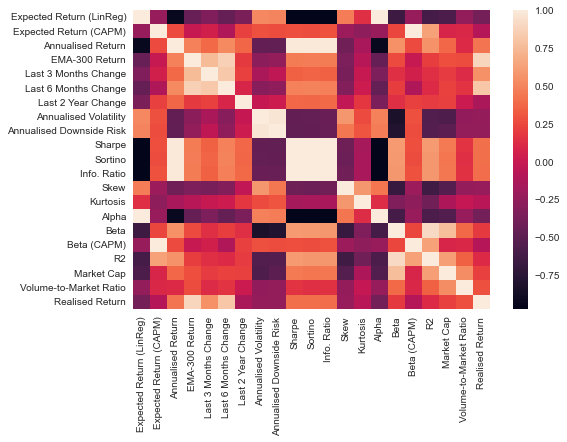

In [160]:
sns.heatmap(assets.corr())

In [161]:
corr=assets.corr()

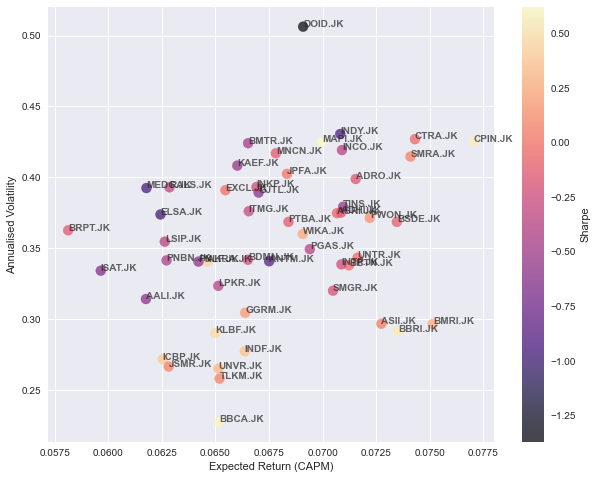

In [162]:
fig, ax = plt.subplots()
X = 'Expected Return (CAPM)'
Y = 'Annualised Volatility'
C = 'Sharpe'
ax= assets.plot.scatter(x=X, y=Y, c=C, 
                                           cmap= 'magma', marker='.', 
                                           s=400, alpha=0.7, grid=True, 
                                           figsize=[10,8], ax=ax)
label_point(assets[X], assets[Y], assets.index.to_series(), ax)

In [163]:
arr_scaled = scaler.fit_transform(assets)
assets_scaled = pd.DataFrame(arr_scaled, columns=assets.columns,index=assets.index)
assets_scaled = assets_scaled.sort_values(by='Annualised Volatility', ascending=False)
assets_scaled

Expected Return (LinReg)  Expected Return (CAPM)  Annualised Return  \
DOID.JK                  1.000000                0.579023           0.000000   
INDY.JK                  0.905080                0.670406           0.311201   
CTRA.JK                  0.520748                0.854490           0.702385   
CPIN.JK                  0.136411                1.000000           0.977401   
MAPI.JK                  0.183275                0.625516           1.000000   
...                           ...                     ...                ...   
ICBP.JK                  0.265391                0.233119           0.833299   
JSMR.JK                  0.418451                0.247864           0.742759   
UNVR.JK                  0.261875                0.370583           0.806670   
TLKM.JK                  0.402015                0.373287           0.742619   
BBCA.JK                  0.000000                0.371752           0.863478   

         EMA-300 Return  Last 3 Months Change  Last 6 Months Change  \
DOID.JK        0.388178              0.173830              0.000000   
INDY.JK        0.445620              0.331019              0.276925   
CTRA.JK        0.660776              0.529160              0.540937   
CPIN.JK        0.809722              1.000000              0.901211   
MAPI.JK        0.764969              0.575879              0.750014   
...                 ...                   ...                   ...   
ICBP.JK        0.747342              0.513412              0.740925   
JSMR.JK        0.598220              0.241547              0.426025   
UNVR.JK        0.662645              0.449185              0.585364   
TLKM.JK        0.689376              0.468843              0.603788   
BBCA.JK        0.798323              0.643003              0.687380   

         Last 2 Year Change  Annualised Volatility  Annualised Downside Risk  \
DOID.JK            0.412003               1.000000                  1.000000   
INDY.JK            0.187893               0.728451                  0.697337   
CTRA.JK            0.426119               0.715465                  0.632161   
CPIN.JK            0.917118               0.709648                  0.728030   
MAPI.JK            0.691125               0.707942                  0.626181   
...                     ...                    ...                       ...   
ICBP.JK            0.609562               0.158554                  0.132561   
JSMR.JK            0.271693               0.140241                  0.037228   
UNVR.JK            0.451630               0.135079                  0.105000   
TLKM.JK            0.451588               0.109821                  0.089094   
BBCA.JK            0.602945               0.000000                  0.000000   

           Sharpe  ...  Info. Ratio      Skew  Kurtosis     Alpha      Beta  \
DOID.JK  0.000000  ...     0.000000  0.755324  0.374308  1.000000  0.000000   
INDY.JK  0.226483  ...     0.222438  0.672304  0.290509  0.908801  0.148068   
CTRA.JK  0.663217  ...     0.661424  0.368213  0.034076  0.502536  0.216725   
CPIN.JK  0.974097  ...     0.973986  0.336815  0.188341  0.094871  0.265367   
MAPI.JK  1.000000  ...     1.000000  1.000000  1.000000  0.136912  0.149423   
...           ...  ...          ...       ...       ...       ...       ...   
ICBP.JK  0.880656  ...     0.859424  0.323688  0.211761  0.248876  0.495774   
JSMR.JK  0.720929  ...     0.697670  0.436594  0.128968  0.415623  0.539495   
UNVR.JK  0.837084  ...     0.814190  0.334225  0.212307  0.255952  0.651275   
TLKM.JK  0.721738  ...     0.696575  0.000000  0.131858  0.409852  0.708905   
BBCA.JK  0.981909  ...     0.950196  0.008922  0.196147  0.000178  1.000000   

         Beta (CAPM)        R2  Market Cap  Volume-to-Market Ratio  \
DOID.JK     0.579023  0.149285    0.000611                0.259366   
INDY.JK     0.670406  0.346985    0.006411                0.105602   
CTRA.JK     0.854490  0.479260    0.020031                0.124771   
CPIN.

In [164]:
cor_target=abs(corr['Realised Return'])
relevant_features = cor_target[cor_target>0.5]
relevant_features

EMA-300 Return          0.885667
Last 3 Months Change    0.545289
Last 6 Months Change    0.807987
Realised Return         1.000000
Name: Realised Return, dtype: float64

## **K-Means Clustering**

No handles with labels found to put in legend.


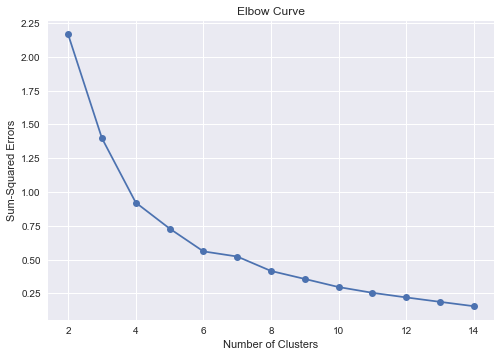

In [165]:
from sklearn.cluster import MiniBatchKMeans

cluster_vars = assets_scaled[['Realised Return','Annualised Volatility']]

X= cluster_vars.values 

max_cluster = 15

sse_cluster = []

for k in range(2, max_cluster):
    kmeans =MiniBatchKMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse_cluster.append(kmeans.inertia_)
    
plt.plot(range(2, max_cluster), sse_cluster, marker ='o')
#plt.plot(5, 1.55, marker='v', c='r', ms=20, label='Ideal Cluster')
plt.title("Elbow Curve")
plt.xlabel('Number of Clusters')
plt.ylabel('Sum-Squared Errors')
plt.legend()
plt.show()

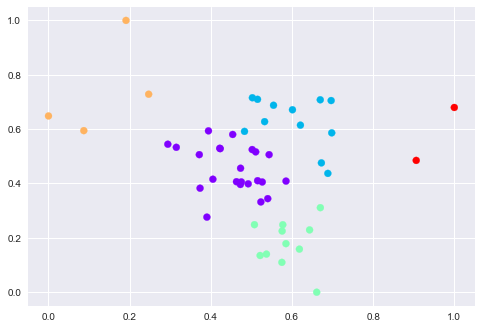

In [166]:
kmeans = MiniBatchKMeans(n_clusters=5, random_state=4567).fit(X)

centroids = kmeans.cluster_centers_

plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

In [167]:
cluster_labels = pd.DataFrame(kmeans.labels_, index= cluster_vars.index, columns=['Cluster Group'])
cluster_labels

Cluster Group
DOID.JK              3
INDY.JK              3
CTRA.JK              1
CPIN.JK              1
MAPI.JK              1
...                ...
ICBP.JK              2
JSMR.JK              2
UNVR.JK              2
TLKM.JK              2
BBCA.JK              2

[52 rows x 1 columns]

In [168]:
assets_cluster = pd.concat([assets, cluster_labels], axis=1)
assets_cluster.sort_values(by='Beta', ascending=False).head(15)

Expected Return (LinReg)  Expected Return (CAPM)  Annualised Return  \
BBCA.JK                 -0.013251                0.065169           0.176005   
BMRI.JK                  0.025660                0.075139           0.121041   
BBRI.JK                 -0.011086                0.073507           0.200512   
ASII.JK                  0.054524                0.072740           0.058546   
TLKM.JK                  0.050888                0.065198           0.060342   
UNVR.JK                  0.028529                0.065147           0.121639   
INDF.JK                  0.021987                0.066373           0.141788   
JSMR.JK                  0.053510                0.062824           0.060476   
SMGR.JK                  0.082495                0.070486          -0.023379   
ICBP.JK                  0.029090                0.062545           0.147124   
KLBF.JK                  0.019522                0.064994           0.179433   
GGRM.JK                  0.048153                0.066387           0.096159   
BBTN.JK                  0.065727                0.071231           0.024977   
INTP.JK                  0.086789                0.070877          -0.043810   
UNTR.JK                  0.063498                0.071632           0.030002   

         EMA-300 Return  Last 3 Months Change  Last 6 Months Change  \
BBCA.JK        0.278587          3.401139e-02              0.046444   
BMRI.JK        0.124496          5.360296e-16             -0.140229   
BBRI.JK        0.214674         -7.308185e-03             -0.063927   
ASII.JK        0.008328         -6.356251e-03             -0.127501   
TLKM.JK       -0.009270         -9.229858e-02             -0.052056   
UNVR.JK       -0.079898         -1.065561e-01             -0.073766   
INDF.JK        0.162975          3.195159e-02              0.123697   
JSMR.JK       -0.250123         -2.571466e-01             -0.261523   
SMGR.JK       -0.133409         -8.695700e-03             -0.090047   
ICBP.JK        0.143887         -5.997515e-02              0.109539   
KLBF.JK        0.085829         -9.381882e-02             -0.069900   
GGRM.JK       -0.247765         -1.145169e-01             -0.225636   
BBTN.JK       -0.156850          8.317757e-02             -0.144039   
INTP.JK       -0.162244          3.541346e-02             -0.030459   
UNTR.JK       -0.319998         -3.421711e-02             -0.400558   

         Last 2 Year Change  Annualised Volatility  Annualised Downside Risk  \
BBCA.JK            0.182466               0.227315                  0.157408   
BMRI.JK           -0.079161               0.296570                  0.193187   
BBRI.JK            0.102243               0.291252                  0.191001   
ASII.JK           -0.045630               0.296634                  0.184894   
TLKM.JK           -0.141660               0.257951                  0.171084   
UNVR.JK           -0.141571               0.264996                  0.173525   
INDF.JK            0.045818               0.277168                  0.174728   
JSMR.JK           -0.526901               0.266436                  0.163122   
SMGR.JK           -0.386623               0.319951                  0.205059   
ICBP.JK            0.196637               0.271545                  0.177756   
KLBF.JK           -0.118340               0.290103                  0.182994   
GGRM.JK           -0.054567               0.304389                  0.188220   
BBTN.JK           -0.619335               0.337872                  0.214886   
INTP.JK           -0.315951               0.338547                  0.224456   
UNTR.JK           -0.156229               0.343291                  0.219569   

           Sharpe  ...      Skew  Kurtosis     Alpha      Beta  Beta (CAPM)  \
BBCA.JK  0.584139  ... -0.108041  0.915175 -0.000169  0.509523     0.717769   
BMRI.JK  0.262399  ...  0.002084  0.732558 -0.000019  0.434512     1.043811   
BBRI.JK  0.540050  ... -0.017239  0.744927 -0.000169  0.427430     0.9904

In [169]:
assets_cluster_scaled = pd.concat([assets_scaled, cluster_labels], axis=1)

In [170]:
kmeans_mean = assets_cluster.groupby(['Cluster Group']).mean()#.sort_values(by='Ann Returns', ascending=False)
kmeans_mean

Expected Return (LinReg)  Expected Return (CAPM)  \
Cluster Group                                                     
0                              0.083923                0.067350   
1                              0.066422                0.069873   
2                              0.033047                0.066854   
3                              0.114634                0.068213   
4                              0.073091                0.062977   

               Annualised Return  EMA-300 Return  Last 3 Months Change  \
Cluster Group                                                            
0                      -0.062140       -0.248682             -0.109667   
1                       0.014849        0.059744             -0.001629   
2                       0.101832        0.100729             -0.031511   
3                      -0.309785       -0.945391             -0.240731   
4                      -0.012246        0.733750              0.141293   

               Last 6 Months Change  Last 2 Year Change  \
Cluster Group                                             
0                         -0.248385           -0.210062   
1                         -0.020838           -0.127495   
2                         -0.023902           -0.072578   
3                         -0.604067           -0.058377   
4                          0.260817           -0.306823   

               Annualised Volatility  Annualised Downside Risk    Sharpe  ...  \
Cluster Group                                                             ...   
0                           0.353480                  0.218722 -0.293928  ...   
1                           0.402374                  0.246482 -0.076709  ...   
2                           0.277641                  0.180246  0.224386  ...   
3                           0.434542                  0.272767 -0.772190  ...   
4                           0.389755                  0.242264 -0.142751  ...   

               Info. Ratio      Skew  Kurtosis     Alpha      Beta  \
Cluster Group                                                        
0                -0.380810  0.176047  0.889262  0.000197  0.233419   
1                -0.153012  0.196400  1.020404  0.000122  0.198149   
2                 0.113469  0.033372  0.853763  0.000005  0.370919   
3                -0.843217  0.304791  1.495291  0.000315  0.161305   
4                -0.221588  0.296998  1.346162  0.000144  0.152981   

               Beta (CAPM)        R2    Market Cap  Volume-to-Market Ratio  \
Cluster Group                                                                
0                 0.789101  0.427163  2.371130e+13                0.006040   
1                 0.871612  0.413667  2.914417e+13                0.006019   
2                 0.772875  0.531660  2.299555e+14                0.011706   
3                 0.817327  0.360912  1.646750e+13                0.004187   
4                 0.646070  0.312773  5.248000e+13                0.011716   

               Realised Return  
Cluster Group                   
0                    -0.198961  
1                     0.133114  
2                     0.100474  
3                    -0.926556  
4                     0.919846  

[5 rows x 21 columns]

In [171]:
# actual_return = pd.DataFrame(columns= ['Actual Return (2020)'])
# for x in kmeans_mean.index:
#     sel = assets_cluster[assets_cluster['Cluster Group'] == x]
#     weights = np.ones(len(sel)) / len(sel)
#     actual_return.loc[x]=ret_2020[sel.index].dot(weights)

In [172]:
# kmeans_mean = kmeans_mean.join(actual_return)

In [173]:
kmeans_mean

Expected Return (LinReg)  Expected Return (CAPM)  \
Cluster Group                                                     
0                              0.083923                0.067350   
1                              0.066422                0.069873   
2                              0.033047                0.066854   
3                              0.114634                0.068213   
4                              0.073091                0.062977   

               Annualised Return  EMA-300 Return  Last 3 Months Change  \
Cluster Group                                                            
0                      -0.062140       -0.248682             -0.109667   
1                       0.014849        0.059744             -0.001629   
2                       0.101832        0.100729             -0.031511   
3                      -0.309785       -0.945391             -0.240731   
4                      -0.012246        0.733750              0.141293   

               Last 6 Months Change  Last 2 Year Change  \
Cluster Group                                             
0                         -0.248385           -0.210062   
1                         -0.020838           -0.127495   
2                         -0.023902           -0.072578   
3                         -0.604067           -0.058377   
4                          0.260817           -0.306823   

               Annualised Volatility  Annualised Downside Risk    Sharpe  ...  \
Cluster Group                                                             ...   
0                           0.353480                  0.218722 -0.293928  ...   
1                           0.402374                  0.246482 -0.076709  ...   
2                           0.277641                  0.180246  0.224386  ...   
3                           0.434542                  0.272767 -0.772190  ...   
4                           0.389755                  0.242264 -0.142751  ...   

               Info. Ratio      Skew  Kurtosis     Alpha      Beta  \
Cluster Group                                                        
0                -0.380810  0.176047  0.889262  0.000197  0.233419   
1                -0.153012  0.196400  1.020404  0.000122  0.198149   
2                 0.113469  0.033372  0.853763  0.000005  0.370919   
3                -0.843217  0.304791  1.495291  0.000315  0.161305   
4                -0.221588  0.296998  1.346162  0.000144  0.152981   

               Beta (CAPM)        R2    Market Cap  Volume-to-Market Ratio  \
Cluster Group                                                                
0                 0.789101  0.427163  2.371130e+13                0.006040   
1                 0.871612  0.413667  2.914417e+13                0.006019   
2                 0.772875  0.531660  2.299555e+14                0.011706   
3                 0.817327  0.360912  1.646750e+13                0.004187   
4                 0.646070  0.312773  5.248000e+13                0.011716   

               Realised Return  
Cluster Group                   
0                    -0.198961  
1                     0.133114  
2                     0.100474  
3                    -0.926556  
4                     0.919846  

[5 rows x 21 columns]

In [174]:
kmeans_scaled = scaler.fit_transform(kmeans_mean)
kmeans_mean_scaled = pd.DataFrame(kmeans_scaled, columns=assets.columns,index=kmeans_mean.index)

In [175]:
kmeans_mean_scaled

Expected Return (LinReg)  Expected Return (CAPM)  \
Cluster Group                                                     
0                              0.623578                0.634168   
1                              0.409076                1.000000   
2                              0.000000                0.562226   
3                              1.000000                0.759317   
4                              0.490824                0.000000   

               Annualised Return  EMA-300 Return  Last 3 Months Change  \
Cluster Group                                                            
0                       0.601640        0.414920              0.343078   
1                       0.788679        0.598601              0.625882   
2                       1.000000        0.623009              0.547662   
3                       0.000000        0.000000              0.000000   
4                       0.722855        1.000000              1.000000   

               Last 6 Months Change  Last 2 Year Change  \
Cluster Group                                             
0                          0.411248            0.389464   
1                          0.674343            0.721800   
2                          0.670801            0.942843   
3                          0.000000            1.000000   
4                          1.000000            0.000000   

               Annualised Volatility  Annualised Downside Risk    Sharpe  ...  \
Cluster Group                                                             ...   
0                           0.483358                  0.415859  0.479905  ...   
1                           0.794979                  0.715905  0.697871  ...   
2                           0.000000                  0.000000  1.000000  ...   
3                           1.000000                  1.000000  0.000000  ...   
4                           0.714556                  0.670310  0.631602  ...   

               Info. Ratio      Skew  Kurtosis     Alpha      Beta  \
Cluster Group                                                        
0                 0.483343  0.525663  0.055335  0.621192  0.369086   
1                 0.721454  0.600650  0.259756  0.378496  0.207252   
2                 1.000000  0.000000  0.000000  0.000000  1.000000   
3                 0.000000  1.000000  1.000000  1.000000  0.038196   
4                 0.649773  0.971286  0.767540  0.450393  0.000000   

               Beta (CAPM)        R2  Market Cap  Volume-to-Market Ratio  \
Cluster Group                                                              
0                 0.634168  0.522597    0.033931                0.246147   
1                 1.000000  0.460939    0.059379                0.243292   
2                 0.562226  1.000000    1.000000                0.998641   
3                 0.759317  0.219926    0.000000                0.000000   
4                 0.000000  0.000000    0.168686                1.000000   

               Realised Return  
Cluster Group                   
0                     0.394061  
1                     0.573911  
2                     0.556233  
3                     0.000000  
4                     1.000000  

[5 rows x 21 columns]

<AxesSubplot:xlabel='Cluster Group'>

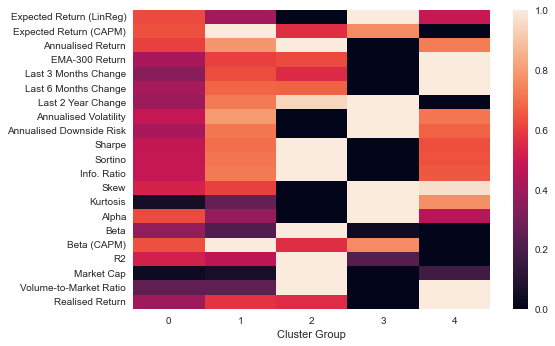

In [176]:
sns.heatmap(kmeans_mean_scaled.T)

In [177]:
cluster_method= assets_cluster
cluster_mean = kmeans_mean
alpha_cluster = cluster_method[cluster_method['Cluster Group'] == cluster_mean['Alpha'].idxmax()]
beta_cluster = cluster_method[cluster_method['Cluster Group'] == cluster_mean['Beta (CAPM)'].idxmax()]
sharpe_cluster = cluster_method[cluster_method['Cluster Group'] == cluster_mean['Sharpe'].idxmax()]

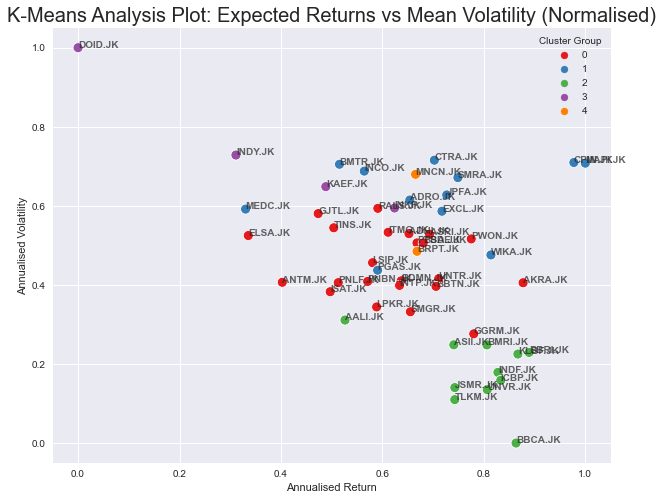

In [178]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']), fontweight='semibold', alpha=0.7)

data_plot=assets_cluster_scaled
X='Annualised Return'
Y='Annualised Volatility'

fig, ax = plt.subplots(figsize = [10,8])
sns.set_style('darkgrid')
ax = sns.scatterplot(x=X, y=Y, 
                data=data_plot, 
                hue='Cluster Group', s=100, 
                palette='Set1')
ax.set_title('K-Means Analysis Plot: Expected Returns vs Mean Volatility (Normalised)', fontsize=20)
label_point(data_plot[X], data_plot[Y],
            data_plot.index.to_series(), ax)

## **PCA Clustering**

In [179]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(assets_scaled)

assets_PCA = pd.DataFrame(data = principalComponents, index=assets_scaled.index,
                          columns = ['Principal Component 1', 'Principal Component 2'])

assets_PCA

Principal Component 1  Principal Component 2
DOID.JK               1.703727              -0.534421
INDY.JK               1.058227              -0.425171
CTRA.JK              -0.065732              -0.525524
CPIN.JK              -0.945213              -0.590984
MAPI.JK              -0.500519              -0.064086
...                        ...                    ...
ICBP.JK              -0.693007               0.520193
JSMR.JK              -0.276471               0.387904
UNVR.JK              -0.706351               0.267544
TLKM.JK              -0.704942               0.302024
BBCA.JK              -1.553053               0.388403

[52 rows x 2 columns]

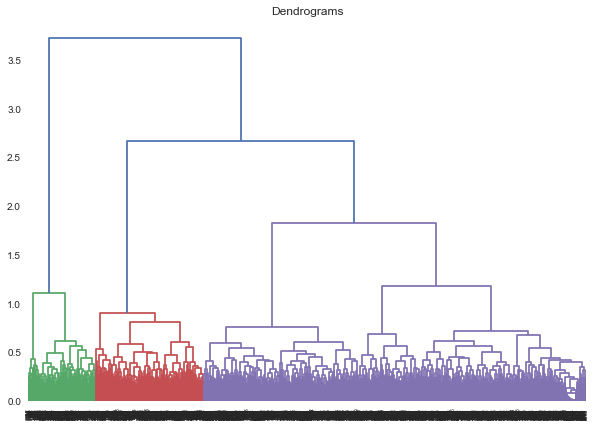

In [233]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(linkage(cond_dist_matrix, method='ward'))

In [181]:
# cluster_vars = assets_PCA

# X = cluster_vars.values 

# max_cluster = 10

# sse = []

# for k in range(2, max_cluster):
#     agg =AgglomerativeClustering(n_clusters = k)
#     agg.fit(X)
    
#     sse.append(agg.inertia_)
    
# plt.plot(range(2, max_cluster), sse, marker ='s')
# plt.title("Elbow Curve")
# plt.show()

In [235]:
X_pca = assets_PCA.values

In [236]:
agg_pca = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_pca)

ValueError: Expected 2D array, got 1D array instead:
array=[0.24067796 0.22807431 0.17914743 ... 0.12981661 0.16695917 0.17281176].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [184]:
cluster_labels_pca = pd.DataFrame(agg_pca.labels_, index= assets_PCA.index, columns=['Cluster Group'])
assets_scaled_cluster_pca = pd.concat([assets_scaled, cluster_labels_pca], axis=1)
assets_scaled_cluster_pca #.sort_values(by='Annualised Returns', ascending=False).head(10)

Expected Return (LinReg)  Expected Return (CAPM)  Annualised Return  \
DOID.JK                  1.000000                0.579023           0.000000   
INDY.JK                  0.905080                0.670406           0.311201   
CTRA.JK                  0.520748                0.854490           0.702385   
CPIN.JK                  0.136411                1.000000           0.977401   
MAPI.JK                  0.183275                0.625516           1.000000   
...                           ...                     ...                ...   
ICBP.JK                  0.265391                0.233119           0.833299   
JSMR.JK                  0.418451                0.247864           0.742759   
UNVR.JK                  0.261875                0.370583           0.806670   
TLKM.JK                  0.402015                0.373287           0.742619   
BBCA.JK                  0.000000                0.371752           0.863478   

         EMA-300 Return  Last 3 Months Change  Last 6 Months Change  \
DOID.JK        0.388178              0.173830              0.000000   
INDY.JK        0.445620              0.331019              0.276925   
CTRA.JK        0.660776              0.529160              0.540937   
CPIN.JK        0.809722              1.000000              0.901211   
MAPI.JK        0.764969              0.575879              0.750014   
...                 ...                   ...                   ...   
ICBP.JK        0.747342              0.513412              0.740925   
JSMR.JK        0.598220              0.241547              0.426025   
UNVR.JK        0.662645              0.449185              0.585364   
TLKM.JK        0.689376              0.468843              0.603788   
BBCA.JK        0.798323              0.643003              0.687380   

         Last 2 Year Change  Annualised Volatility  Annualised Downside Risk  \
DOID.JK            0.412003               1.000000                  1.000000   
INDY.JK            0.187893               0.728451                  0.697337   
CTRA.JK            0.426119               0.715465                  0.632161   
CPIN.JK            0.917118               0.709648                  0.728030   
MAPI.JK            0.691125               0.707942                  0.626181   
...                     ...                    ...                       ...   
ICBP.JK            0.609562               0.158554                  0.132561   
JSMR.JK            0.271693               0.140241                  0.037228   
UNVR.JK            0.451630               0.135079                  0.105000   
TLKM.JK            0.451588               0.109821                  0.089094   
BBCA.JK            0.602945               0.000000                  0.000000   

           Sharpe  ...      Skew  Kurtosis     Alpha      Beta  Beta (CAPM)  \
DOID.JK  0.000000  ...  0.755324  0.374308  1.000000  0.000000     0.579023   
INDY.JK  0.226483  ...  0.672304  0.290509  0.908801  0.148068     0.670406   
CTRA.JK  0.663217  ...  0.368213  0.034076  0.502536  0.216725     0.854490   
CPIN.JK  0.974097  ...  0.336815  0.188341  0.094871  0.265367     1.000000   
MAPI.JK  1.000000  ...  1.000000  1.000000  0.136912  0.149423     0.625516   
...           ...  ...       ...       ...       ...       ...          ...   
ICBP.JK  0.880656  ...  0.323688  0.211761  0.248876  0.495774     0.233119   
JSMR.JK  0.720929  ...  0.436594  0.128968  0.415623  0.539495     0.247864   
UNVR.JK  0.837084  ...  0.334225  0.212307  0.255952  0.651275     0.370583   
TLKM.JK  0.721738  ...  0.000000  0.131858  0.409852  0.708905     0.373287   
BBCA.JK  0.981909  ...  0.008922  0.196147  0.000178  1.000000     0.371752   

               R2  Market Cap  Volume-to-Market Ratio  Realised Return  \
DOID.JK  0.149285    0.000611                0.259366         0.191006   
INDY.JK  0.346985    0.006411                0.105602         0.246820   
CTRA.JK  0.479260    0.020031                0.124771         0

In [185]:
assets_cluster_pca = pd.concat([assets, cluster_labels_pca], axis=1)
assets_cluster_pca

Expected Return (LinReg)  Expected Return (CAPM)  Annualised Return  \
AALI.JK                  0.104140                0.061760          -0.146753   
ADHI.JK                  0.076663                0.070859          -0.026065   
ADRO.JK                  0.077857                0.071545          -0.024453   
AKRA.JK                  0.029522                0.064624           0.189241   
ANTM.JK                  0.136856                0.067507          -0.265073   
...                           ...                     ...                ...   
TINS.JK                  0.110747                0.070958          -0.167969   
TLKM.JK                  0.050888                0.065198           0.060342   
UNTR.JK                  0.063498                0.071632           0.030002   
UNVR.JK                  0.028529                0.065147           0.121639   
WIKA.JK                  0.039758                0.069074           0.128580   

         EMA-300 Return  Last 3 Months Change  Last 6 Months Change  \
AALI.JK        0.428536              0.210881              0.246303   
ADHI.JK       -0.327425             -0.216611             -0.449445   
ADRO.JK        0.266010             -0.047628             -0.100471   
AKRA.JK       -0.122423             -0.111226             -0.169225   
ANTM.JK       -0.332217             -0.262364             -0.328901   
...                 ...                   ...                   ...   
TINS.JK       -0.592683             -0.253600             -0.657207   
TLKM.JK       -0.009270             -0.092299             -0.052056   
UNTR.JK       -0.319998             -0.034217             -0.400558   
UNVR.JK       -0.079898             -0.106556             -0.073766   
WIKA.JK        0.132734             -0.103919             -0.227948   

         Last 2 Year Change  Annualised Volatility  Annualised Downside Risk  \
AALI.JK           -0.272257               0.314085                  0.213005   
ADHI.JK           -0.240460               0.375065                  0.227816   
ADRO.JK           -0.004190               0.398784                  0.250065   
AKRA.JK           -0.426280               0.340430                  0.202918   
ANTM.JK           -0.061146               0.340740                  0.206538   
...                     ...                    ...                       ...   
TINS.JK           -0.080693               0.379207                  0.216739   
TLKM.JK           -0.141660               0.257951                  0.171084   
UNTR.JK           -0.156229               0.343291                  0.219569   
UNVR.JK           -0.141571               0.264996                  0.173525   
WIKA.JK            0.084884               0.360044                  0.209452   

           Sharpe  ...      Skew  Kurtosis     Alpha      Beta  Beta (CAPM)  \
AALI.JK -0.604847  ... -0.014001  1.029300  0.000279  0.224515     0.606277   
ADHI.JK -0.184730  ...  0.246757  1.068937  0.000168  0.234836     0.903837   
ADRO.JK -0.169702  ...  0.067019  0.687610  0.000170  0.212533     0.926279   
AKRA.JK  0.428927  ...  0.200120  0.578811 -0.000026  0.220757     0.699939   
ANTM.JK -0.904777  ...  0.253993  1.103643  0.000415  0.249979     0.794235   
...           ...  ...       ...       ...       ...       ...          ...   
TINS.JK -0.556925  ...  0.395862  0.952198  0.000306  0.230169     0.907095   
TLKM.JK  0.066372  ... -0.113416  0.733443  0.000080  0.396187     0.718719   
UNTR.JK -0.038506  ...  0.012637  0.440446  0.000120  0.288179     0.929116   
UNVR.JK  0.295922  ...  0.087926  0.960856 -0.000014  0.373749     0.717045   
WIKA.JK  0.237080  ...  0.309175  0.747021  0.000018  0.238685     0.845480   

               R2    Market Cap  Volume-to-Market Ratio  Realised Return  \
AALI.JK  0.368390  1.636000e+13                0.000367         0.283707   
ADHI.JK  0.459704  2.920000e+12                0.004496        -0.273038   
ADRO.JK  0.442233  4.318000e+13                0.014482  

<AxesSubplot:>

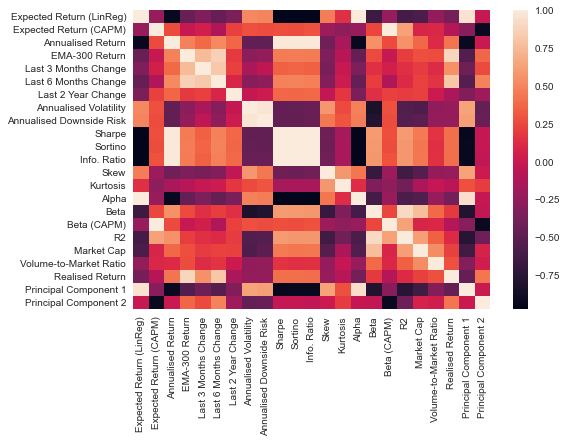

In [186]:
sns.heatmap(assets_scaled_cluster_pca.drop('Cluster Group',axis=1).join(assets_PCA).corr())

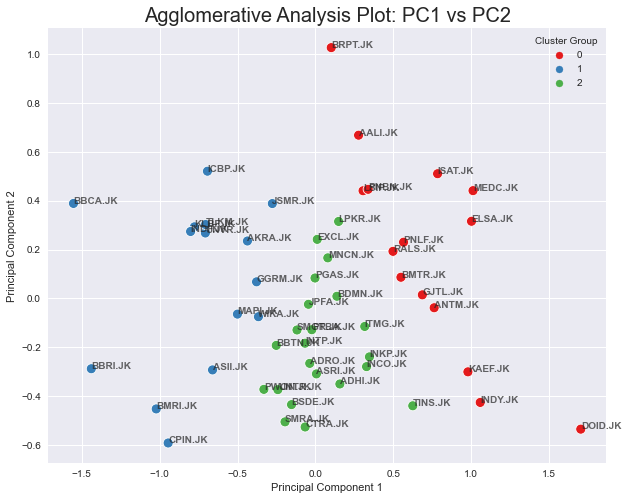

In [187]:
data_plot=assets_PCA.join(cluster_labels_pca)

fig, ax = plt.subplots(figsize = [10,8])
sns.set_style('darkgrid')
ax = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', 
                data=data_plot, hue='Cluster Group', s=100, 
                palette='Set1')
ax.set_title('Agglomerative Analysis Plot: PC1 vs PC2', fontsize=20)
label_point(data_plot['Principal Component 1'], data_plot['Principal Component 2'],
            data_plot.index.to_series(), ax)

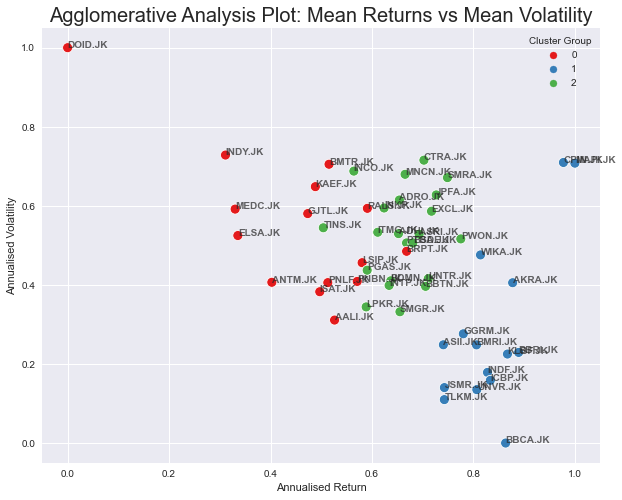

In [188]:
data_plot=assets_scaled_cluster_pca
X= 'Annualised Return'
Y= 'Annualised Volatility'

fig, ax = plt.subplots(figsize = [10,8])
sns.set_style('darkgrid')
ax = sns.scatterplot(x=X, y=Y, 
                data=data_plot, hue='Cluster Group', s=100, 
                palette='Set1')
ax.set_title('Agglomerative Analysis Plot: Mean Returns vs Mean Volatility', fontsize=20)
label_point(data_plot[X], data_plot[Y],
            data_plot.index.to_series(), ax)

In [189]:
cluster_pca_mean = assets_cluster_pca.groupby(['Cluster Group']).mean() #.sort_values(by='Alpha', ascending=False)
cluster_pca_mean

Expected Return (LinReg)  Expected Return (CAPM)  \
Cluster Group                                                     
0                              0.107438                0.064212   
1                              0.026754                0.068050   
2                              0.076483                0.069900   

               Annualised Return  EMA-300 Return  Last 3 Months Change  \
Cluster Group                                                            
0                      -0.216282       -0.294378             -0.108472   
1                       0.151505        0.062746             -0.040593   
2                      -0.019220       -0.124287             -0.060584   

               Last 6 Months Change  Last 2 Year Change  \
Cluster Group                                             
0                         -0.219593           -0.342740   
1                         -0.047558            0.020300   
2                         -0.186964           -0.144104   

               Annualised Volatility  Annualised Downside Risk    Sharpe  ...  \
Cluster Group                                                             ...   
0                           0.380347                  0.234832 -0.663001  ...   
1                           0.306328                  0.192865  0.340117  ...   
2                           0.374098                  0.233238 -0.170164  ...   

               Info. Ratio      Skew  Kurtosis     Alpha      Beta  \
Cluster Group                                                        
0                -0.744545  0.263652  1.190727  0.000287  0.176909   
1                 0.237328  0.108076  0.951917 -0.000025  0.334493   
2                -0.252473  0.136828  0.846505  0.000167  0.232122   

               Beta (CAPM)        R2    Market Cap  Volume-to-Market Ratio  \
Cluster Group                                                                
0                 0.686460  0.344943  1.924267e+13                0.006296   
1                 0.811996  0.512429  1.814860e+14                0.009707   
2                 0.872495  0.447528  2.656818e+13                0.006366   

               Realised Return  
Cluster Group                   
0                    -0.185809  
1                     0.063183  
2                    -0.086394  

[3 rows x 21 columns]

In [190]:
pca_scaled = scaler.fit_transform(cluster_pca_mean)
pca_mean_scaled = pd.DataFrame(pca_scaled, columns=assets.columns,index=cluster_pca_mean.index)

In [191]:
pca_mean_scaled

Expected Return (LinReg)  Expected Return (CAPM)  \
Cluster Group                                                     
0                              1.000000                0.000000   
1                              0.000000                0.674799   
2                              0.616341                1.000000   

               Annualised Return  EMA-300 Return  Last 3 Months Change  \
Cluster Group                                                            
0                       0.000000         0.00000              0.000000   
1                       1.000000         1.00000              1.000000   
2                       0.535803         0.47628              0.705495   

               Last 6 Months Change  Last 2 Year Change  \
Cluster Group                                             
0                          0.000000            0.000000   
1                          1.000000            1.000000   
2                          0.189662            0.547146   

               Annualised Volatility  Annualised Downside Risk    Sharpe  ...  \
Cluster Group                                                             ...   
0                           1.000000                  1.000000  0.000000  ...   
1                           0.000000                  0.000000  1.000000  ...   
2                           0.915568                  0.962002  0.491306  ...   

               Info. Ratio      Skew  Kurtosis     Alpha      Beta  \
Cluster Group                                                        
0                 0.000000  1.000000  1.000000  1.000000  0.000000   
1                 1.000000  0.000000  0.306232  0.000000  1.000000   
2                 0.501156  0.184812  0.000000  0.614509  0.350372   

               Beta (CAPM)        R2  Market Cap  Volume-to-Market Ratio  \
Cluster Group                                                              
0                 0.000000  0.000000    0.000000                0.000000   
1                 0.674799  1.000000    1.000000                1.000000   
2                 1.000000  0.612497    0.045151                0.020446   

               Realised Return  
Cluster Group                   
0                     0.000000  
1                     1.000000  
2                     0.399271  

[3 rows x 21 columns]

In [192]:
assets_scaled_cluster_pca.groupby(['Cluster Group']).var()

Expected Return (LinReg)  Expected Return (CAPM)  \
Cluster Group                                                     
0                              0.016619                0.034722   
1                              0.017594                0.059224   
2                              0.006992                0.020012   

               Annualised Return  EMA-300 Return  Last 3 Months Change  \
Cluster Group                                                            
0                       0.026335        0.051136              0.068948   
1                       0.006073        0.004394              0.026923   
2                       0.004065        0.011636              0.026067   

               Last 6 Months Change  Last 2 Year Change  \
Cluster Group                                             
0                          0.070529            0.030144   
1                          0.018107            0.023047   
2                          0.035310            0.041806   

               Annualised Volatility  Annualised Downside Risk    Sharpe  ...  \
Cluster Group                                                             ...   
0                           0.030907                  0.035507  0.025057  ...   
1                           0.043012                  0.041260  0.009685  ...   
2                           0.012937                  0.012421  0.006835  ...   

               Info. Ratio      Skew  Kurtosis     Alpha      Beta  \
Cluster Group                                                        
0                 0.024685  0.032148  0.011588  0.019234  0.008209   
1                 0.010379  0.064269  0.051613  0.019394  0.056958   
2                 0.007076  0.025908  0.013379  0.008117  0.011428   

               Beta (CAPM)        R2  Market Cap  Volume-to-Market Ratio  \
Cluster Group                                                              
0                 0.034722  0.013114    0.001060                0.020478   
1                 0.059224  0.044544    0.074061                0.079645   
2                 0.020012  0.015549    0.000527                0.029025   

               Realised Return  
Cluster Group                   
0                     0.047049  
1                     0.005801  
2                     0.030611  

[3 rows x 21 columns]

In [193]:
# actual_return = pd.DataFrame(columns= ['Actual Return (2020)'])
# for x in cluster_pca_mean.index:
#     sel = assets_scaled_cluster_pca[assets_scaled_cluster_pca['Cluster Group'] == x]
#     weights = np.ones(len(sel)) / len(sel)
#     actual_return.loc[x]=ret_2020[sel.index].dot(weights)

In [194]:
# actual_return_sort=actual_return.sort_values(by='Actual Return (2020)', ascending=False)
# actual_return_sort

In [195]:
pca_cluster_mean = pca_mean_scaled#.join(actual_return)#.sort_values(by='Alpha', ascending=False)
pca_cluster_mean

Expected Return (LinReg)  Expected Return (CAPM)  \
Cluster Group                                                     
0                              1.000000                0.000000   
1                              0.000000                0.674799   
2                              0.616341                1.000000   

               Annualised Return  EMA-300 Return  Last 3 Months Change  \
Cluster Group                                                            
0                       0.000000         0.00000              0.000000   
1                       1.000000         1.00000              1.000000   
2                       0.535803         0.47628              0.705495   

               Last 6 Months Change  Last 2 Year Change  \
Cluster Group                                             
0                          0.000000            0.000000   
1                          1.000000            1.000000   
2                          0.189662            0.547146   

               Annualised Volatility  Annualised Downside Risk    Sharpe  ...  \
Cluster Group                                                             ...   
0                           1.000000                  1.000000  0.000000  ...   
1                           0.000000                  0.000000  1.000000  ...   
2                           0.915568                  0.962002  0.491306  ...   

               Info. Ratio      Skew  Kurtosis     Alpha      Beta  \
Cluster Group                                                        
0                 0.000000  1.000000  1.000000  1.000000  0.000000   
1                 1.000000  0.000000  0.306232  0.000000  1.000000   
2                 0.501156  0.184812  0.000000  0.614509  0.350372   

               Beta (CAPM)        R2  Market Cap  Volume-to-Market Ratio  \
Cluster Group                                                              
0                 0.000000  0.000000    0.000000                0.000000   
1                 0.674799  1.000000    1.000000                1.000000   
2                 1.000000  0.612497    0.045151                0.020446   

               Realised Return  
Cluster Group                   
0                     0.000000  
1                     1.000000  
2                     0.399271  

[3 rows x 21 columns]

<AxesSubplot:xlabel='Cluster Group'>

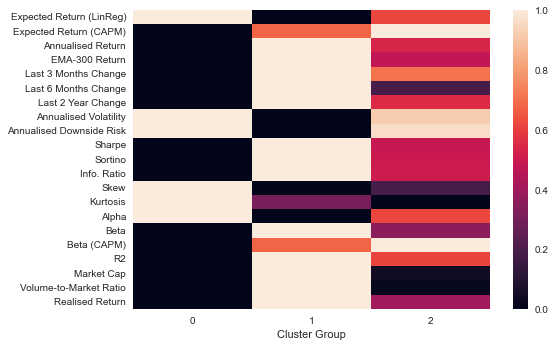

In [196]:
sns.heatmap(pca_cluster_mean.T)

<AxesSubplot:>

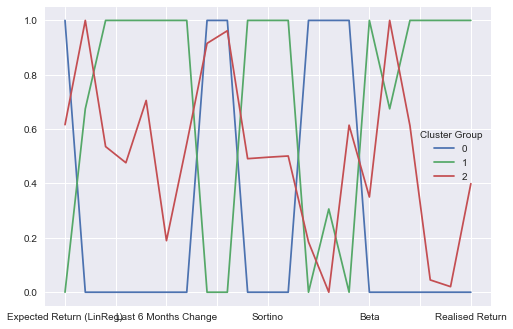

In [197]:
pca_cluster_mean.T.plot()

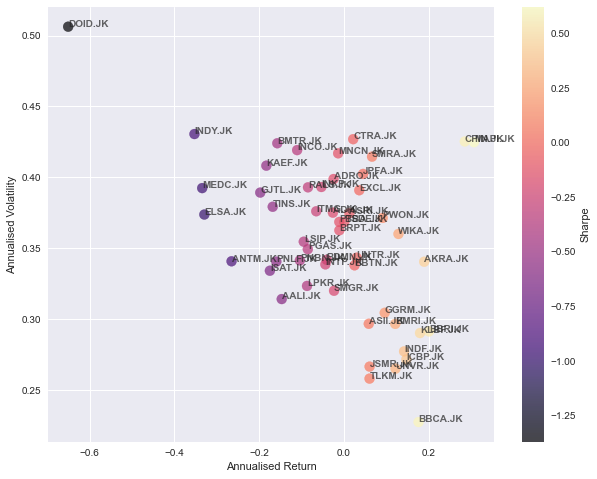

In [198]:
fig, ax = plt.subplots()
data_plot = assets_cluster_pca
X = 'Annualised Return'
Y = 'Annualised Volatility'
C = 'Sharpe'
ax= data_plot.plot.scatter(x=X, y=Y, c=C, 
                                           cmap= 'magma', marker='.', 
                                           s=400, alpha=0.7, grid=True, 
                                           figsize=[10,8], ax=ax)
label_point(data_plot[X], data_plot[Y], assets.index.to_series(), ax)

In [199]:
cluster_method= assets_cluster_pca
cluster_mean = pca_cluster_mean
alpha_pca_cluster = cluster_method[cluster_method['Cluster Group'] == cluster_mean['Alpha'].idxmax()]
beta_pca_cluster = cluster_method[cluster_method['Cluster Group'] == cluster_mean['Beta (CAPM)'].idxmax()]
sharpe_pca_cluster = cluster_method[cluster_method['Cluster Group'] == cluster_mean['Sharpe'].idxmax()]

# **Optimisation**

In [200]:
rng = np.random.default_rng(seed=4567)

class ReturnRes:
    def __init__(self, port, weights):
        self.port = port
        self.weights = weights
        
def monte_carlo_optimise (_assets, num_port):
    rf_rate = rate_bond.mean()  # Average risk-free rate in Indonesia from average return of gov't bonds
    assets_sel = _assets
    ret_assets = ret[assets_sel.index]
    mean_ret = ret_assets.ewm(span=300).mean().iloc[-1]
    exp_ret_assets = assets_sel['EMA-300 Return']
    _real_ret = real_ret[assets_sel.index]
    ewm_cov = ret_assets.ewm(span=300).cov()
    cov = ewm_cov.loc[ewm_cov.index.levels[0][-1]]
    semicov = ret_assets[ret_assets < 0].cov()
    num_assets = len(assets_sel.index)
    num_portfolios = num_port
    beta_assets = assets_sel['Beta']
    alpha_assets = assets_sel['Alpha']
    rand_weights = rng.random((num_portfolios, num_assets))
    _weights = pd.DataFrame((rand_weights.T / rand_weights.sum(axis=1)).T, columns=assets_sel.index)
    p_ret =mean_ret.dot(_weights.T)*252
    p_real_ret = _weights.dot(_real_ret)
    p_exp_ret = _weights.dot(exp_ret_assets)
    p_vol =_weights.apply(lambda row: np.sqrt(row.T@cov@row), axis=1)
    p_dsrisk =_weights.apply(lambda row: row.dot(semicov.dot(row.T))**0.5, axis=1)
    p_premium =p_ret - rf_rate
    p_sharpe =p_premium / (p_vol*np.sqrt(252))
    p_sortino =p_premium / (p_dsrisk*np.sqrt(252))
    p_beta =_weights.dot(beta_assets)
    p_alpha =_weights.dot(alpha_assets)
    p_weights = _weights.copy()
    p_weights.columns = pd.MultiIndex.from_product([_weights, ['Weights']])
    port_metrics = pd.DataFrame({'Annualised Return':p_ret,'Expected Return':p_exp_ret, 'Realised Return':p_real_ret, 'Volatility':p_vol, 
                                    'Downside Risk' : p_dsrisk, 'Market Risk Premium':p_premium, 
                                    'Sharpe' :p_sharpe, 'Sortino': p_sortino, 'Weighted Alpha': p_alpha,
                                    'Weighted Beta':p_beta})
    portfolios = port_metrics.copy()
    portfolios[p_weights.columns]  = p_weights
    
    return ReturnRes(port=portfolios, weights=_weights)

def equal_weights_port (_assets):
    rf_rate = rate_bond.mean()  # Average risk-free rate in Indonesia from average return of gov't bonds
    assets_sel = _assets
    ret_assets = ret[assets_sel.index]
    mean_ret = ret_assets.ewm(span=300).mean().iloc[-1]
    exp_ret_assets = assets_sel['EMA-300 Return']
    _real_ret = real_ret[assets_sel.index]
    ewm_cov = ret_assets.ewm(span=300).cov()
    cov = ewm_cov.loc[ewm_cov.index.levels[0][-1]]
    semicov = ret_assets[ret_assets < 0].cov()
    num_assets = len(assets_sel.index)
    beta_assets = assets_sel['Beta']
    alpha_assets = assets_sel['Alpha']
    test_weights_equal = np.ones(num_assets)*(1/num_assets)
    _weights = pd.Series(test_weights_equal, index=assets_sel.index)
    p_ret =mean_ret.dot(_weights)*252
    p_real_ret = _real_ret.dot(_weights)
    p_exp_ret = exp_ret_assets.dot(_weights)
    p_vol =_weights.T.dot(cov.dot(_weights))**0.5
    p_dsrisk =_weights.T.dot(semicov.dot(_weights))**0.5
    p_premium =p_ret - rf_rate
    p_sharpe =p_premium / (p_vol*np.sqrt(252))
    p_sortino =p_premium / (p_dsrisk*np.sqrt(252))
    p_beta =_weights.T.dot(beta_assets)
    p_alpha =_weights.T.dot(alpha_assets)
    #p_weights = _weights.copy()
    port_metrics = pd.Series({'Annualised Return':p_ret,'Expected Return':p_exp_ret, 'Realised Return':p_real_ret, 'Volatility':p_vol, 
                                    'Downside Risk' : p_dsrisk, 'Market Risk Premium':p_premium, 
                                    'Sharpe' :p_sharpe, 'Sortino': p_sortino, 'Weighted Alpha': p_alpha,
                                    'Weighted Beta':p_beta, 'Stocks':'Weights'})
    portfolios = port_metrics.copy()
    #portfolios=portfolios.append(_weights)
    
    return ReturnRes(port=portfolios, weights=_weights)

def min_volatility(portfolios):
    port = portfolios.port
    w = portfolios.weights
    idx=port['Volatility'].idxmin()
    return ReturnRes(port=port.iloc[idx], 
                     weights=w.iloc[idx])

def optimal_risk(portfolios):
    port = portfolios.port
    w = portfolios.weights
    idx = port['Sharpe'].idxmax()
    return ReturnRes(port=port.iloc[idx], 
                     weights=w.iloc[idx])

def high_alpha(portfolios):
    port = portfolios.port
    w = portfolios.weights
    idx = port['Weighted Alpha'].idxmax()
    return ReturnRes(port=port.iloc[idx], 
                        weights=w.loc[idx])

def plot_summarise(portfolios, Y ='Annualised Return', X = 'Volatility', plot_opt=True, plot_min=False, plot_alpha=False):
    portfolio = portfolios.port
    plt.subplots(figsize=(10, 8))
    plt.scatter(portfolio[X], portfolio[Y], c= portfolio['Sharpe'],cmap='magma', marker='.', s=10, alpha=0.3)
    plt.colorbar().set_label('Sharpe')
    plt.xlabel(X)
    plt.ylabel(Y)
    
    if plot_opt==True:
        optimal_risky_port=optimal_risk(portfolios).port
        plt.scatter(optimal_risky_port[X], optimal_risky_port[Y], color='g', marker='.', s=500, label = 'Optimal Risky Portfolio - Maximum Sharpe Ratio')
    if plot_min==True:
        min_vol_port =min_volatility(portfolios).port
        plt.scatter(min_vol_port[X], min_vol_port[Y], color='r', marker='.', s=500, label= 'Minimum Volatility Portfolio')
    if plot_alpha==True:
        high_alpha_port = high_alpha(portfolios).port
        plt.scatter(high_alpha_port[X], high_alpha_port[Y], color='b', marker='.', s=500, label = 'High Alpha - Maximum Alpha')
    else:
        pass
    
    plt.legend(labelspacing=0.8, loc='lower left')
    plt.show()
    
def print_port(portfolios):
    portfolio = portfolios.port
    min_vol_port =min_volatility(portfolios).port
    optimal_risky_port=optimal_risk(portfolios).port
    high_alpha_port = high_alpha(portfolios).port
    print('-'*10)
    print('Optimally Risky Portfolio')
    print('-'*10)
    print(optimal_risky_port)
    print('-'*10)
    print('-'*10)
    print('Minimal Risk Portfolio')
    print('-'*10)
    print(min_vol_port)
    print('-'*10)
    print('-'*10)
    print('High Alpha Portfolio')
    print('-'*10)
    print(high_alpha_port)
    print('-'*10)

In [201]:
rand_assets = alpha_pca_cluster
num_port=50000

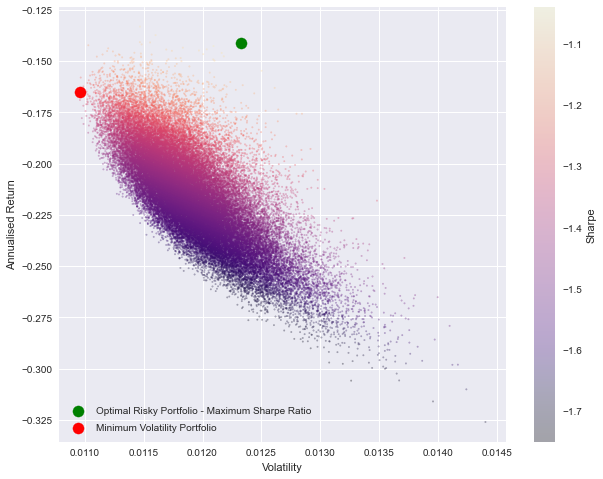

In [202]:
ran_port = monte_carlo_optimise(rand_assets,50000)
ran_port.port
plot_summarise(ran_port, plot_min=True)

# **Testing 2020-2021**

In [203]:
from scipy.stats import norm

def backtest(portfolios, num_port=500000, initial_inv=1000000000, weights_equal=False):
    pd.options.display.max_rows = None
     
    if weights_equal==True:
        _port = equal_weights_port(portfolios)
        test_weights=_port.weights.values
        _weights=test_weights
    else:
        rand_portfolios = monte_carlo_optimise(portfolios, num_port)
        optimal_risk_port = optimal_risk(rand_portfolios)
        _port = optimal_risk_port
        test_weights = _port.weights.values
        _weights = test_weights
        plot_summarise(rand_portfolios,plot_min=True)
        
    display(_port.port)
    display(_port.weights)
    _port_assets = portfolios
    _num_assets = len(_port_assets)
    test_year = '2020' #Training year + 1 year
    
    # Get price data
    port_close_price = close_price_all[_port_assets.index]
    test_close=port_close_price[test_year:]
    test_ret = (test_close.iloc[-1] / test_close.iloc[0]) - 1
    test_ret_pct = test_ret
    ret_port_asset=log_rate(port_close_price)
    
    # Get unweighted mean and cov
    mean_ret_port=ret_port_asset.mean()
    cov_ret_port =ret_port_asset.cov()
    
    # Calculate returns
    holding_ret_port = np.dot(test_ret_pct, _weights)
    log_rets = log_rate(test_close).dot(_weights)
    port_cum = log_rets.sum()
    log_rets_cum = log_rets.cumsum().ffill()
    max_drawdown = log_rets_cum.min()
    
    # Get monthly and yearly returns
    mon_rets = log_rets.resample('M').sum()
    quarter_rets = log_rets.resample('Q').sum()
    quarter_rets.index = quarter_rets.index.strftime('%m/%Y')
    mon_rets.index = mon_rets.index.strftime('%m/%Y')
    
    # Get weighted mean and cov
    mean_port = mean_ret_port.dot(_weights)
    stdev_port = np.sqrt(test_weights.T.dot(cov_ret_port).dot(_weights))
    
    # Calculate statitics
    volatility = stdev_port*np.sqrt(252)
    sharpe = (mean_port*252) / (volatility)
    skew = log_rets.skew(axis=0)
    kurt = log_rets.kurt(axis=0)
    
    investment = initial_inv
    mean_investment = (1+mean_port)*investment
    stdev_investment = stdev_port*investment
    conf = 0.05
    conf2 = 0.01
    conf3 = 0.005
    cutoff1 = norm.ppf(conf, mean_port, stdev_port)
    cutoff2 = norm.ppf(conf2, mean_port, stdev_port)
    cutoff3 = norm.ppf(conf3, mean_port, stdev_port)
    vard1_1 = cutoff1 #-(investment - cutoff1)
    vard1_2 = cutoff2 #-(investment - cutoff2)
    vard1_3 = cutoff3 #-(investment - cutoff3)
    hist_vard1_1=log_rets.sort_values(ascending=True).quantile(q=0.05)#*investment
    hist_vard1_2=log_rets.sort_values(ascending=True).quantile(q=0.01)#*investment
    hist_vard1_3=log_rets.sort_values(ascending=True).quantile(q=0.005)#*investment
    res=pd.Series({'Holding Return': holding_ret_port, 'Cumulative Return': port_cum, 'Annualised Volatility': volatility, 'Max Drawdown':max_drawdown, 'Sharpe': sharpe, 'Skew': skew, 'Kurtosis':kurt,  
                   'Parametric 1-day Value-at-Risk (95% C.L.)': vard1_1, 'Parametric 1-day Value-at-Risk (99% C.L.)': vard1_2, 'Parametric 1-day Value-at-Risk (99.5% C.L.)': vard1_3,
                   'Historical 1-day Value-at-Risk (95% C.L.)': hist_vard1_1, 'Historical 1-day Value-at-Risk (99% C.L.)': hist_vard1_2, 'Historical 1-day Value-at-Risk (99.5% C.L.)': hist_vard1_3})
    fig1, ax1 = plt.subplots(2, 1, figsize=(12,10))
    log_rets.plot(kind='hist', bins=50, title='Portfolio Return Distribution', ax=ax1[0])
    log_rets.plot(kind='kde', title='Portfolio Return Density', ax=ax1[1])
    fig2, ax2 = plt.subplots(1,2,figsize=(12,5))
    mon_rets.plot(kind='barh', ax=ax2[0], title= 'Monthly Returns')
    quarter_rets.plot(kind='barh', ax=ax2[1], title= 'Quarterly Returns')
    fig3, ax3 = plt.subplots(figsize=(12,5))
    df = log_rets_cum
    df.plot(title='Cumulative Rate of Return on Portfolio', ax=ax3)
    plt.fill_between(df.index, 0, df.values, where=df<0, interpolate=True, color='r')
    plt.fill_between(df.index, 0, df.values, where=df>0, interpolate=True, color='g')
    plt.show()
    display(res.apply(lambda x: '%.3f' % x))

In [234]:
raise UserWarning('Early Exit: Remove to Continue to Simulation')

UserWarning: Early Exit: Remove to Continue to Simulation

## **Random Assets Portfolio + Equal Weights**

In [205]:
rand_assets_5 = assets.sample(n=5)
rand_assets_10 = assets.sample(n=10)
rand_assets_15 = assets.sample(n=15)

Annualised Return     -0.098762
Expected Return        -0.63588
Realised Return       -0.622251
Volatility             0.014727
Downside Risk          0.010155
Market Risk Premium   -0.161364
Sharpe                -0.690225
Sortino               -1.000963
Weighted Alpha         0.000194
Weighted Beta          0.238878
Stocks                  Weights
dtype: object

ADHI.JK    0.2
BMRI.JK    0.2
INDY.JK    0.2
KAEF.JK    0.2
INKP.JK    0.2
dtype: float64

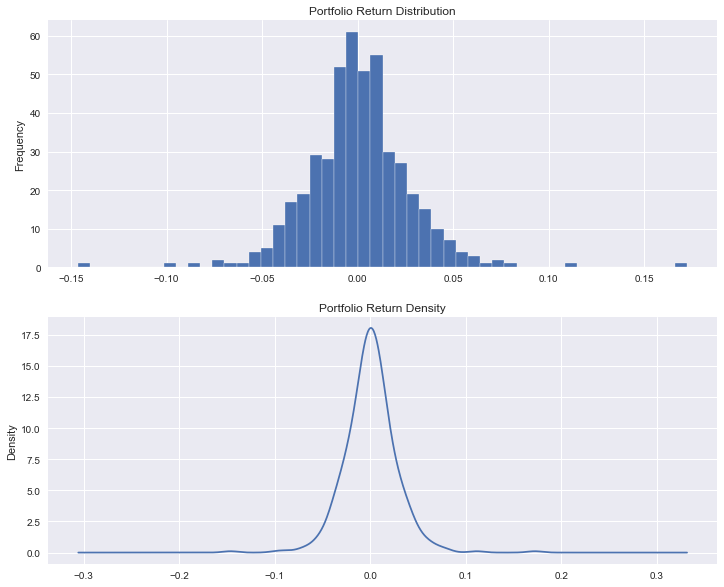

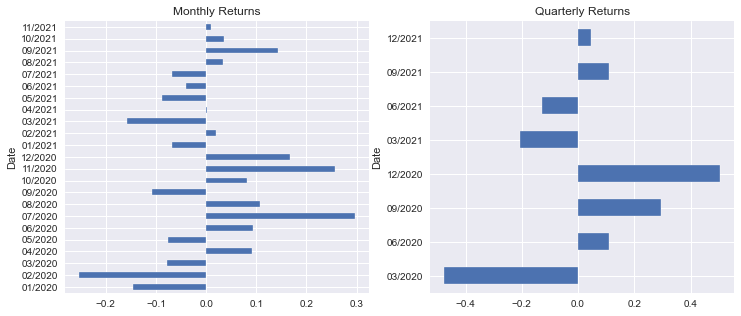

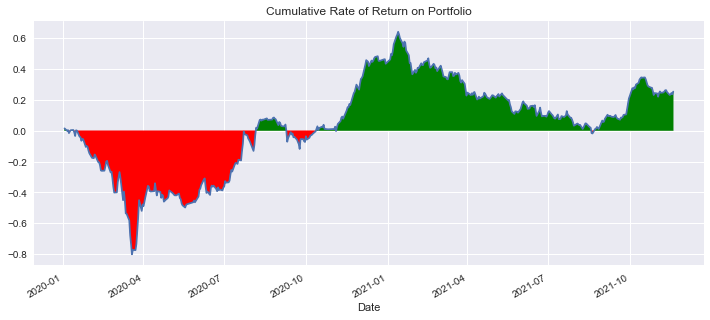

Holding Return                                  0.335
Cumulative Return                               0.253
Annualised Volatility                           0.306
Max Drawdown                                   -0.800
Sharpe                                          0.433
Skew                                            0.274
Kurtosis                                        5.542
Parametric 1-day Value-at-Risk (95% C.L.)      -0.031
Parametric 1-day Value-at-Risk (99% C.L.)      -0.044
Parametric 1-day Value-at-Risk (99.5% C.L.)    -0.049
Historical 1-day Value-at-Risk (95% C.L.)      -0.039
Historical 1-day Value-at-Risk (99% C.L.)      -0.068
Historical 1-day Value-at-Risk (99.5% C.L.)    -0.082
dtype: object

In [206]:
backtest(rand_assets_5, weights_equal=True)

Annualised Return     -0.066767
Expected Return       -0.075679
Realised Return       -0.101866
Volatility             0.011794
Downside Risk          0.008126
Market Risk Premium   -0.129369
Sharpe                -0.690962
Sortino               -1.002884
Weighted Alpha         0.000167
Weighted Beta          0.248245
Stocks                  Weights
dtype: object

BBCA.JK    0.1
CTRA.JK    0.1
BDMN.JK    0.1
INDY.JK    0.1
BRPT.JK    0.1
SMGR.JK    0.1
INKP.JK    0.1
INDF.JK    0.1
ELSA.JK    0.1
GJTL.JK    0.1
dtype: float64

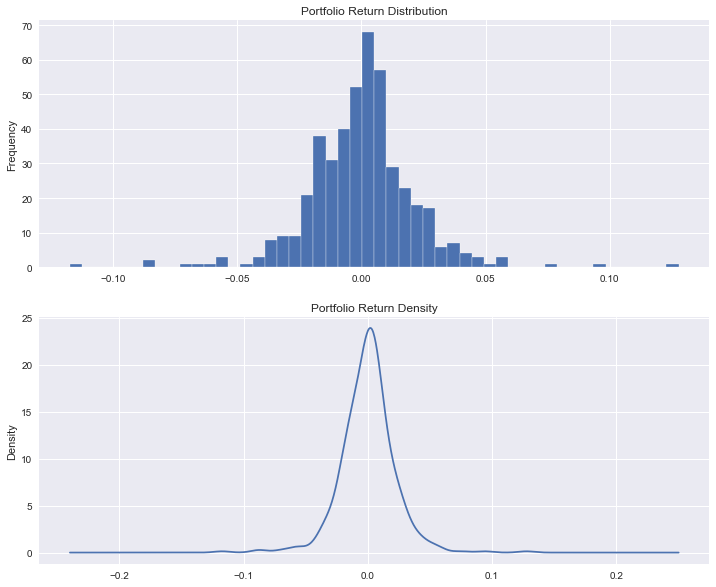

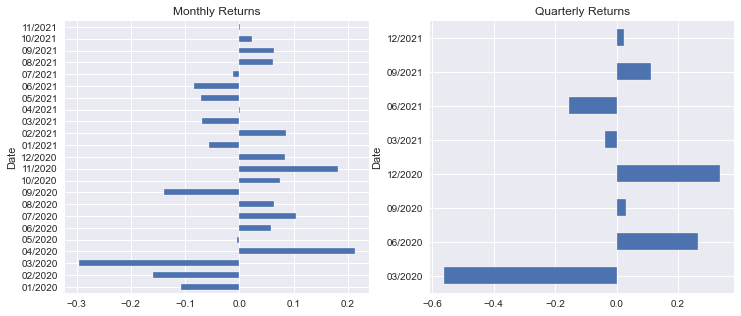

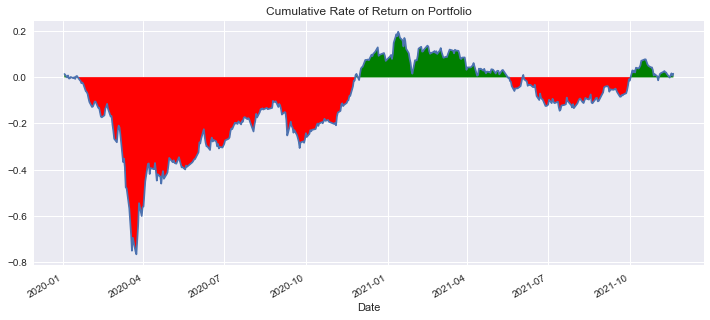

Holding Return                                  0.047
Cumulative Return                               0.015
Annualised Volatility                           0.247
Max Drawdown                                   -0.767
Sharpe                                          0.337
Skew                                           -0.001
Kurtosis                                        5.758
Parametric 1-day Value-at-Risk (95% C.L.)      -0.025
Parametric 1-day Value-at-Risk (99% C.L.)      -0.036
Parametric 1-day Value-at-Risk (99.5% C.L.)    -0.040
Historical 1-day Value-at-Risk (95% C.L.)      -0.033
Historical 1-day Value-at-Risk (99% C.L.)      -0.062
Historical 1-day Value-at-Risk (99.5% C.L.)    -0.083
dtype: object

In [207]:
backtest(rand_assets_10, weights_equal=True)

Annualised Return     -0.000283
Expected Return       -0.235513
Realised Return       -0.152026
Volatility             0.011123
Downside Risk          0.007177
Market Risk Premium   -0.062885
Sharpe                -0.356138
Sortino               -0.551949
Weighted Alpha         0.000114
Weighted Beta          0.269053
Stocks                  Weights
dtype: object

INDF.JK    0.066667
RALS.JK    0.066667
LSIP.JK    0.066667
BBRI.JK    0.066667
BBCA.JK    0.066667
TINS.JK    0.066667
BRPT.JK    0.066667
ASRI.JK    0.066667
KAEF.JK    0.066667
ISAT.JK    0.066667
ADHI.JK    0.066667
PWON.JK    0.066667
BBTN.JK    0.066667
TLKM.JK    0.066667
UNTR.JK    0.066667
dtype: float64

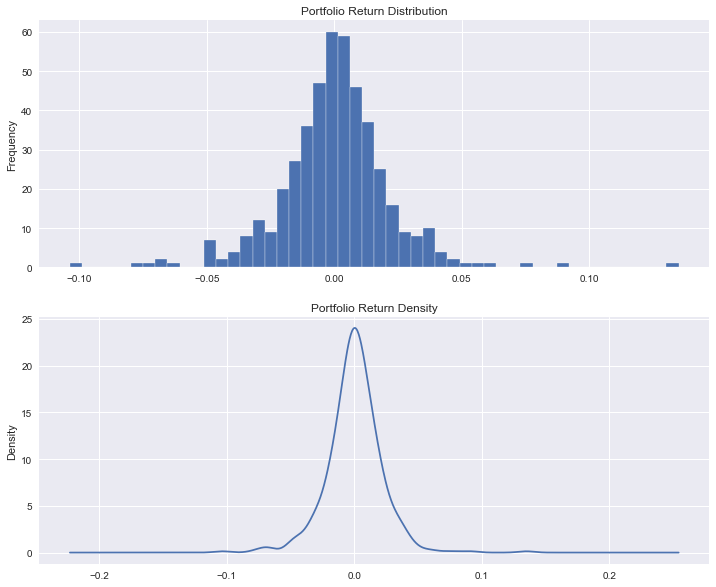

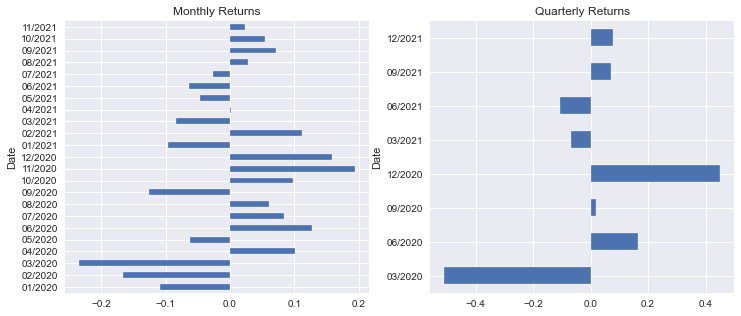

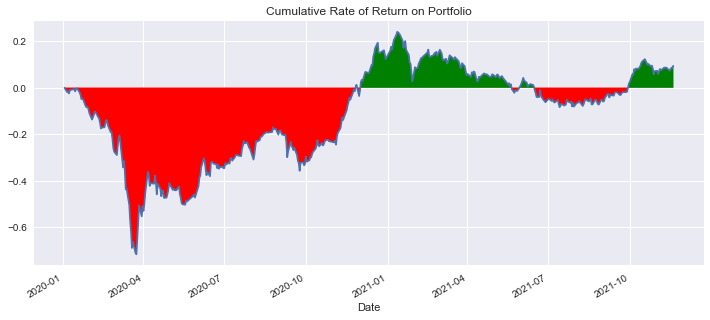

Holding Return                                  0.178
Cumulative Return                               0.095
Annualised Volatility                           0.233
Max Drawdown                                   -0.718
Sharpe                                          0.448
Skew                                            0.186
Kurtosis                                        5.488
Parametric 1-day Value-at-Risk (95% C.L.)      -0.024
Parametric 1-day Value-at-Risk (99% C.L.)      -0.034
Parametric 1-day Value-at-Risk (99.5% C.L.)    -0.037
Historical 1-day Value-at-Risk (95% C.L.)      -0.033
Historical 1-day Value-at-Risk (99% C.L.)      -0.066
Historical 1-day Value-at-Risk (99.5% C.L.)    -0.070
dtype: object

In [208]:
backtest(rand_assets_15, weights_equal=True)

## **Random Assets Portfolio + Optimised**

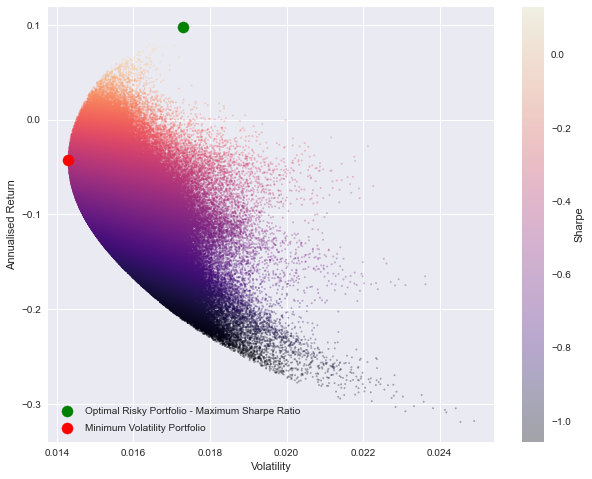

Annualised Return      0.098168
Expected Return        0.029766
Realised Return       -0.031160
Volatility             0.017287
Downside Risk          0.011372
Market Risk Premium    0.035566
Sharpe                 0.129602
Sortino                0.197006
Weighted Alpha         0.000006
Weighted Beta          0.405726
(ADHI.JK, Weights)     0.040007
(BMRI.JK, Weights)     0.878790
(INDY.JK, Weights)     0.000915
(KAEF.JK, Weights)     0.019733
(INKP.JK, Weights)     0.060555
Name: 378830, dtype: float64

ADHI.JK    0.040007
BMRI.JK    0.878790
INDY.JK    0.000915
KAEF.JK    0.019733
INKP.JK    0.060555
Name: 378830, dtype: float64

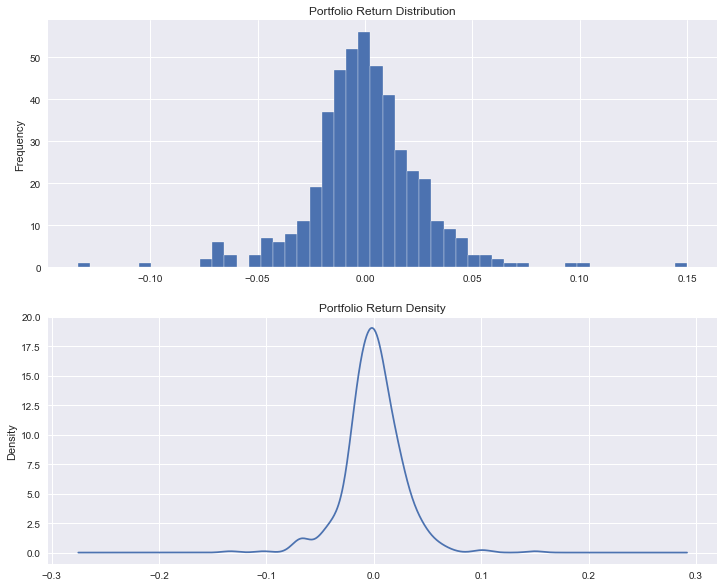

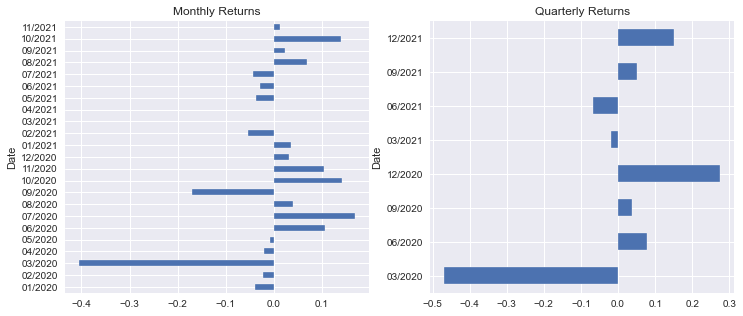

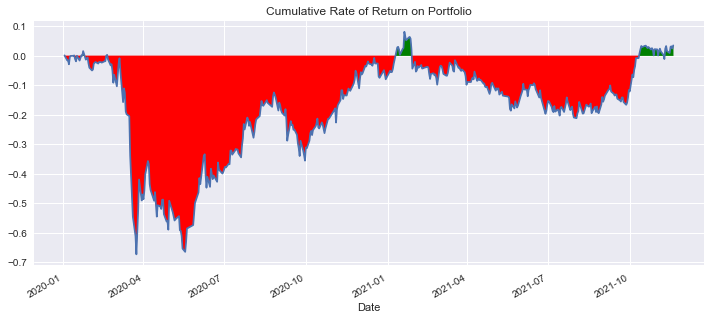

Holding Return                                  0.042
Cumulative Return                               0.035
Annualised Volatility                           0.321
Max Drawdown                                   -0.672
Sharpe                                          0.394
Skew                                            0.061
Kurtosis                                        4.723
Parametric 1-day Value-at-Risk (95% C.L.)      -0.033
Parametric 1-day Value-at-Risk (99% C.L.)      -0.047
Parametric 1-day Value-at-Risk (99.5% C.L.)    -0.052
Historical 1-day Value-at-Risk (95% C.L.)      -0.043
Historical 1-day Value-at-Risk (99% C.L.)      -0.070
Historical 1-day Value-at-Risk (99.5% C.L.)    -0.072
dtype: object

In [209]:
backtest(rand_assets_5)

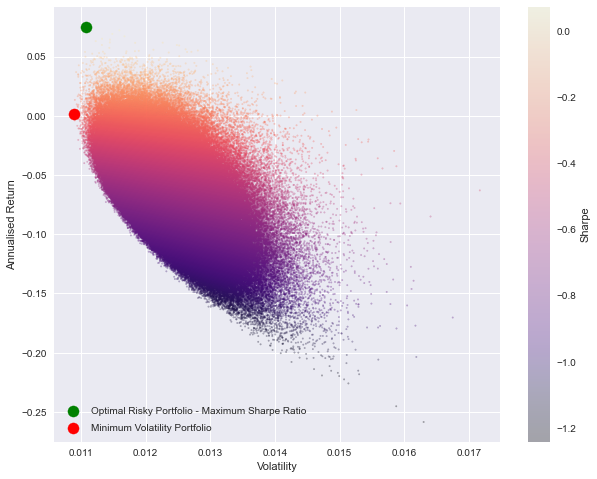

Annualised Return      0.075322
Expected Return        0.155288
Realised Return        0.151936
Volatility             0.011079
Downside Risk          0.007748
Market Risk Premium    0.012721
Sharpe                 0.072327
Sortino                0.103423
Weighted Alpha        -0.000001
Weighted Beta          0.361930
(BBCA.JK, Weights)     0.399080
(CTRA.JK, Weights)     0.066662
(BDMN.JK, Weights)     0.102635
(INDY.JK, Weights)     0.007450
(BRPT.JK, Weights)     0.076646
(SMGR.JK, Weights)     0.041028
(INKP.JK, Weights)     0.006065
(INDF.JK, Weights)     0.226243
(ELSA.JK, Weights)     0.037093
(GJTL.JK, Weights)     0.037099
Name: 478526, dtype: float64

BBCA.JK    0.399080
CTRA.JK    0.066662
BDMN.JK    0.102635
INDY.JK    0.007450
BRPT.JK    0.076646
SMGR.JK    0.041028
INKP.JK    0.006065
INDF.JK    0.226243
ELSA.JK    0.037093
GJTL.JK    0.037099
Name: 478526, dtype: float64

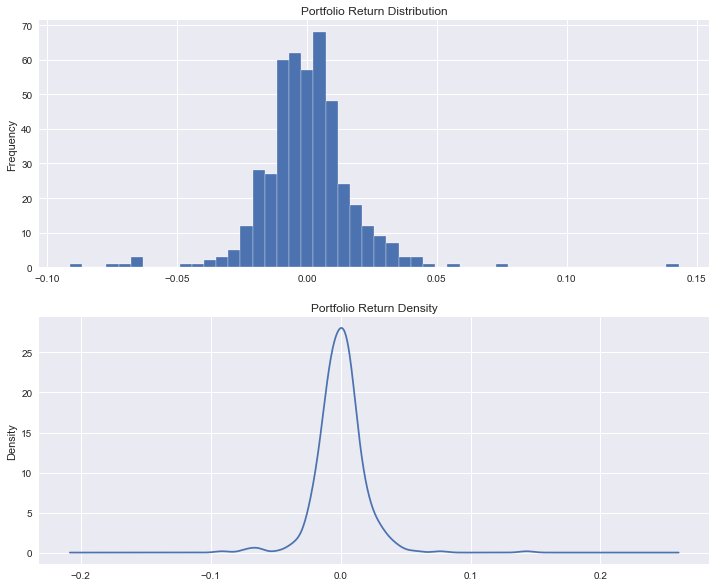

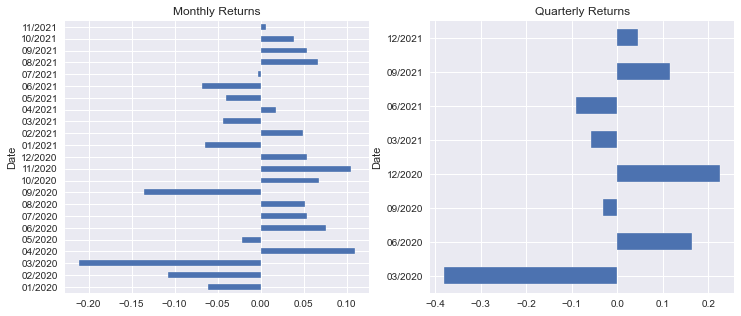

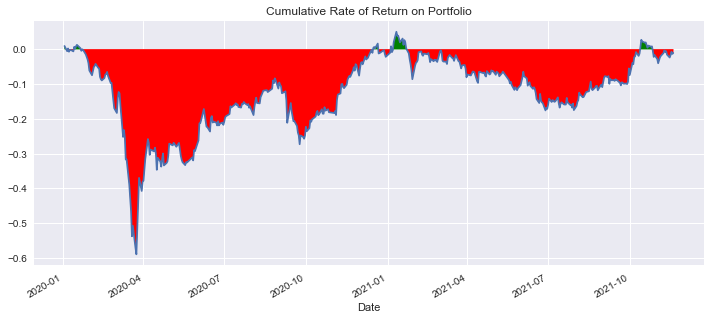

Holding Return                                  0.007
Cumulative Return                              -0.011
Annualised Volatility                           0.222
Max Drawdown                                   -0.590
Sharpe                                          0.537
Skew                                            0.604
Kurtosis                                       11.169
Parametric 1-day Value-at-Risk (95% C.L.)      -0.022
Parametric 1-day Value-at-Risk (99% C.L.)      -0.032
Parametric 1-day Value-at-Risk (99.5% C.L.)    -0.035
Historical 1-day Value-at-Risk (95% C.L.)      -0.024
Historical 1-day Value-at-Risk (99% C.L.)      -0.064
Historical 1-day Value-at-Risk (99.5% C.L.)    -0.070
dtype: object

In [210]:
backtest(rand_assets_10)

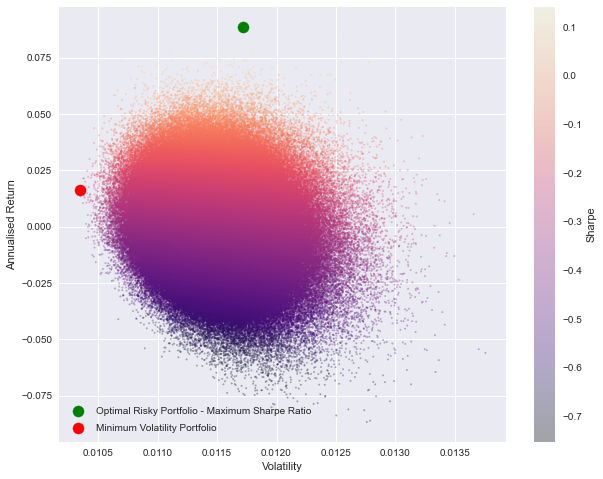

Annualised Return      0.088771
Expected Return        0.012830
Realised Return        0.045240
Volatility             0.011718
Downside Risk          0.007544
Market Risk Premium    0.026169
Sharpe                 0.140678
Sortino                0.218518
Weighted Alpha         0.000007
Weighted Beta          0.329648
(INDF.JK, Weights)     0.109914
(RALS.JK, Weights)     0.063514
(LSIP.JK, Weights)     0.025047
(BBRI.JK, Weights)     0.176349
(BBCA.JK, Weights)     0.179029
(TINS.JK, Weights)     0.008873
(BRPT.JK, Weights)     0.054320
(ASRI.JK, Weights)     0.056955
(KAEF.JK, Weights)     0.001572
(ISAT.JK, Weights)     0.004295
(ADHI.JK, Weights)     0.060351
(PWON.JK, Weights)     0.160050
(BBTN.JK, Weights)     0.034732
(TLKM.JK, Weights)     0.019423
(UNTR.JK, Weights)     0.045577
Name: 408544, dtype: float64

INDF.JK    0.109914
RALS.JK    0.063514
LSIP.JK    0.025047
BBRI.JK    0.176349
BBCA.JK    0.179029
TINS.JK    0.008873
BRPT.JK    0.054320
ASRI.JK    0.056955
KAEF.JK    0.001572
ISAT.JK    0.004295
ADHI.JK    0.060351
PWON.JK    0.160050
BBTN.JK    0.034732
TLKM.JK    0.019423
UNTR.JK    0.045577
Name: 408544, dtype: float64

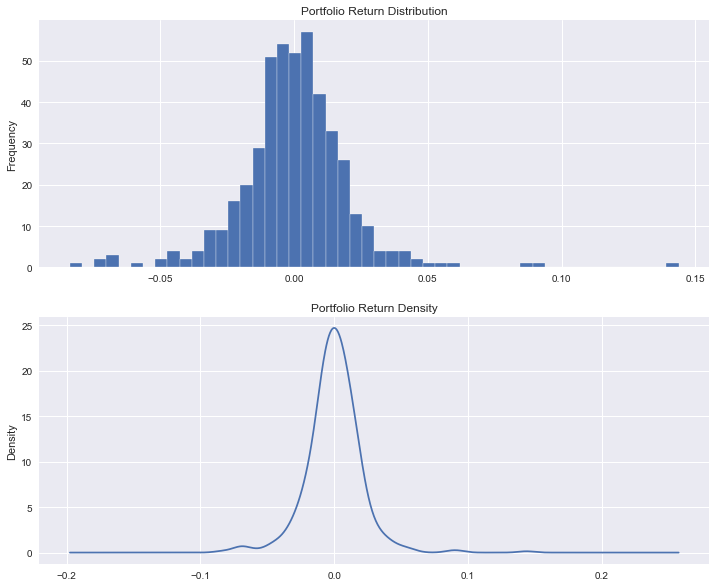

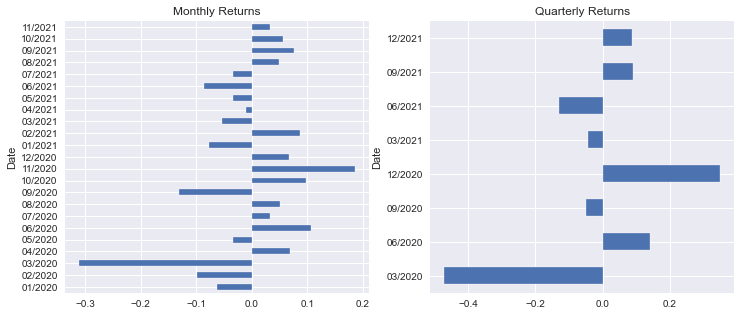

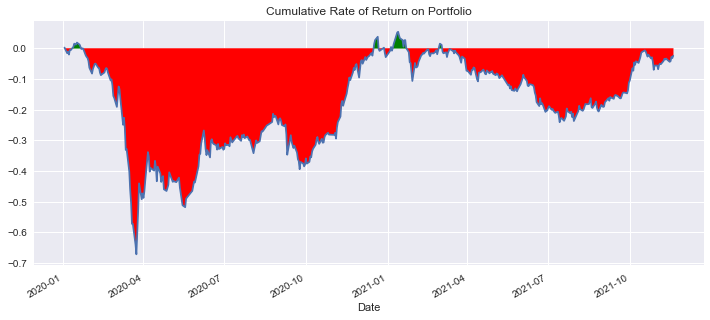

Holding Return                                 -0.009
Cumulative Return                              -0.024
Annualised Volatility                           0.238
Max Drawdown                                   -0.672
Sharpe                                          0.529
Skew                                            0.549
Kurtosis                                        7.507
Parametric 1-day Value-at-Risk (95% C.L.)      -0.024
Parametric 1-day Value-at-Risk (99% C.L.)      -0.034
Parametric 1-day Value-at-Risk (99.5% C.L.)    -0.038
Historical 1-day Value-at-Risk (95% C.L.)      -0.032
Historical 1-day Value-at-Risk (99% C.L.)      -0.067
Historical 1-day Value-at-Risk (99.5% C.L.)    -0.070
dtype: object

In [211]:
backtest(rand_assets_15)

## **Clustered Assets Portfolio + Equal Weights** 

Annualised Return      0.101832
Expected Return        0.100729
Realised Return        0.100474
Volatility             0.010434
Downside Risk          0.006708
Market Risk Premium     0.03923
Sharpe                  0.23685
Sortino                0.368391
Weighted Alpha         0.000005
Weighted Beta          0.370919
Stocks                  Weights
dtype: object

AALI.JK    0.090909
ASII.JK    0.090909
BBCA.JK    0.090909
BBRI.JK    0.090909
BMRI.JK    0.090909
ICBP.JK    0.090909
INDF.JK    0.090909
JSMR.JK    0.090909
KLBF.JK    0.090909
TLKM.JK    0.090909
UNVR.JK    0.090909
dtype: float64

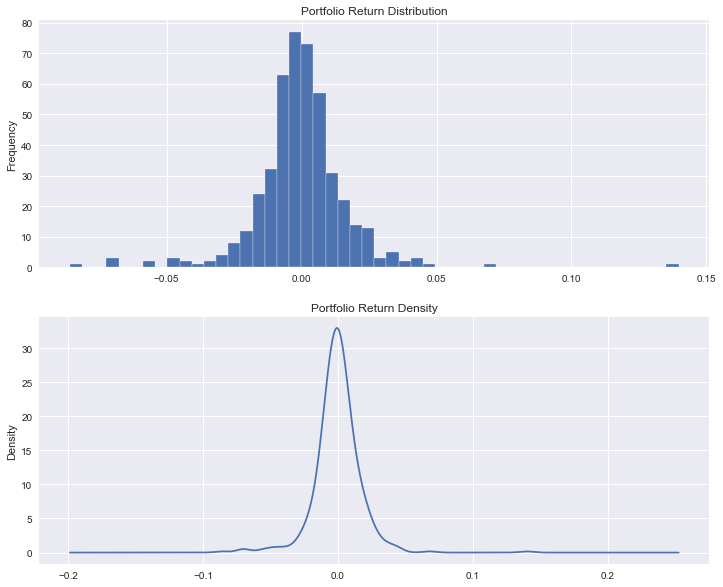

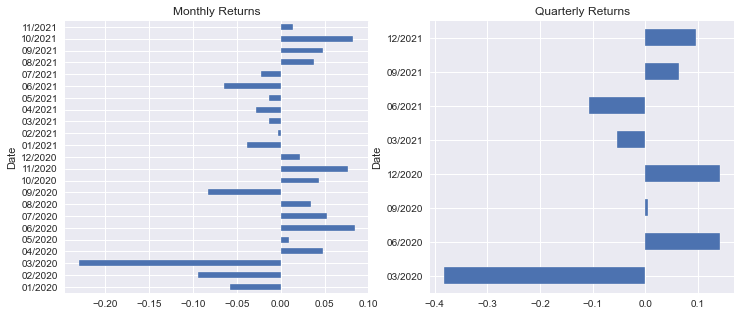

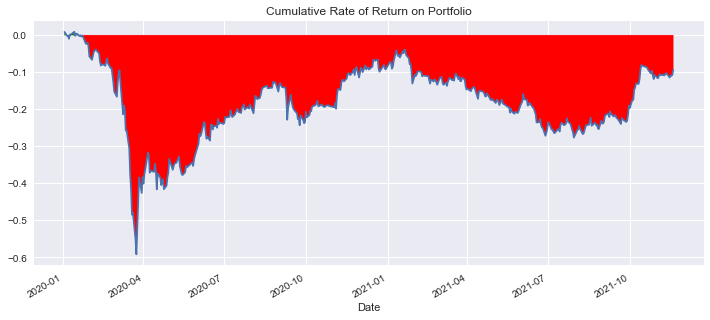

Holding Return                                 -0.074
Cumulative Return                              -0.094
Annualised Volatility                           0.210
Max Drawdown                                   -0.591
Sharpe                                          0.517
Skew                                            0.497
Kurtosis                                       12.427
Parametric 1-day Value-at-Risk (95% C.L.)      -0.021
Parametric 1-day Value-at-Risk (99% C.L.)      -0.030
Parametric 1-day Value-at-Risk (99.5% C.L.)    -0.034
Historical 1-day Value-at-Risk (95% C.L.)      -0.024
Historical 1-day Value-at-Risk (99% C.L.)      -0.056
Historical 1-day Value-at-Risk (99.5% C.L.)    -0.070
dtype: object

In [212]:
backtest(sharpe_cluster, weights_equal=True)

Annualised Return      0.014849
Expected Return        0.059744
Realised Return        0.133114
Volatility             0.013285
Downside Risk          0.008528
Market Risk Premium   -0.047753
Sharpe                -0.226442
Sortino               -0.352729
Weighted Alpha         0.000122
Weighted Beta          0.198149
Stocks                  Weights
dtype: object

ADRO.JK    0.083333
BMTR.JK    0.083333
CPIN.JK    0.083333
CTRA.JK    0.083333
EXCL.JK    0.083333
INCO.JK    0.083333
JPFA.JK    0.083333
MAPI.JK    0.083333
MEDC.JK    0.083333
PGAS.JK    0.083333
SMRA.JK    0.083333
WIKA.JK    0.083333
dtype: float64

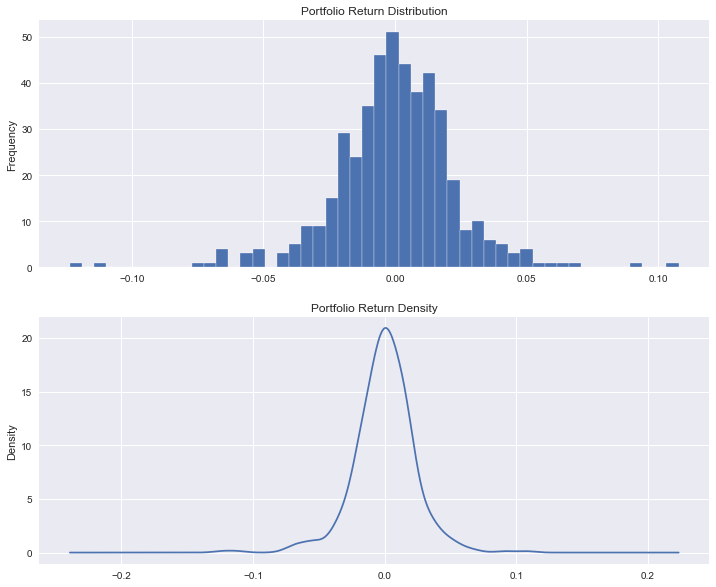

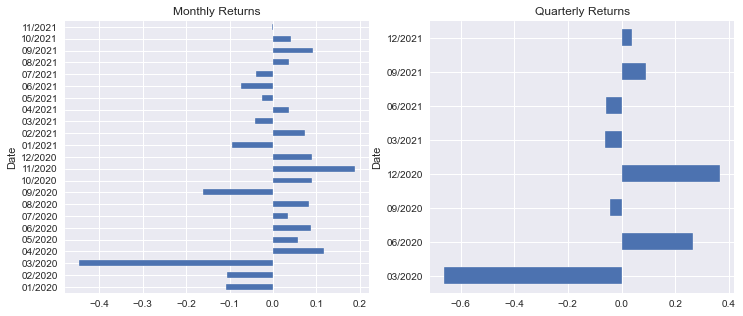

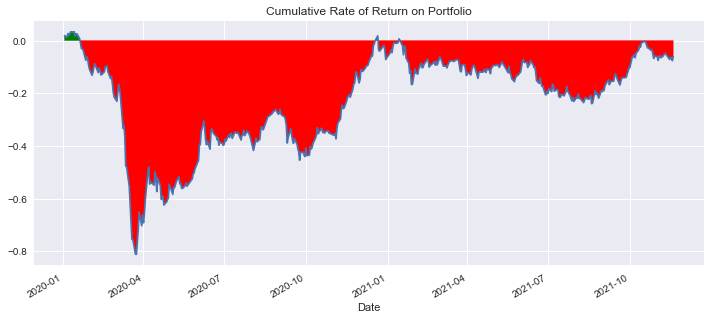

Holding Return                                 -0.037
Cumulative Return                              -0.061
Annualised Volatility                           0.299
Max Drawdown                                   -0.811
Sharpe                                          0.328
Skew                                           -0.408
Kurtosis                                        4.283
Parametric 1-day Value-at-Risk (95% C.L.)      -0.031
Parametric 1-day Value-at-Risk (99% C.L.)      -0.043
Parametric 1-day Value-at-Risk (99.5% C.L.)    -0.048
Historical 1-day Value-at-Risk (95% C.L.)      -0.035
Historical 1-day Value-at-Risk (99% C.L.)      -0.066
Historical 1-day Value-at-Risk (99.5% C.L.)    -0.073
dtype: object

In [213]:
backtest(beta_cluster, weights_equal=True)

Annualised Return     -0.309785
Expected Return       -0.945391
Realised Return       -0.926556
Volatility             0.017529
Downside Risk          0.011635
Market Risk Premium   -0.372387
Sharpe                -1.338271
Sortino               -2.016151
Weighted Alpha         0.000315
Weighted Beta          0.161305
Stocks                  Weights
dtype: object

DOID.JK    0.25
INDY.JK    0.25
INKP.JK    0.25
KAEF.JK    0.25
dtype: float64

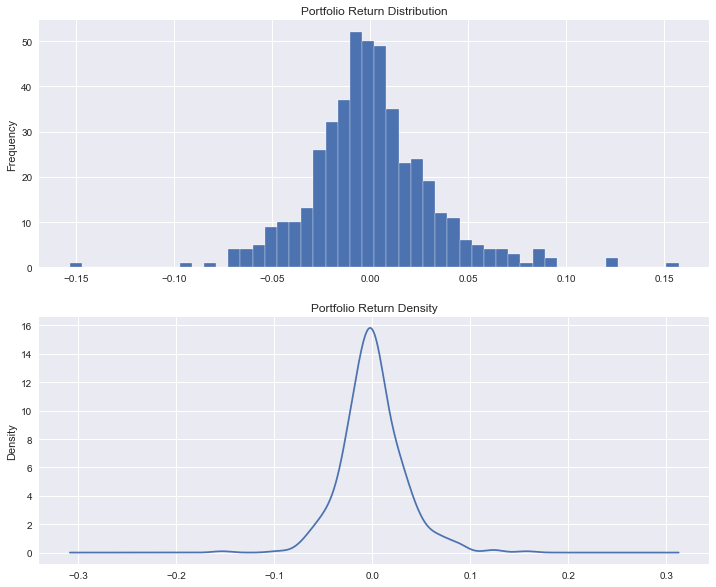

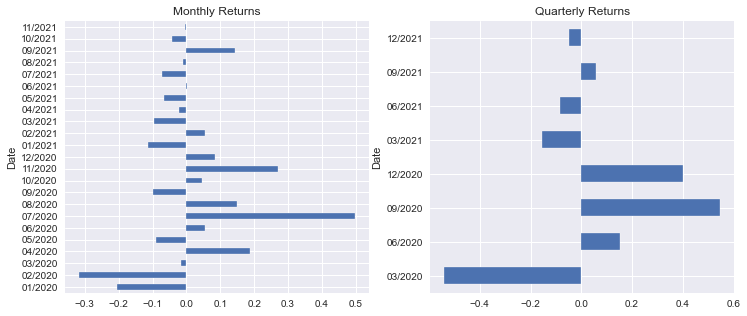

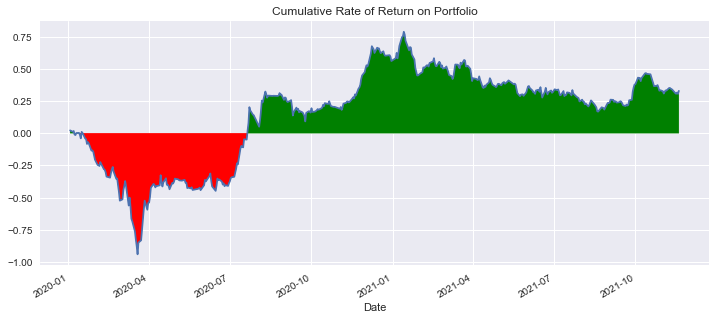

Holding Return                                  0.432
Cumulative Return                               0.329
Annualised Volatility                           0.363
Max Drawdown                                   -0.941
Sharpe                                          0.184
Skew                                            0.430
Kurtosis                                        3.146
Parametric 1-day Value-at-Risk (95% C.L.)      -0.037
Parametric 1-day Value-at-Risk (99% C.L.)      -0.053
Parametric 1-day Value-at-Risk (99.5% C.L.)    -0.059
Historical 1-day Value-at-Risk (95% C.L.)      -0.050
Historical 1-day Value-at-Risk (99% C.L.)      -0.069
Historical 1-day Value-at-Risk (99.5% C.L.)    -0.076
dtype: object

In [214]:
backtest(alpha_cluster, weights_equal=True)

Annualised Return      0.151505
Expected Return        0.062746
Realised Return        0.063183
Volatility             0.010832
Downside Risk          0.006886
Market Risk Premium    0.088903
Sharpe                  0.51703
Sortino                0.813298
Weighted Alpha        -0.000025
Weighted Beta          0.334493
Stocks                  Weights
dtype: object

AKRA.JK    0.066667
ASII.JK    0.066667
BBCA.JK    0.066667
BBRI.JK    0.066667
BMRI.JK    0.066667
CPIN.JK    0.066667
GGRM.JK    0.066667
ICBP.JK    0.066667
INDF.JK    0.066667
JSMR.JK    0.066667
KLBF.JK    0.066667
MAPI.JK    0.066667
TLKM.JK    0.066667
UNVR.JK    0.066667
WIKA.JK    0.066667
dtype: float64

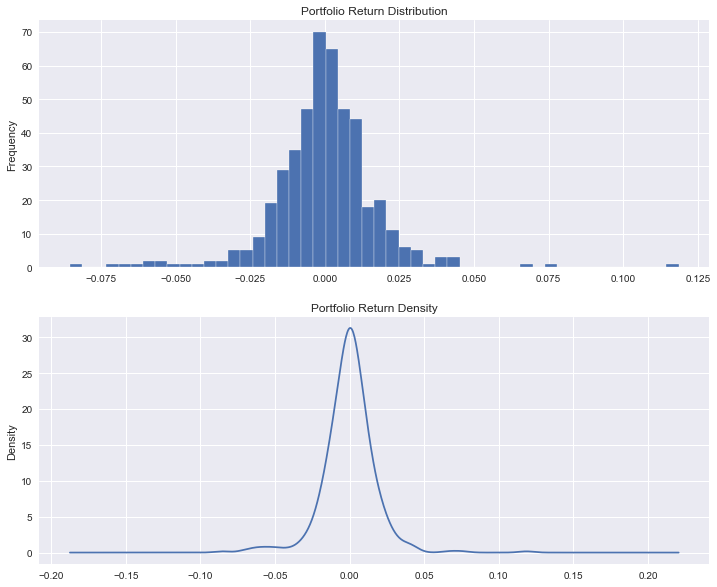

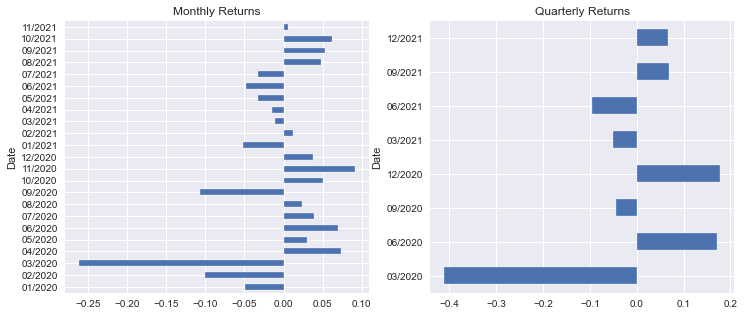

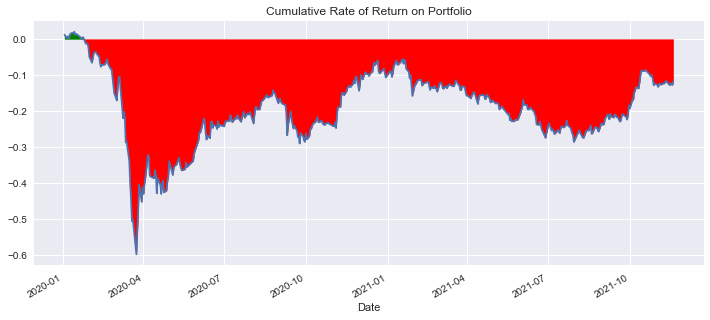

Holding Return                                 -0.092
Cumulative Return                              -0.117
Annualised Volatility                           0.241
Max Drawdown                                   -0.597
Sharpe                                          0.568
Skew                                            0.107
Kurtosis                                        7.829
Parametric 1-day Value-at-Risk (95% C.L.)      -0.024
Parametric 1-day Value-at-Risk (99% C.L.)      -0.035
Parametric 1-day Value-at-Risk (99.5% C.L.)    -0.039
Historical 1-day Value-at-Risk (95% C.L.)      -0.025
Historical 1-day Value-at-Risk (99% C.L.)      -0.060
Historical 1-day Value-at-Risk (99.5% C.L.)    -0.066
dtype: object

In [215]:
backtest(sharpe_pca_cluster, weights_equal=True)

Annualised Return      -0.01922
Expected Return       -0.124287
Realised Return       -0.086394
Volatility             0.012373
Downside Risk          0.007951
Market Risk Premium   -0.081822
Sharpe                -0.416563
Sortino               -0.648258
Weighted Alpha         0.000167
Weighted Beta          0.232122
Stocks                  Weights
dtype: object

ADHI.JK    0.045455
ADRO.JK    0.045455
ASRI.JK    0.045455
BBTN.JK    0.045455
BDMN.JK    0.045455
BSDE.JK    0.045455
CTRA.JK    0.045455
EXCL.JK    0.045455
INCO.JK    0.045455
INKP.JK    0.045455
INTP.JK    0.045455
ITMG.JK    0.045455
JPFA.JK    0.045455
LPKR.JK    0.045455
MNCN.JK    0.045455
PGAS.JK    0.045455
PTBA.JK    0.045455
PWON.JK    0.045455
SMGR.JK    0.045455
SMRA.JK    0.045455
TINS.JK    0.045455
UNTR.JK    0.045455
dtype: float64

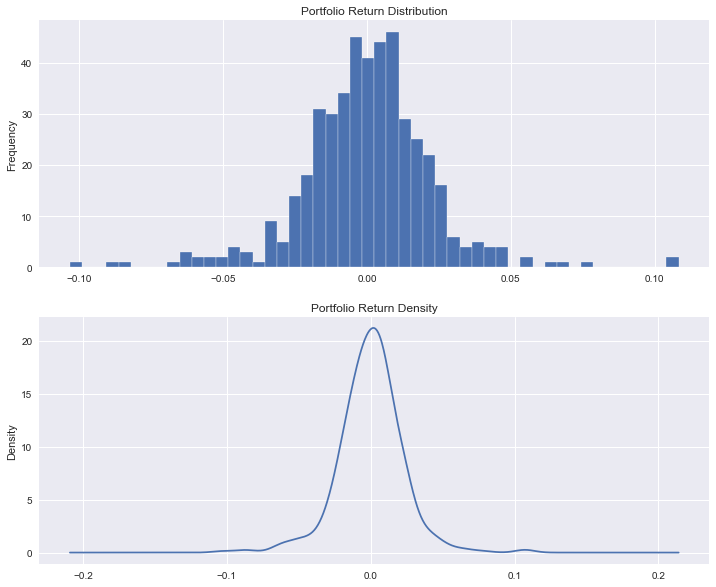

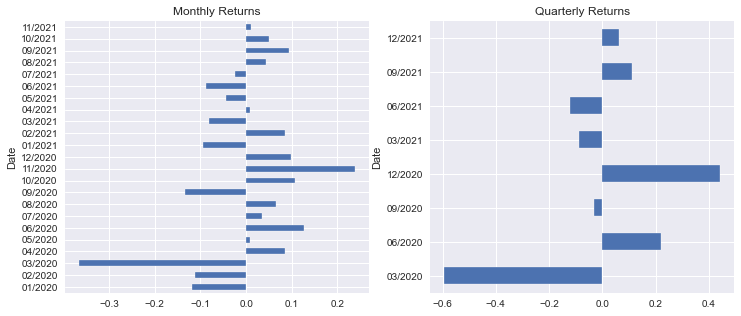

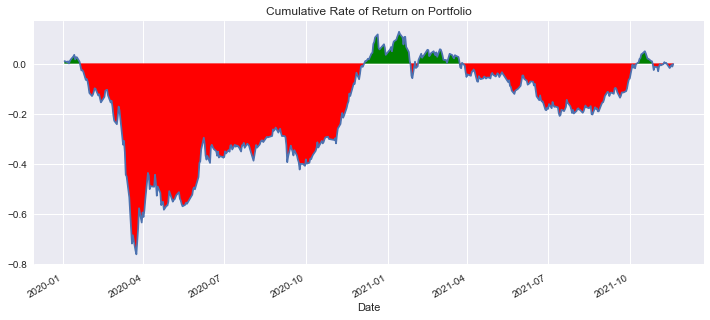

Holding Return                                  0.052
Cumulative Return                              -0.002
Annualised Volatility                           0.253
Max Drawdown                                   -0.763
Sharpe                                          0.253
Skew                                           -0.033
Kurtosis                                        3.885
Parametric 1-day Value-at-Risk (95% C.L.)      -0.026
Parametric 1-day Value-at-Risk (99% C.L.)      -0.037
Parametric 1-day Value-at-Risk (99.5% C.L.)    -0.041
Historical 1-day Value-at-Risk (95% C.L.)      -0.034
Historical 1-day Value-at-Risk (99% C.L.)      -0.063
Historical 1-day Value-at-Risk (99.5% C.L.)    -0.079
dtype: object

In [216]:
backtest(beta_pca_cluster, weights_equal=True)

Annualised Return     -0.216282
Expected Return       -0.294378
Realised Return       -0.185809
Volatility             0.011492
Downside Risk          0.007928
Market Risk Premium   -0.278884
Sharpe                -1.528671
Sortino               -2.216051
Weighted Alpha         0.000287
Weighted Beta          0.176909
Stocks                  Weights
dtype: object

AALI.JK    0.066667
ANTM.JK    0.066667
BMTR.JK    0.066667
BRPT.JK    0.066667
DOID.JK    0.066667
ELSA.JK    0.066667
GJTL.JK    0.066667
INDY.JK    0.066667
ISAT.JK    0.066667
KAEF.JK    0.066667
LSIP.JK    0.066667
MEDC.JK    0.066667
PNBN.JK    0.066667
PNLF.JK    0.066667
RALS.JK    0.066667
dtype: float64

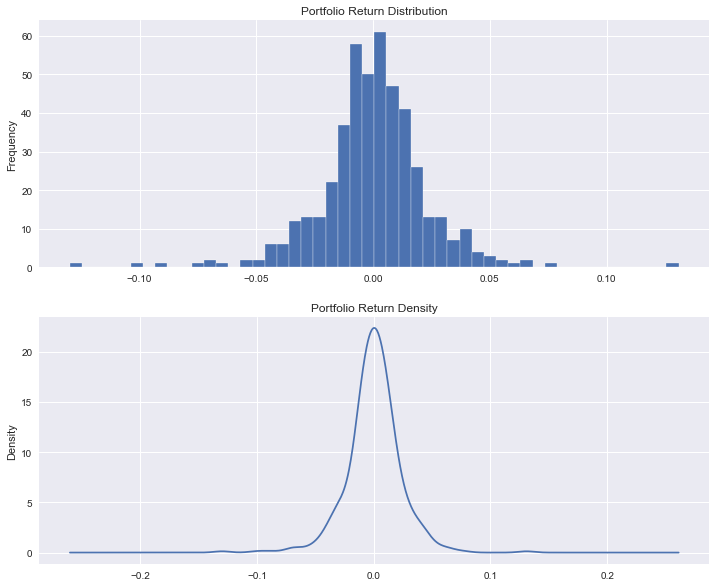

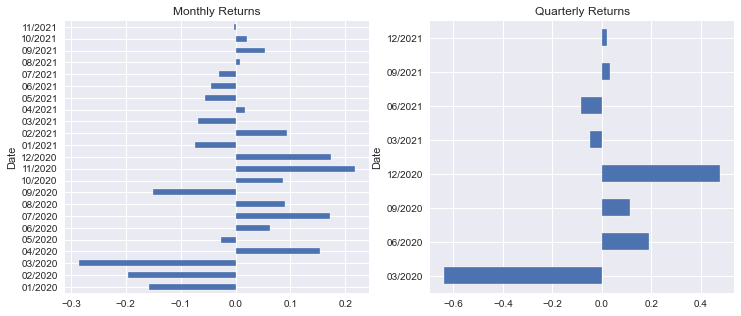

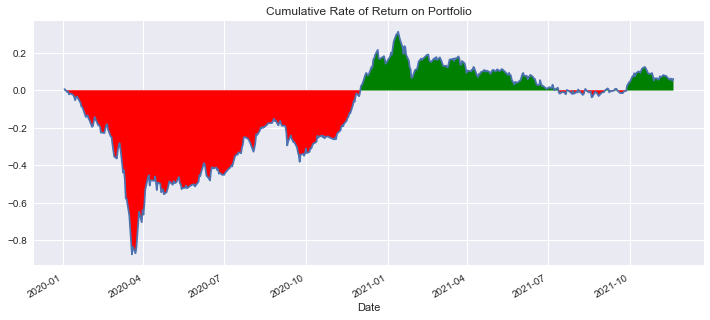

Holding Return                                  0.208
Cumulative Return                               0.062
Annualised Volatility                           0.244
Max Drawdown                                   -0.874
Sharpe                                          0.140
Skew                                           -0.293
Kurtosis                                        5.353
Parametric 1-day Value-at-Risk (95% C.L.)      -0.025
Parametric 1-day Value-at-Risk (99% C.L.)      -0.036
Parametric 1-day Value-at-Risk (99.5% C.L.)    -0.039
Historical 1-day Value-at-Risk (95% C.L.)      -0.035
Historical 1-day Value-at-Risk (99% C.L.)      -0.068
Historical 1-day Value-at-Risk (99.5% C.L.)    -0.084
dtype: object

In [217]:
backtest(alpha_pca_cluster, weights_equal=True)

## **Clustered Assets Portfolio + Optimised** 

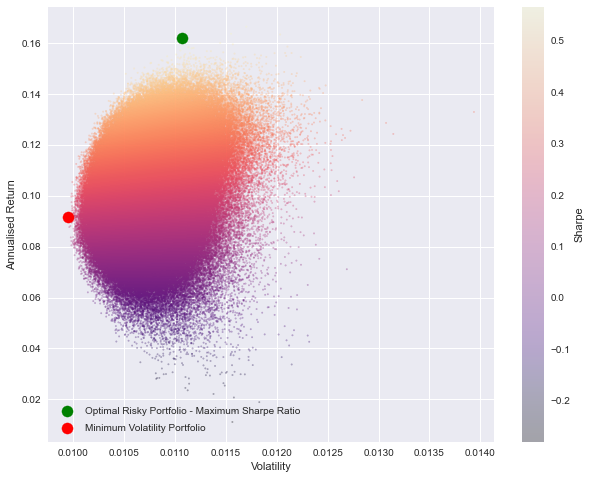

Annualised Return      0.161953
Expected Return        0.170180
Realised Return        0.166283
Volatility             0.011073
Downside Risk          0.007307
Market Risk Premium    0.099352
Sharpe                 0.565186
Sortino                0.856498
Weighted Alpha        -0.000093
Weighted Beta          0.401068
(AALI.JK, Weights)     0.015396
(ASII.JK, Weights)     0.002189
(BBCA.JK, Weights)     0.256893
(BBRI.JK, Weights)     0.241921
(BMRI.JK, Weights)     0.000539
(ICBP.JK, Weights)     0.144815
(INDF.JK, Weights)     0.104866
(JSMR.JK, Weights)     0.008165
(KLBF.JK, Weights)     0.126070
(TLKM.JK, Weights)     0.017165
(UNVR.JK, Weights)     0.081982
Name: 113895, dtype: float64

AALI.JK    0.015396
ASII.JK    0.002189
BBCA.JK    0.256893
BBRI.JK    0.241921
BMRI.JK    0.000539
ICBP.JK    0.144815
INDF.JK    0.104866
JSMR.JK    0.008165
KLBF.JK    0.126070
TLKM.JK    0.017165
UNVR.JK    0.081982
Name: 113895, dtype: float64

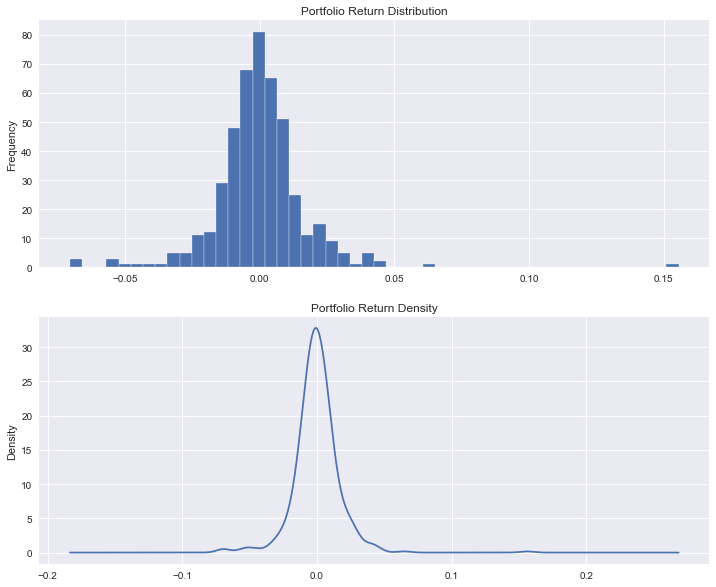

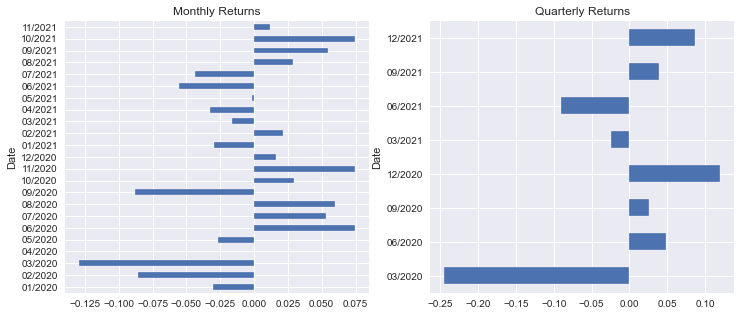

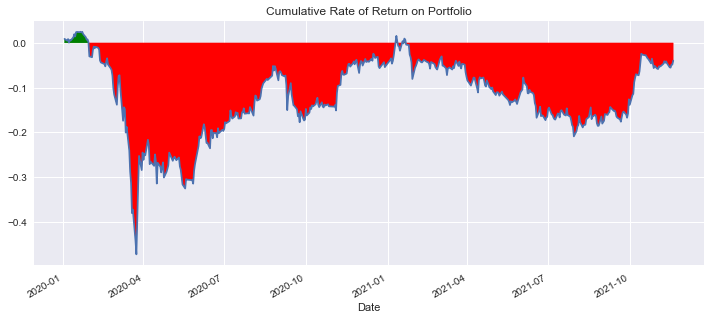

Holding Return                                 -0.023
Cumulative Return                              -0.040
Annualised Volatility                           0.220
Max Drawdown                                   -0.473
Sharpe                                          0.688
Skew                                            1.252
Kurtosis                                       16.861
Parametric 1-day Value-at-Risk (95% C.L.)      -0.022
Parametric 1-day Value-at-Risk (99% C.L.)      -0.032
Parametric 1-day Value-at-Risk (99.5% C.L.)    -0.035
Historical 1-day Value-at-Risk (95% C.L.)      -0.023
Historical 1-day Value-at-Risk (99% C.L.)      -0.053
Historical 1-day Value-at-Risk (99.5% C.L.)    -0.064
dtype: object

In [218]:
backtest(sharpe_cluster, num_port=500000)

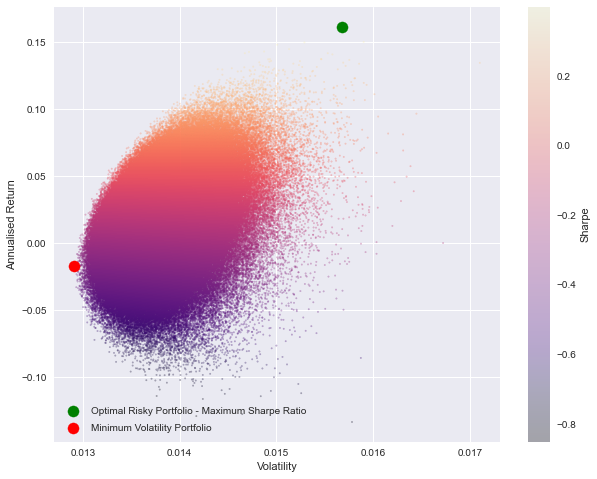

Annualised Return      0.161653
Expected Return        0.104601
Realised Return        0.200533
Volatility             0.015675
Downside Risk          0.009521
Market Risk Premium    0.099051
Sharpe                 0.398066
Sortino                0.655361
Weighted Alpha         0.000007
Weighted Beta          0.206744
(ADRO.JK, Weights)     0.009542
(BMTR.JK, Weights)     0.019149
(CPIN.JK, Weights)     0.131159
(CTRA.JK, Weights)     0.014869
(EXCL.JK, Weights)     0.064178
(INCO.JK, Weights)     0.024067
(JPFA.JK, Weights)     0.008057
(MAPI.JK, Weights)     0.284749
(MEDC.JK, Weights)     0.013721
(PGAS.JK, Weights)     0.007105
(SMRA.JK, Weights)     0.151024
(WIKA.JK, Weights)     0.272381
Name: 101648, dtype: float64

ADRO.JK    0.009542
BMTR.JK    0.019149
CPIN.JK    0.131159
CTRA.JK    0.014869
EXCL.JK    0.064178
INCO.JK    0.024067
JPFA.JK    0.008057
MAPI.JK    0.284749
MEDC.JK    0.013721
PGAS.JK    0.007105
SMRA.JK    0.151024
WIKA.JK    0.272381
Name: 101648, dtype: float64

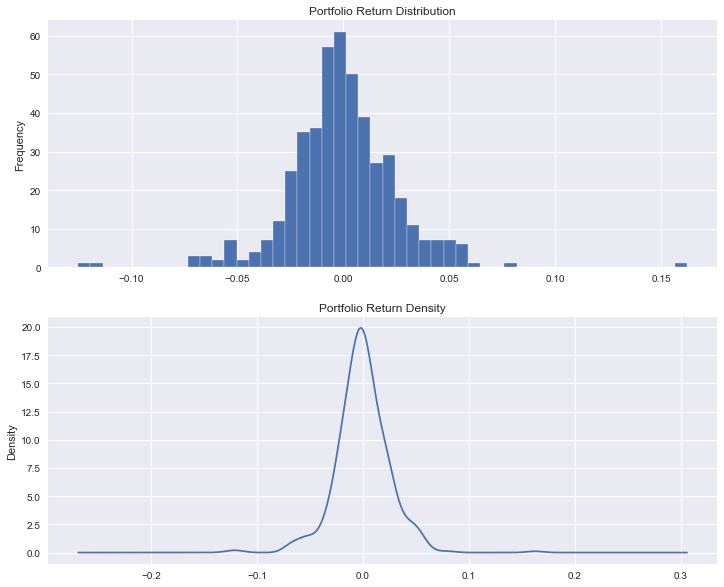

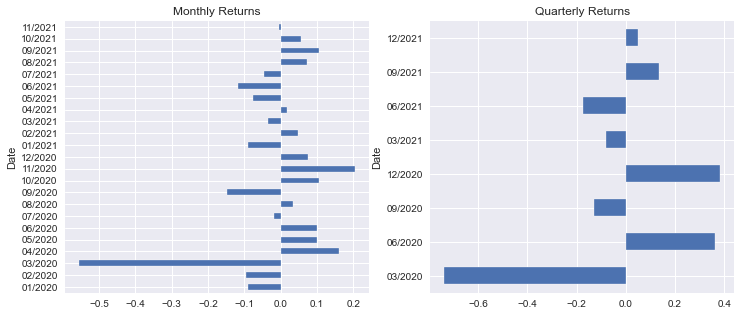

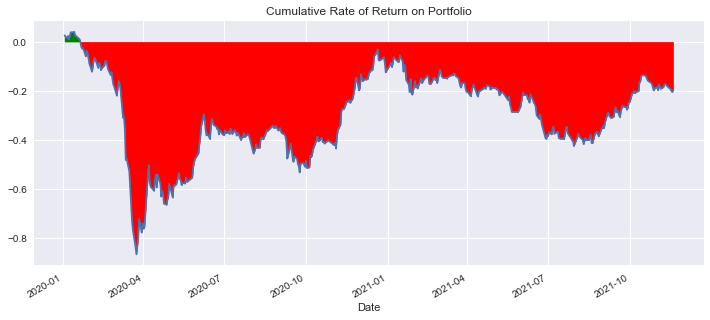

Holding Return                                 -0.165
Cumulative Return                              -0.196
Annualised Volatility                           0.560
Max Drawdown                                   -0.866
Sharpe                                          0.288
Skew                                            0.098
Kurtosis                                        5.562
Parametric 1-day Value-at-Risk (95% C.L.)      -0.057
Parametric 1-day Value-at-Risk (99% C.L.)      -0.081
Parametric 1-day Value-at-Risk (99.5% C.L.)    -0.090
Historical 1-day Value-at-Risk (95% C.L.)      -0.039
Historical 1-day Value-at-Risk (99% C.L.)      -0.068
Historical 1-day Value-at-Risk (99.5% C.L.)    -0.069
dtype: object

In [219]:
backtest(beta_cluster, num_port=500000)

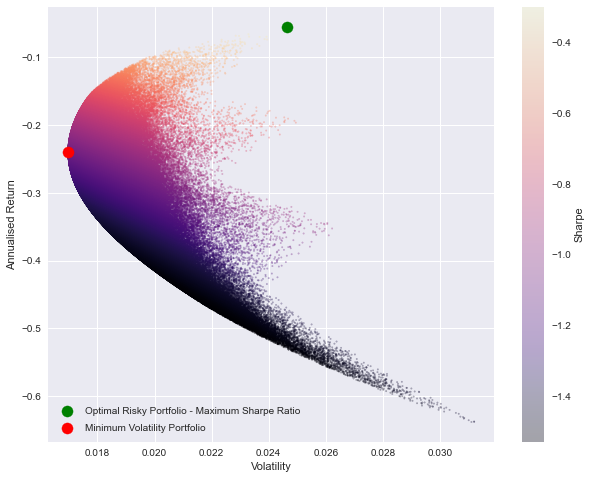

Annualised Return     -0.054599
Expected Return       -0.499815
Realised Return       -1.026433
Volatility             0.024634
Downside Risk          0.016820
Market Risk Premium   -0.117201
Sharpe                -0.299706
Sortino               -0.438935
Weighted Alpha         0.000176
Weighted Beta          0.182897
(DOID.JK, Weights)     0.000772
(INDY.JK, Weights)     0.000624
(INKP.JK, Weights)     0.993331
(KAEF.JK, Weights)     0.005273
Name: 172109, dtype: float64

DOID.JK    0.000772
INDY.JK    0.000624
INKP.JK    0.993331
KAEF.JK    0.005273
Name: 172109, dtype: float64

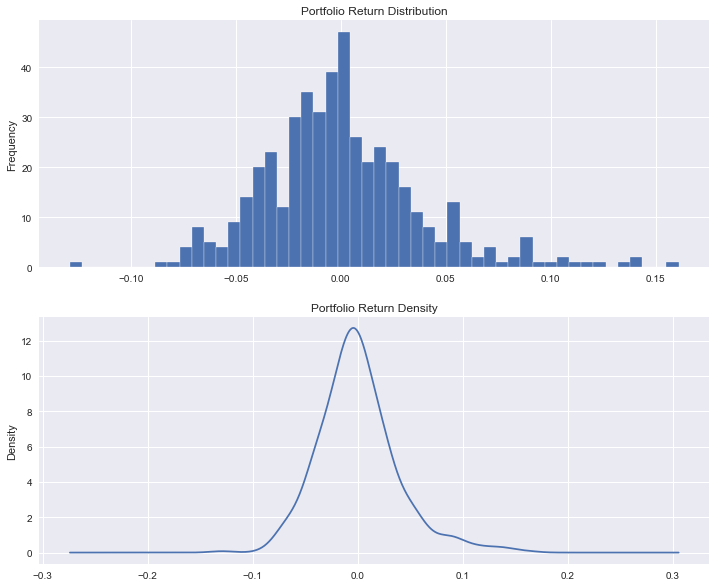

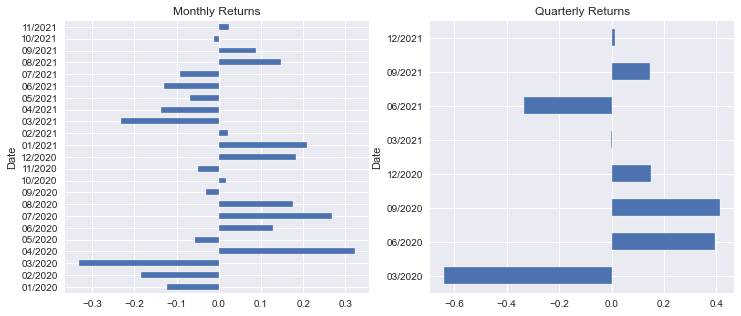

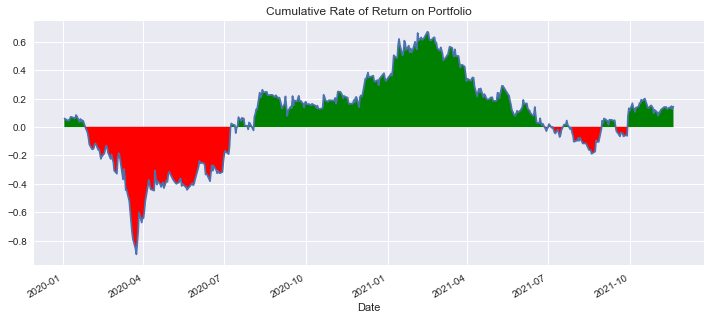

Holding Return                                  0.155
Cumulative Return                               0.144
Annualised Volatility                           0.497
Max Drawdown                                   -0.896
Sharpe                                          0.294
Skew                                            0.799
Kurtosis                                        1.970
Parametric 1-day Value-at-Risk (95% C.L.)      -0.051
Parametric 1-day Value-at-Risk (99% C.L.)      -0.072
Parametric 1-day Value-at-Risk (99.5% C.L.)    -0.080
Historical 1-day Value-at-Risk (95% C.L.)      -0.055
Historical 1-day Value-at-Risk (99% C.L.)      -0.072
Historical 1-day Value-at-Risk (99.5% C.L.)    -0.077
dtype: object

In [220]:
backtest(alpha_cluster, num_port=500000)

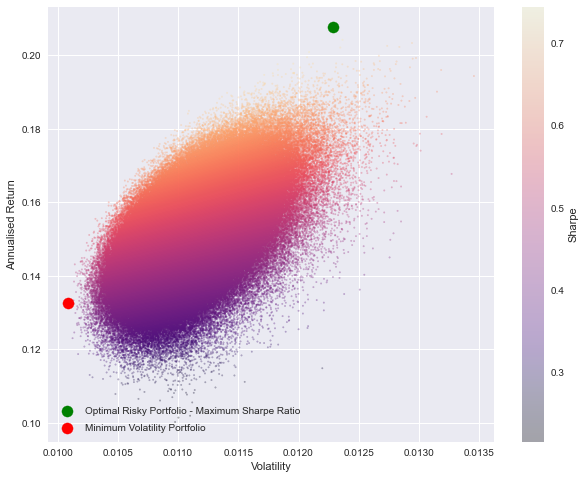

Annualised Return      0.207761
Expected Return        0.148658
Realised Return        0.102868
Volatility             0.012287
Downside Risk          0.007927
Market Risk Premium    0.145159
Sharpe                 0.744207
Sortino                1.153597
Weighted Alpha        -0.000080
Weighted Beta          0.312221
(AKRA.JK, Weights)     0.093363
(ASII.JK, Weights)     0.000229
(BBCA.JK, Weights)     0.173649
(BBRI.JK, Weights)     0.039099
(BMRI.JK, Weights)     0.029158
(CPIN.JK, Weights)     0.172834
(GGRM.JK, Weights)     0.027375
(ICBP.JK, Weights)     0.035370
(INDF.JK, Weights)     0.048342
(JSMR.JK, Weights)     0.017762
(KLBF.JK, Weights)     0.163613
(MAPI.JK, Weights)     0.163346
(TLKM.JK, Weights)     0.012042
(UNVR.JK, Weights)     0.016999
(WIKA.JK, Weights)     0.006820
Name: 278250, dtype: float64

AKRA.JK    0.093363
ASII.JK    0.000229
BBCA.JK    0.173649
BBRI.JK    0.039099
BMRI.JK    0.029158
CPIN.JK    0.172834
GGRM.JK    0.027375
ICBP.JK    0.035370
INDF.JK    0.048342
JSMR.JK    0.017762
KLBF.JK    0.163613
MAPI.JK    0.163346
TLKM.JK    0.012042
UNVR.JK    0.016999
WIKA.JK    0.006820
Name: 278250, dtype: float64

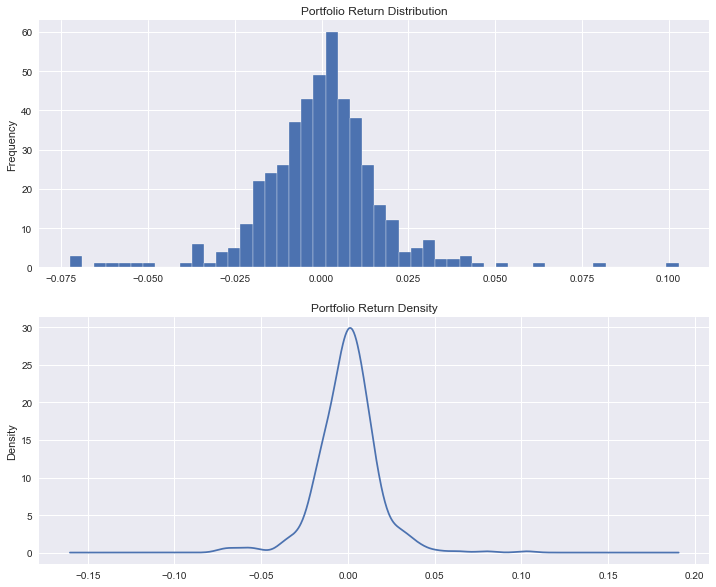

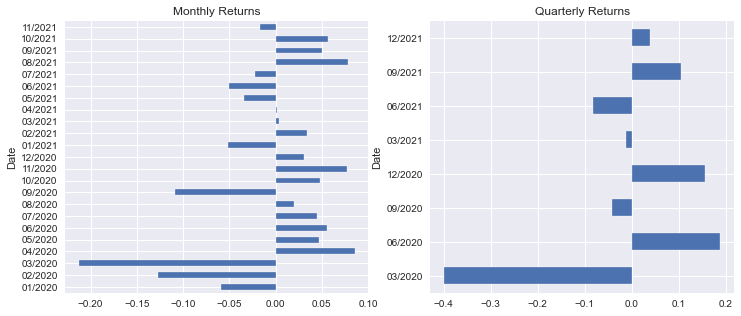

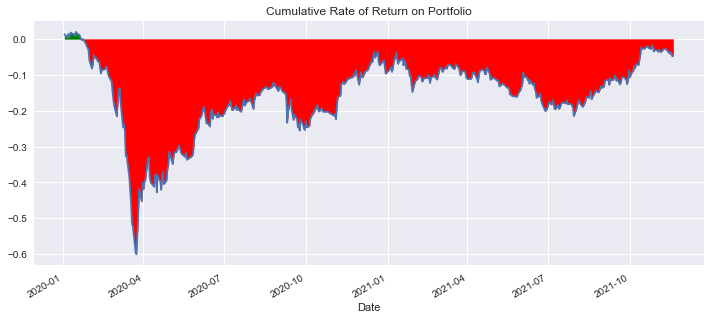

Holding Return                                 -0.033
Cumulative Return                              -0.047
Annualised Volatility                           0.355
Max Drawdown                                   -0.600
Sharpe                                          0.507
Skew                                            0.119
Kurtosis                                        5.585
Parametric 1-day Value-at-Risk (95% C.L.)      -0.036
Parametric 1-day Value-at-Risk (99% C.L.)      -0.051
Parametric 1-day Value-at-Risk (99.5% C.L.)    -0.057
Historical 1-day Value-at-Risk (95% C.L.)      -0.026
Historical 1-day Value-at-Risk (99% C.L.)      -0.058
Historical 1-day Value-at-Risk (99.5% C.L.)    -0.068
dtype: object

In [221]:
backtest(sharpe_pca_cluster, num_port=500000)

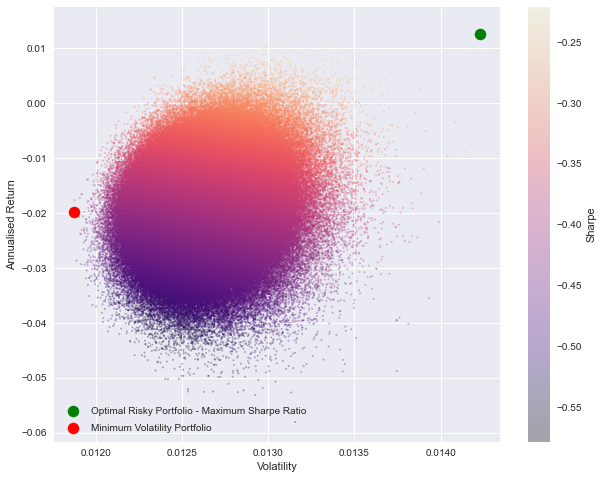

Annualised Return      0.012630
Expected Return       -0.183786
Realised Return       -0.101657
Volatility             0.014227
Downside Risk          0.008835
Market Risk Premium   -0.049972
Sharpe                -0.221267
Sortino               -0.356282
Weighted Alpha         0.000139
Weighted Beta          0.232252
(ADHI.JK, Weights)     0.074999
(ADRO.JK, Weights)     0.003748
(ASRI.JK, Weights)     0.099833
(BBTN.JK, Weights)     0.043697
(BDMN.JK, Weights)     0.020468
(BSDE.JK, Weights)     0.138424
(CTRA.JK, Weights)     0.115649
(EXCL.JK, Weights)     0.006096
(INCO.JK, Weights)     0.002673
(INKP.JK, Weights)     0.023066
(INTP.JK, Weights)     0.030951
(ITMG.JK, Weights)     0.050281
(JPFA.JK, Weights)     0.092343
(LPKR.JK, Weights)     0.013937
(MNCN.JK, Weights)     0.033837
(PGAS.JK, Weights)     0.004860
(PTBA.JK, Weights)     0.008233
(PWON.JK, Weights)     0.129326
(SMGR.JK, Weights)     0.004916
(SMRA.JK, Weights)     0.067279
(TINS.JK, Weights)     0.013989
(UNTR.JK

ADHI.JK    0.074999
ADRO.JK    0.003748
ASRI.JK    0.099833
BBTN.JK    0.043697
BDMN.JK    0.020468
BSDE.JK    0.138424
CTRA.JK    0.115649
EXCL.JK    0.006096
INCO.JK    0.002673
INKP.JK    0.023066
INTP.JK    0.030951
ITMG.JK    0.050281
JPFA.JK    0.092343
LPKR.JK    0.013937
MNCN.JK    0.033837
PGAS.JK    0.004860
PTBA.JK    0.008233
PWON.JK    0.129326
SMGR.JK    0.004916
SMRA.JK    0.067279
TINS.JK    0.013989
UNTR.JK    0.021395
Name: 377464, dtype: float64

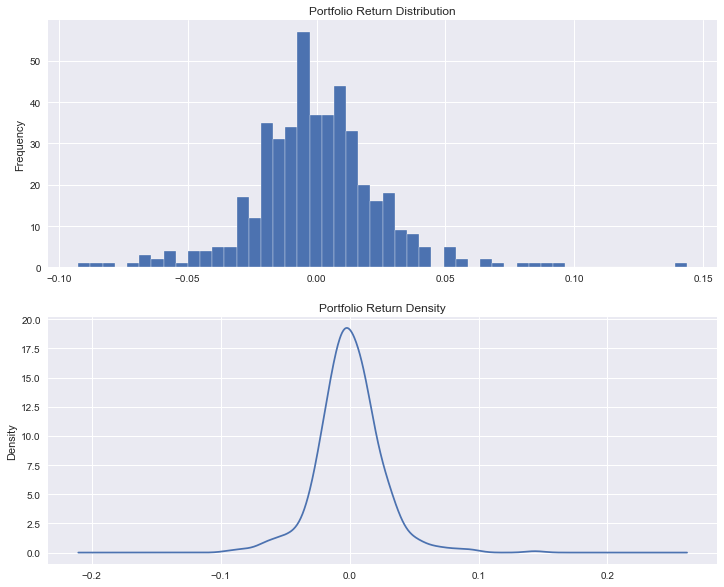

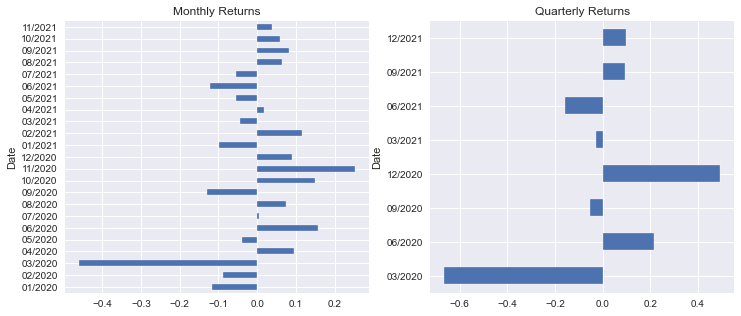

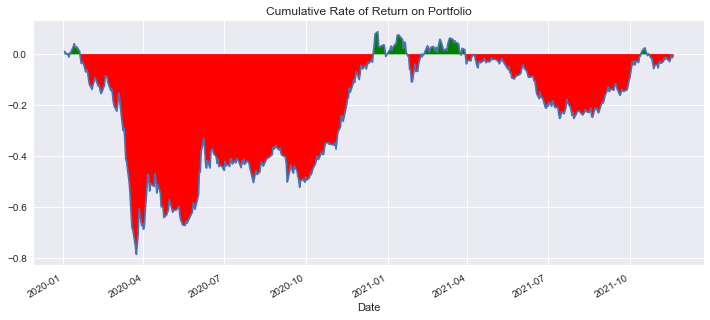

Holding Return                                  0.031
Cumulative Return                              -0.006
Annualised Volatility                           0.288
Max Drawdown                                   -0.787
Sharpe                                          0.332
Skew                                            0.440
Kurtosis                                        3.820
Parametric 1-day Value-at-Risk (95% C.L.)      -0.029
Parametric 1-day Value-at-Risk (99% C.L.)      -0.042
Parametric 1-day Value-at-Risk (99.5% C.L.)    -0.046
Historical 1-day Value-at-Risk (95% C.L.)      -0.038
Historical 1-day Value-at-Risk (99% C.L.)      -0.066
Historical 1-day Value-at-Risk (99.5% C.L.)    -0.076
dtype: object

In [222]:
backtest(beta_pca_cluster, num_port=500000)

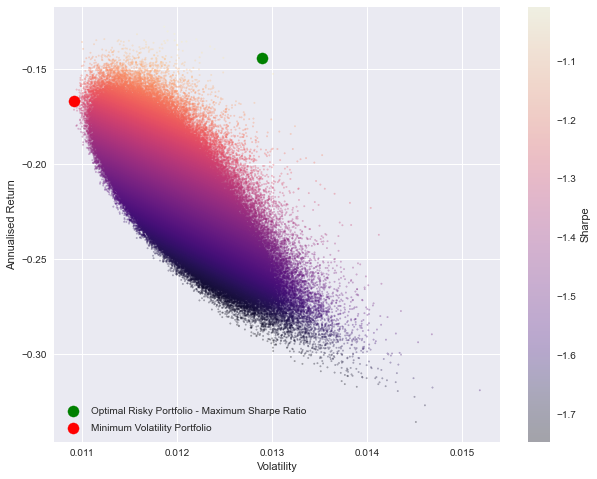

Annualised Return     -0.143773
Expected Return       -0.136468
Realised Return       -0.050420
Volatility             0.012894
Downside Risk          0.008612
Market Risk Premium   -0.206375
Sharpe                -1.008220
Sortino               -1.509497
Weighted Alpha         0.000250
Weighted Beta          0.179312
(AALI.JK, Weights)     0.072727
(ANTM.JK, Weights)     0.028302
(BMTR.JK, Weights)     0.145955
(BRPT.JK, Weights)     0.062250
(DOID.JK, Weights)     0.008434
(ELSA.JK, Weights)     0.002332
(GJTL.JK, Weights)     0.211923
(INDY.JK, Weights)     0.001388
(ISAT.JK, Weights)     0.018714
(KAEF.JK, Weights)     0.003158
(LSIP.JK, Weights)     0.117239
(MEDC.JK, Weights)     0.008060
(PNBN.JK, Weights)     0.001433
(PNLF.JK, Weights)     0.115740
(RALS.JK, Weights)     0.202346
Name: 415172, dtype: float64

AALI.JK    0.072727
ANTM.JK    0.028302
BMTR.JK    0.145955
BRPT.JK    0.062250
DOID.JK    0.008434
ELSA.JK    0.002332
GJTL.JK    0.211923
INDY.JK    0.001388
ISAT.JK    0.018714
KAEF.JK    0.003158
LSIP.JK    0.117239
MEDC.JK    0.008060
PNBN.JK    0.001433
PNLF.JK    0.115740
RALS.JK    0.202346
Name: 415172, dtype: float64

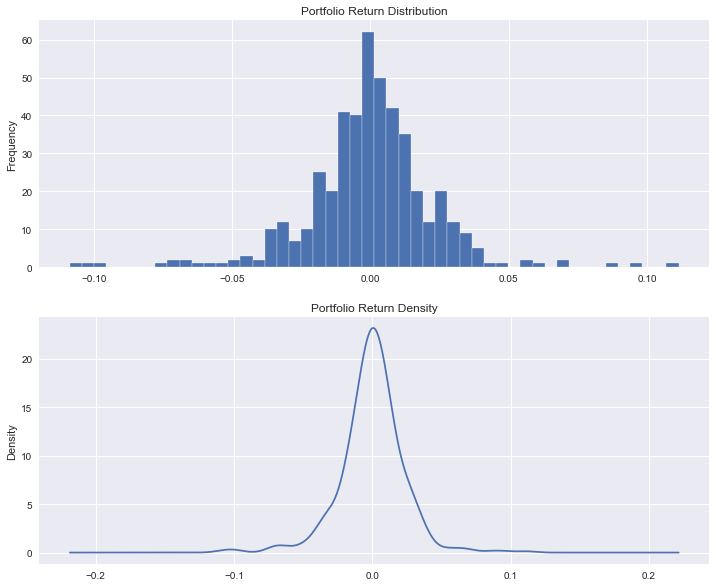

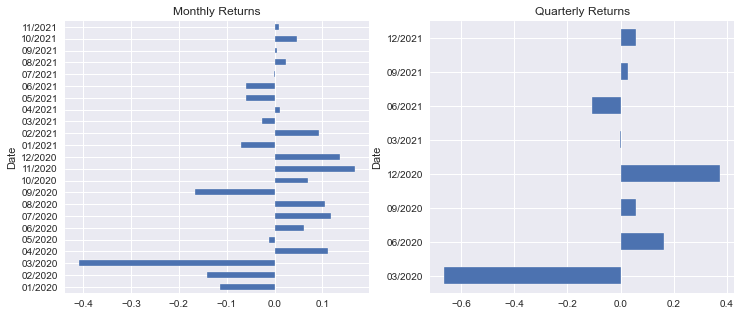

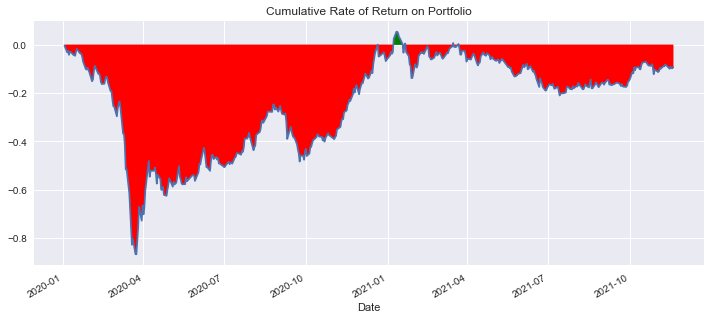

Holding Return                                 -0.025
Cumulative Return                              -0.093
Annualised Volatility                           0.261
Max Drawdown                                   -0.867
Sharpe                                          0.142
Skew                                           -0.276
Kurtosis                                        4.517
Parametric 1-day Value-at-Risk (95% C.L.)      -0.027
Parametric 1-day Value-at-Risk (99% C.L.)      -0.038
Parametric 1-day Value-at-Risk (99.5% C.L.)    -0.042
Historical 1-day Value-at-Risk (95% C.L.)      -0.036
Historical 1-day Value-at-Risk (99% C.L.)      -0.070
Historical 1-day Value-at-Risk (99.5% C.L.)    -0.091
dtype: object

In [223]:
backtest(alpha_pca_cluster, num_port=500000)

## **Market Portfolio**

In [224]:
market_test = df2['Close']['2021']
market_hold_ret = (market_test.iloc[-1] / market_test[0]) -1 
market_log_ret = log_rate(market_test).cumsum().ffill()
market_hold_ret

-0.023329369605487815

In [225]:
# market_log_ret

<AxesSubplot:title={'center':'Market Cumulative Rate of Return 2021'}, xlabel='Date'>

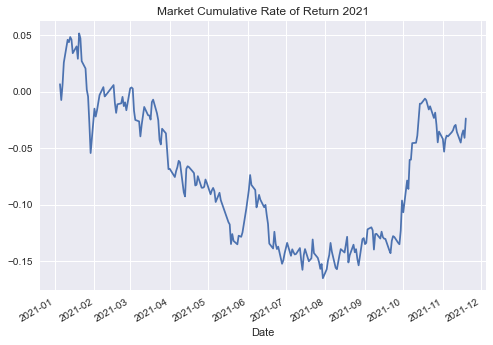

In [226]:
market_log_ret.plot(title='Market Cumulative Rate of Return 2021')

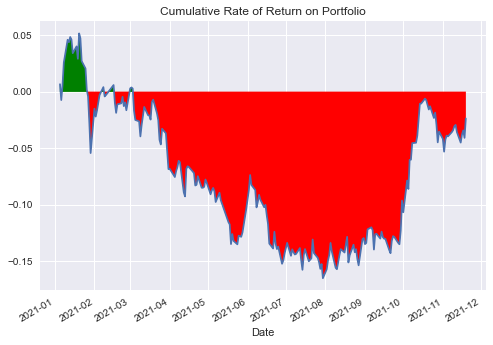

In [227]:
df5 = market_log_ret
df5.plot(title='Cumulative Rate of Return on Portfolio')
plt.fill_between(df5.index, 0, df5.values, where=df5<0, interpolate=True, color='r')
plt.fill_between(df5.index, 0, df5.values, where=df5>0, interpolate=True, color='g')